# Load Data

In [105]:
import pandas as pd 

In [106]:
CSV_PATH     = 'C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/train_labels.csv'
DATASET_PATH = 'C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/JPEGImages'
SAVING_PATH_WITH_HELMET = 'C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop'
SAVING_PATH_WITHOUT_HELMET = 'C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/withouthelmet_crop'

TRIAL_IMG_PATH = DATASET_PATH + '/' + labels['ID'][0]

In [107]:
labels = pd.read_csv(CSV_PATH)
labels.head()

ID                                              Label
0  01319.jpg  101 185 127 225 white 123 178 164 225 white 18...
1  00797.jpg  148 92 175 124 red 196 109 218 138 none 273 11...
2  00892.jpg  355 241 421 323 red 495 245 575 347 red 568 21...
3  00537.jpg  350 22 449 158 red 252 31 339 137 red 42 45 20...
4  01122.jpg                                92 71 194 179 blue

In [108]:
text = labels['Label'][0]
text.split()

['101',
 '185',
 '127',
 '225',
 'white',
 '123',
 '178',
 '164',
 '225',
 'white',
 '181',
 '193',
 '219',
 '240',
 'white',
 '213',
 '185',
 '247',
 '228',
 'white',
 '287',
 '183',
 '323',
 '227',
 'white',
 '410',
 '167',
 '445',
 '210',
 'white']

# Preprocessing

In [109]:
xy_li = {}
xy_li_nonhelmet = {}
temp_xy_li = []
temp_xy_li_nonhelmet = []
temp_xy = []
nonecnt = 0

for index in range(len(labels)):
    text = labels['Label'][index]
    split_text = text.split()
    for x in range(len(split_text)):
        if split_text[x] in ['white', 'black', 'red', 'orange', 'yellow', 'green', 'blue', 'purple', 'violet']:
            if len(temp_xy) != 0 :
                temp_xy_li.append(temp_xy)
            temp_xy = []
            # print('----------------')
        elif split_text[x] == 'none':
            if len(temp_xy) != 0 :
                temp_xy_li_nonhelmet.append(temp_xy)
            temp_xy = []
            # print('none!')
            nonecnt += 1
        else:
            temp_xy.append(int(split_text[x]))
            # print(int(split_text[x]))            
            
    if len(temp_xy_li) != 0 :
        xy_li[labels['ID'][index]] = (temp_xy_li)
    if len(temp_xy_li_nonhelmet) != 0 :
        xy_li_nonhelmet[labels['ID'][index]] = (temp_xy_li_nonhelmet)

    temp_xy_li = []
    temp_xy_li_nonhelmet = []

print(nonecnt, ' : data has append')

4371  : data has append


In [110]:
print('total :',len(xy_li) + len(xy_li_nonhelmet))
# print(xy_li)
# print(xy_li_nonhelmet)

total : 3799


In [111]:
import cv2
import matplotlib.pyplot as plt

In [112]:
print(xy_li[labels['ID'][0]][0][0:2])
print(xy_li[labels['ID'][0]][0][2:])

[101, 185]
[127, 225]


# Define Processing Function

In [168]:
def list_add(tuple1, tuple2):
    return [tuple1[0]+tuple2[0], tuple1[1]+tuple2[1]]

def tuple_add_within_image(tuple1, tuple2, img):
    answer = list_add(tuple1, tuple2)
    shape = img.shape
    print('original image :', shape, '\tresized :', answer, end = '')
    imgsizey = shape[0]
    imgsizex = shape[1]
    sizeoverflag = False
    if answer[0] < 0 :
        answer[0] = 1
        sizeoverflag = True
    elif answer[0] > imgsizex :
        answer[0] = imgsizex
        sizeoverflag = True
    if answer[1] < 0 :
        answer[1] = 1
        sizeoverflag = True
    elif answer[1] > imgsizey :
        answer[1] = imgsizey-1
        sizeoverflag = True        
    if sizeoverflag == True:
        print('\tsize over - resized :', answer, end = '')
    print()
    return tuple(answer)

# Test

original image : (397, 600, 3) 	resized : [51, 135]
original image : (397, 600, 3) 	resized : [177, 275]
original image : (397, 600, 3) 	resized : [73, 128]
original image : (397, 600, 3) 	resized : [214, 275]
original image : (397, 600, 3) 	resized : [131, 143]
original image : (397, 600, 3) 	resized : [269, 290]
original image : (397, 600, 3) 	resized : [163, 135]
original image : (397, 600, 3) 	resized : [297, 278]
original image : (397, 600, 3) 	resized : [237, 133]
original image : (397, 600, 3) 	resized : [373, 277]
original image : (397, 600, 3) 	resized : [360, 117]
original image : (397, 600, 3) 	resized : [495, 260]


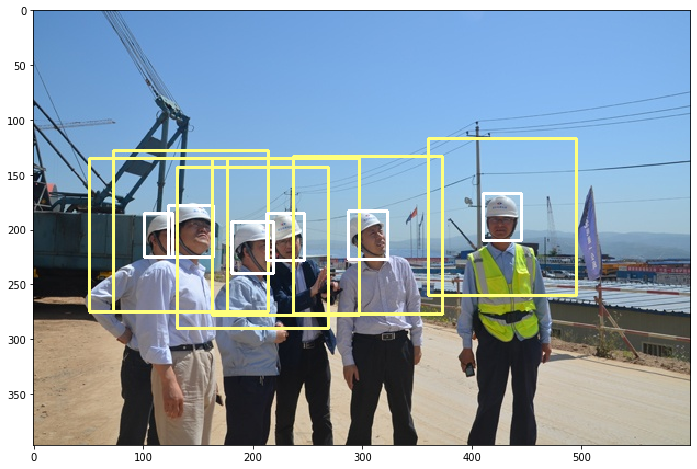

In [143]:
plt.figure(figsize = [13,8])
img = cv2.imread(TRIAL_IMG_PATH, cv2.COLOR_BGR2RGB)
imgname = labels['ID'][0]

for i in range(len(xy_li[imgname])):
    img = cv2.rectangle(img, 
                        tuple(xy_li[imgname][i][0:2]), 
                        tuple(xy_li[imgname][i][2:]), 
                        (255,255,255), 2)
    img = cv2.rectangle(img, 
                        tuple_add_within_image(xy_li[imgname][i][0:2], (-50, -50), img), 
                        tuple_add_within_image(xy_li[imgname][i][2:], (50, 50), img), 
                        (125,255,255), 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [169]:
def draw_helmet_for_debug(index):
    image_path = DATASET_PATH + '/' + labels['ID'][index]
    plt.figure(figsize = [13,8])
    img = cv2.imread(image_path, cv2.COLOR_BGR2RGB)
    imgname = labels['ID'][index]

    for i in range(len(xy_li[imgname])):
        img = cv2.rectangle(img, 
                            tuple(xy_li[imgname][i][0:2]), 
                            tuple(xy_li[imgname][i][2:]), 
                            (255,255,255), 2)
        img = cv2.rectangle(img, 
                            tuple_add_within_image(xy_li[imgname][i][0:2], (-50, -50), img), 
                            tuple_add_within_image(xy_li[imgname][i][2:], (50, 50), img), 
                            (125,255,255), 2)
    
    print('---------------')
    print('without helmet')
    for i in range(len(xy_li_nonhelmet[imgname])):
        img = cv2.rectangle(img, 
                            tuple(xy_li_nonhelmet[imgname][i][0:2]), 
                            tuple(xy_li_nonhelmet[imgname][i][2:]), 
                            (255,255,255), 2)
        img = cv2.rectangle(img, 
                            tuple_add_within_image(xy_li_nonhelmet[imgname][i][0:2], (-50, -50), img), 
                            tuple_add_within_image(xy_li_nonhelmet[imgname][i][2:], (50, 50), img), 
                            (255,125,255), 2)
        
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
# draw_helmet_for_debug(19)

# Run

In [170]:
from PIL import Image
import os

def save_helmetcrop_image(index):
    image_path = DATASET_PATH + '/' + labels['ID'][index]
    img = cv2.imread(image_path, cv2.COLOR_BGR2RGB)
    
    imgname = labels['ID'][index]
    
    if not imgname in list(xy_li.keys()) :
        print(imgname, ': file does not have any element!')
        return
    
    print('reading', imgname, xy_li[imgname])
    
    if not os.path.isfile(image_path) :
        print(imgname, ': file does not exist!')
        return
    
    for i in range(len(xy_li[imgname])):
    
        minx, miny = tuple_add_within_image(xy_li[imgname][i][0:2], (-50, -50), img)
        maxx, maxy = tuple_add_within_image(xy_li[imgname][i][2:], (50, 50), img)
        
        im = img[miny : maxy, minx : maxx, ::-1]
        print(img.shape)
        im = Image.fromarray(im)
        print(SAVING_PATH_WITH_HELMET + '/' + str(index) + '_' + str(i) + '.png')
        im.save(SAVING_PATH_WITH_HELMET + '/' + str(index) + '_' + str(i) +'.png')
        print('-----------')

        
def save_non_helmetcrop_image(index):
    image_path = DATASET_PATH + '/' + labels['ID'][index]
    img = cv2.imread(image_path, cv2.COLOR_BGR2RGB)
    
    imgname = labels['ID'][index]
    
    if not imgname in list(xy_li.keys()) :
        print(imgname, ': file does not have any element!')
        return
    
    print('reading', imgname, xy_li[imgname])
    
    if not os.path.isfile(image_path) :
        print(imgname, ': file does not exist!')
        return
    
    for i in range(len(xy_li[imgname])):
    
        minx, miny = tuple_add_within_image(xy_li_nonhelmet[imgname][i][0:2], (-50, -50), img)
        maxx, maxy = tuple_add_within_image(xy_li_nonhelmet[imgname][i][2:], (50, 50), img)
        
        im = img[miny : maxy, minx : maxx, ::-1]
        print(img.shape)
        im = Image.fromarray(im)
        print(SAVING_PATH_WITHOUT_HELMET + '/' + str(index) + '_' + str(i) + '.png')
        im.save(SAVING_PATH_WITHOUT_HELMET + '/' + str(index) + '_' + str(i) +'.png')
        print('-----------')        

# save_helmetcrop_image(0)

In [166]:
for i in range(len(labels)):
    save_helmetcrop_image(i)

reading 01319.jpg [[101, 185, 127, 225], [123, 178, 164, 225], [181, 193, 219, 240], [213, 185, 247, 228], [287, 183, 323, 227], [410, 167, 445, 210]]
original image : (397, 600, 3) 	resized : [51, 135]
original image : (397, 600, 3) 	resized : [177, 275]
(397, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/0_0.png
-----------
original image : (397, 600, 3) 	resized : [73, 128]
original image : (397, 600, 3) 	resized : [214, 275]
(397, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/0_1.png
-----------
original image : (397, 600, 3) 	resized : [131, 143]
original image : (397, 600, 3) 	resized : [269, 290]
(397, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/0_2.png
-----------
original image : (397, 600, 3) 	resized : [163, 135]
original image : (397, 600, 3) 	resized : [297, 278]
(397, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/0_3.png
-----------
original im

reading 02872.jpg [[154, 129, 318, 314], [633, 60, 793, 253]]
original image : (683, 1023, 3) 	resized : [104, 79]
original image : (683, 1023, 3) 	resized : [368, 364]
(683, 1023, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/8_0.png
-----------
original image : (683, 1023, 3) 	resized : [583, 10]
original image : (683, 1023, 3) 	resized : [843, 303]
(683, 1023, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/8_1.png
-----------
reading 02292.jpg [[468, 439, 489, 462], [538, 421, 572, 459], [770, 417, 796, 452]]
original image : (960, 1280, 3) 	resized : [418, 389]
original image : (960, 1280, 3) 	resized : [539, 512]
(960, 1280, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/9_0.png
-----------
original image : (960, 1280, 3) 	resized : [488, 371]
original image : (960, 1280, 3) 	resized : [622, 509]
(960, 1280, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/9_1.png
-----------
ori

-----------
original image : (1094, 750, 3) 	resized : [212, 696]
original image : (1094, 750, 3) 	resized : [413, 904]
(1094, 750, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/17_3.png
-----------
original image : (1094, 750, 3) 	resized : [447, 678]
original image : (1094, 750, 3) 	resized : [649, 882]
(1094, 750, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/17_4.png
-----------
reading 03175.jpg [[518, 10, 543, 43], [497, 36, 512, 54], [466, 28, 495, 53], [438, 37, 450, 52], [353, 39, 375, 62], [333, 41, 351, 60], [274, 45, 290, 61], [217, 35, 235, 54], [403, 29, 428, 55]]
original image : (355, 620, 3) 	resized : [468, -40]	size over - resized : [468, 1]
original image : (355, 620, 3) 	resized : [593, 93]
(355, 620, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/18_0.png
-----------
original image : (355, 620, 3) 	resized : [447, -14]	size over - resized : [447, 1]
original image : (355, 620, 3) 	resi

reading 02571.jpg [[450, 143, 525, 229], [837, 178, 911, 261]]
original image : (799, 1200, 3) 	resized : [400, 93]
original image : (799, 1200, 3) 	resized : [575, 279]
(799, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/25_0.png
-----------
original image : (799, 1200, 3) 	resized : [787, 128]
original image : (799, 1200, 3) 	resized : [961, 311]
(799, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/25_1.png
-----------
reading 00790.jpg [[33, 57, 64, 96], [126, 68, 152, 103], [58, 65, 97, 114], [86, 68, 112, 108], [150, 58, 182, 102], [190, 63, 217, 99], [253, 56, 284, 96]]
original image : (300, 321, 3) 	resized : [-17, 7]	size over - resized : [1, 7]
original image : (300, 321, 3) 	resized : [114, 146]
(300, 321, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/26_0.png
-----------
original image : (300, 321, 3) 	resized : [76, 18]
original image : (300, 321, 3) 	resized : [202, 153]
(300, 321,

reading 02282.jpg [[262, 35, 399, 196]]
original image : (366, 550, 3) 	resized : [212, -15]	size over - resized : [212, 1]
original image : (366, 550, 3) 	resized : [449, 246]
(366, 550, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/37_0.png
-----------
reading 00739.jpg [[331, 339, 373, 386]]
original image : (720, 1280, 3) 	resized : [281, 289]
original image : (720, 1280, 3) 	resized : [423, 436]
(720, 1280, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/38_0.png
-----------
reading 00776.jpg [[31, 51, 68, 104], [89, 76, 124, 122], [147, 54, 178, 101], [212, 61, 245, 108], [265, 52, 301, 98], [328, 69, 361, 111], [380, 54, 413, 99], [426, 49, 463, 98], [478, 56, 517, 104], [532, 51, 573, 100]]
original image : (337, 600, 3) 	resized : [-19, 1]	size over - resized : [1, 1]
original image : (337, 600, 3) 	resized : [118, 154]
(337, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/39_0.png
-----------
or

reading 00320.jpg [[96, 138, 233, 298], [689, 107, 801, 249], [690, 309, 856, 492], [438, 144, 542, 255], [216, 69, 351, 236]]
original image : (683, 1024, 3) 	resized : [46, 88]
original image : (683, 1024, 3) 	resized : [283, 348]
(683, 1024, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/47_0.png
-----------
original image : (683, 1024, 3) 	resized : [639, 57]
original image : (683, 1024, 3) 	resized : [851, 299]
(683, 1024, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/47_1.png
-----------
original image : (683, 1024, 3) 	resized : [640, 259]
original image : (683, 1024, 3) 	resized : [906, 542]
(683, 1024, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/47_2.png
-----------
original image : (683, 1024, 3) 	resized : [388, 94]
original image : (683, 1024, 3) 	resized : [592, 305]
(683, 1024, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/47_3.png
-----------
original image : (683

original image : (720, 1280, 3) 	resized : [608, 245]
original image : (720, 1280, 3) 	resized : [777, 429]
(720, 1280, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/62_0.png
-----------
original image : (720, 1280, 3) 	resized : [851, 224]
original image : (720, 1280, 3) 	resized : [999, 383]
(720, 1280, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/62_1.png
-----------
original image : (720, 1280, 3) 	resized : [957, 292]
original image : (720, 1280, 3) 	resized : [1119, 480]
(720, 1280, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/62_2.png
-----------
original image : (720, 1280, 3) 	resized : [996, 269]
original image : (720, 1280, 3) 	resized : [1139, 421]
(720, 1280, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/62_3.png
-----------
reading 01032.jpg [[80, 126, 112, 164], [156, 141, 182, 175], [121, 154, 148, 188]]
original image : (333, 500, 3) 	resized : [30, 76]
origina

original image : (600, 900, 3) 	resized : [262, 188]
original image : (600, 900, 3) 	resized : [402, 341]
(600, 900, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/72_8.png
-----------
original image : (600, 900, 3) 	resized : [197, 196]
original image : (600, 900, 3) 	resized : [338, 351]
(600, 900, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/72_9.png
-----------
original image : (600, 900, 3) 	resized : [137, 173]
original image : (600, 900, 3) 	resized : [280, 319]
(600, 900, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/72_10.png
-----------
original image : (600, 900, 3) 	resized : [82, 196]
original image : (600, 900, 3) 	resized : [213, 344]
(600, 900, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/72_11.png
-----------
original image : (600, 900, 3) 	resized : [43, 197]
original image : (600, 900, 3) 	resized : [177, 343]
(600, 900, 3)
C:/Users/user/Desktop/programming_PR

-----------
original image : (357, 571, 3) 	resized : [333, 46]
original image : (357, 571, 3) 	resized : [474, 203]
(357, 571, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/85_1.png
-----------
original image : (357, 571, 3) 	resized : [307, 65]
original image : (357, 571, 3) 	resized : [433, 204]
(357, 571, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/85_2.png
-----------
original image : (357, 571, 3) 	resized : [241, 38]
original image : (357, 571, 3) 	resized : [390, 200]
(357, 571, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/85_3.png
-----------
original image : (357, 571, 3) 	resized : [183, 30]
original image : (357, 571, 3) 	resized : [333, 206]
(357, 571, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/85_4.png
-----------
original image : (357, 571, 3) 	resized : [127, 84]
original image : (357, 571, 3) 	resized : [252, 214]
(357, 571, 3)
C:/Users/user/Desktop/program

-----------
original image : (600, 900, 3) 	resized : [214, 259]
original image : (600, 900, 3) 	resized : [386, 459]
(600, 900, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/98_3.png
-----------
original image : (600, 900, 3) 	resized : [125, 290]
original image : (600, 900, 3) 	resized : [298, 472]
(600, 900, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/98_4.png
-----------
original image : (600, 900, 3) 	resized : [-49, 244]	size over - resized : [1, 244]
original image : (600, 900, 3) 	resized : [135, 448]
(600, 900, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/98_5.png
-----------
original image : (600, 900, 3) 	resized : [551, 190]
original image : (600, 900, 3) 	resized : [681, 326]
(600, 900, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/98_6.png
-----------
original image : (600, 900, 3) 	resized : [451, 191]
original image : (600, 900, 3) 	resized : [628, 376]
(600, 9

-----------
original image : (800, 1200, 3) 	resized : [404, 43]
original image : (800, 1200, 3) 	resized : [585, 245]
(800, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/110_1.png
-----------
reading 02590.jpg [[465, 118, 641, 352], [142, 146, 299, 351]]
original image : (1200, 800, 3) 	resized : [415, 68]
original image : (1200, 800, 3) 	resized : [691, 402]
(1200, 800, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/111_0.png
-----------
original image : (1200, 800, 3) 	resized : [92, 96]
original image : (1200, 800, 3) 	resized : [349, 401]
(1200, 800, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/111_1.png
-----------
reading 01304.jpg [[139, 100, 181, 150], [18, 131, 55, 173], [1, 119, 19, 164], [365, 217, 406, 262], [433, 198, 471, 241], [56, 114, 93, 160], [91, 125, 113, 166], [567, 96, 600, 142], [206, 119, 243, 163]]
original image : (432, 650, 3) 	resized : [89, 50]
original image : (432, 65

reading 03357.jpg [[273, 319, 306, 359], [363, 317, 389, 352], [428, 319, 452, 351], [309, 8, 351, 61], [207, 13, 256, 72], [153, 20, 183, 57], [88, 17, 171, 115], [1, 1, 63, 147], [36, 322, 58, 349], [153, 324, 176, 350], [199, 328, 224, 358]]
original image : (499, 500, 3) 	resized : [223, 269]
original image : (499, 500, 3) 	resized : [356, 409]
(499, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/117_0.png
-----------
original image : (499, 500, 3) 	resized : [313, 267]
original image : (499, 500, 3) 	resized : [439, 402]
(499, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/117_1.png
-----------
original image : (499, 500, 3) 	resized : [378, 269]
original image : (499, 500, 3) 	resized : [502, 401]	size over - resized : [500, 401]
(499, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/117_2.png
-----------
original image : (499, 500, 3) 	resized : [259, -42]	size over - resized : [259, 1]
or

-----------
reading 02532.jpg [[1723, 1281, 1917, 1525], [2148, 1206, 2360, 1453], [629, 1550, 789, 1725]]
original image : (2976, 3968, 3) 	resized : [1673, 1231]
original image : (2976, 3968, 3) 	resized : [1967, 1575]
(2976, 3968, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/125_0.png
-----------
original image : (2976, 3968, 3) 	resized : [2098, 1156]
original image : (2976, 3968, 3) 	resized : [2410, 1503]
(2976, 3968, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/125_1.png
-----------
original image : (2976, 3968, 3) 	resized : [579, 1500]
original image : (2976, 3968, 3) 	resized : [839, 1775]
(2976, 3968, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/125_2.png
-----------
reading 01040.jpg [[315, 156, 350, 189], [444, 147, 476, 183]]
original image : (366, 550, 3) 	resized : [265, 106]
original image : (366, 550, 3) 	resized : [400, 239]
(366, 550, 3)
C:/Users/user/Desktop/programming_PROJECTS/dat

-----------
original image : (307, 448, 3) 	resized : [143, 61]
original image : (307, 448, 3) 	resized : [337, 267]
(307, 448, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/133_1.png
-----------
original image : (307, 448, 3) 	resized : [256, 99]
original image : (307, 448, 3) 	resized : [435, 289]
(307, 448, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/133_2.png
-----------
reading 01873.jpg [[312, 21, 413, 150]]
original image : (400, 600, 3) 	resized : [262, -29]	size over - resized : [262, 1]
original image : (400, 600, 3) 	resized : [463, 200]
(400, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/134_0.png
-----------
reading 1395.jpg [[125, 158, 159, 201], [207, 146, 234, 179], [266, 137, 300, 181], [343, 154, 371, 187], [406, 152, 432, 185], [484, 147, 507, 177], [503, 144, 540, 183], [546, 151, 572, 181], [639, 152, 670, 185], [712, 154, 733, 176]]
1395.jpg : file does not exist!
reading 03388

-----------
original image : (675, 900, 3) 	resized : [517, 176]
original image : (675, 900, 3) 	resized : [640, 301]
(675, 900, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/145_1.png
-----------
original image : (675, 900, 3) 	resized : [444, 147]
original image : (675, 900, 3) 	resized : [558, 264]
(675, 900, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/145_2.png
-----------
original image : (675, 900, 3) 	resized : [461, 165]
original image : (675, 900, 3) 	resized : [572, 282]
(675, 900, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/145_3.png
-----------
original image : (675, 900, 3) 	resized : [631, 164]
original image : (675, 900, 3) 	resized : [754, 292]
(675, 900, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/145_4.png
-----------
original image : (675, 900, 3) 	resized : [25, 182]
original image : (675, 900, 3) 	resized : [140, 298]
(675, 900, 3)
C:/Users/user/Desktop

(433, 650, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/148_23.png
-----------
original image : (433, 650, 3) 	resized : [165, 126]
original image : (433, 650, 3) 	resized : [274, 238]
(433, 650, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/148_24.png
-----------
original image : (433, 650, 3) 	resized : [152, 124]
original image : (433, 650, 3) 	resized : [263, 237]
(433, 650, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/148_25.png
-----------
original image : (433, 650, 3) 	resized : [147, 115]
original image : (433, 650, 3) 	resized : [254, 226]
(433, 650, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/148_26.png
-----------
original image : (433, 650, 3) 	resized : [140, 121]
original image : (433, 650, 3) 	resized : [251, 234]
(433, 650, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/148_27.png
-----------
original image : (433, 650, 3) 	resized :

-----------
original image : (334, 500, 3) 	resized : [108, -28]	size over - resized : [108, 1]
original image : (334, 500, 3) 	resized : [260, 147]
(334, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/153_1.png
-----------
original image : (334, 500, 3) 	resized : [193, -22]	size over - resized : [193, 1]
original image : (334, 500, 3) 	resized : [350, 156]
(334, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/153_2.png
-----------
original image : (334, 500, 3) 	resized : [281, -46]	size over - resized : [281, 1]
original image : (334, 500, 3) 	resized : [447, 140]
(334, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/153_3.png
-----------
original image : (334, 500, 3) 	resized : [-49, 14]	size over - resized : [1, 14]
original image : (334, 500, 3) 	resized : [65, 131]
(334, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/153_4.png
-----------
reading 03193.jpg [

-----------
original image : (387, 580, 3) 	resized : [222, -9]	size over - resized : [222, 1]
original image : (387, 580, 3) 	resized : [352, 158]
(387, 580, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/163_2.png
-----------
original image : (387, 580, 3) 	resized : [281, -18]	size over - resized : [281, 1]
original image : (387, 580, 3) 	resized : [444, 177]
(387, 580, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/163_3.png
-----------
original image : (387, 580, 3) 	resized : [381, -37]	size over - resized : [381, 1]
original image : (387, 580, 3) 	resized : [523, 123]
(387, 580, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/163_4.png
-----------
original image : (387, 580, 3) 	resized : [415, -11]	size over - resized : [415, 1]
original image : (387, 580, 3) 	resized : [541, 133]
(387, 580, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/163_5.png
-----------
original image : 

original image : (667, 1000, 3) 	resized : [587, 58]
original image : (667, 1000, 3) 	resized : [828, 287]
(667, 1000, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/171_1.png
-----------
reading 02030.jpg [[2552, 1040, 2617, 1116], [2507, 1195, 2566, 1256], [2707, 1160, 2771, 1244], [2964, 1068, 3023, 1139], [3252, 1223, 3304, 1296], [3443, 1201, 3502, 1272]]
original image : (2442, 4095, 3) 	resized : [2502, 990]
original image : (2442, 4095, 3) 	resized : [2667, 1166]
(2442, 4095, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/172_0.png
-----------
original image : (2442, 4095, 3) 	resized : [2457, 1145]
original image : (2442, 4095, 3) 	resized : [2616, 1306]
(2442, 4095, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/172_1.png
-----------
original image : (2442, 4095, 3) 	resized : [2657, 1110]
original image : (2442, 4095, 3) 	resized : [2821, 1294]
(2442, 4095, 3)
C:/Users/user/Desktop/programming_PROJ

-----------
original image : (427, 640, 3) 	resized : [434, 184]
original image : (427, 640, 3) 	resized : [560, 319]
(427, 640, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/180_11.png
-----------
reading 00883.jpg [[479, 151, 542, 229], [566, 220, 623, 292]]
original image : (750, 1000, 3) 	resized : [429, 101]
original image : (750, 1000, 3) 	resized : [592, 279]
(750, 1000, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/181_0.png
-----------
original image : (750, 1000, 3) 	resized : [516, 170]
original image : (750, 1000, 3) 	resized : [673, 342]
(750, 1000, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/181_1.png
-----------
reading 00945.jpg [[202, 155, 245, 190], [332, 270, 402, 356], [602, 50, 707, 166]]
original image : (533, 800, 3) 	resized : [152, 105]
original image : (533, 800, 3) 	resized : [295, 240]
(533, 800, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/182_0.pn

-----------
original image : (673, 1088, 3) 	resized : [533, 173]
original image : (673, 1088, 3) 	resized : [663, 308]
(673, 1088, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/189_7.png
-----------
original image : (673, 1088, 3) 	resized : [572, 181]
original image : (673, 1088, 3) 	resized : [709, 334]
(673, 1088, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/189_8.png
-----------
original image : (673, 1088, 3) 	resized : [600, 175]
original image : (673, 1088, 3) 	resized : [731, 321]
(673, 1088, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/189_9.png
-----------
original image : (673, 1088, 3) 	resized : [362, 192]
original image : (673, 1088, 3) 	resized : [485, 324]
(673, 1088, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/189_10.png
-----------
original image : (673, 1088, 3) 	resized : [653, 181]
original image : (673, 1088, 3) 	resized : [775, 310]
(673, 1088, 3)
C:/U

C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/199_0.png
-----------
original image : (355, 533, 3) 	resized : [-2, -4]	size over - resized : [1, 1]
original image : (355, 533, 3) 	resized : [186, 213]
(355, 533, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/199_1.png
-----------
original image : (355, 533, 3) 	resized : [69, 85]
original image : (355, 533, 3) 	resized : [218, 242]
(355, 533, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/199_2.png
-----------
original image : (355, 533, 3) 	resized : [-49, 55]	size over - resized : [1, 55]
original image : (355, 533, 3) 	resized : [79, 241]
(355, 533, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/199_3.png
-----------
original image : (355, 533, 3) 	resized : [443, 55]
original image : (355, 533, 3) 	resized : [583, 225]	size over - resized : [533, 225]
(355, 533, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_cr

-----------
reading 00088.jpg [[110, 109, 156, 171], [203, 126, 240, 173], [254, 121, 290, 169], [331, 112, 369, 163], [459, 116, 503, 171]]
original image : (450, 600, 3) 	resized : [60, 59]
original image : (450, 600, 3) 	resized : [206, 221]
(450, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/212_0.png
-----------
original image : (450, 600, 3) 	resized : [153, 76]
original image : (450, 600, 3) 	resized : [290, 223]
(450, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/212_1.png
-----------
original image : (450, 600, 3) 	resized : [204, 71]
original image : (450, 600, 3) 	resized : [340, 219]
(450, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/212_2.png
-----------
original image : (450, 600, 3) 	resized : [281, 62]
original image : (450, 600, 3) 	resized : [419, 213]
(450, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/212_3.png
-----------
original image :

-----------
reading 01243.jpg [[100, 32, 154, 99], [170, 41, 212, 92], [239, 72, 267, 110], [208, 62, 238, 106], [308, 62, 356, 120], [390, 21, 454, 92]]
original image : (337, 500, 3) 	resized : [50, -18]	size over - resized : [50, 1]
original image : (337, 500, 3) 	resized : [204, 149]
(337, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/223_0.png
-----------
original image : (337, 500, 3) 	resized : [120, -9]	size over - resized : [120, 1]
original image : (337, 500, 3) 	resized : [262, 142]
(337, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/223_1.png
-----------
original image : (337, 500, 3) 	resized : [189, 22]
original image : (337, 500, 3) 	resized : [317, 160]
(337, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/223_2.png
-----------
original image : (337, 500, 3) 	resized : [158, 12]
original image : (337, 500, 3) 	resized : [288, 156]
(337, 500, 3)
C:/Users/user/Desktop/programming

-----------
reading 01674.jpg [[83, 180, 104, 205], [126, 292, 152, 321], [191, 170, 212, 194], [248, 151, 268, 174], [356, 186, 379, 213], [569, 272, 591, 298], [163, 84, 189, 110], [321, 59, 345, 87]]
original image : (417, 626, 3) 	resized : [33, 130]
original image : (417, 626, 3) 	resized : [154, 255]
(417, 626, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/231_0.png
-----------
original image : (417, 626, 3) 	resized : [76, 242]
original image : (417, 626, 3) 	resized : [202, 371]
(417, 626, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/231_1.png
-----------
original image : (417, 626, 3) 	resized : [141, 120]
original image : (417, 626, 3) 	resized : [262, 244]
(417, 626, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/231_2.png
-----------
original image : (417, 626, 3) 	resized : [198, 101]
original image : (417, 626, 3) 	resized : [318, 224]
(417, 626, 3)
C:/Users/user/Desktop/programming_PROJECTS/

-----------
original image : (800, 1200, 3) 	resized : [683, 217]
original image : (800, 1200, 3) 	resized : [817, 384]
(800, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/242_4.png
-----------
original image : (800, 1200, 3) 	resized : [477, 170]
original image : (800, 1200, 3) 	resized : [671, 387]
(800, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/242_5.png
-----------
original image : (800, 1200, 3) 	resized : [293, 147]
original image : (800, 1200, 3) 	resized : [498, 376]
(800, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/242_6.png
-----------
original image : (800, 1200, 3) 	resized : [265, 184]
original image : (800, 1200, 3) 	resized : [401, 367]
(800, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/242_7.png
-----------
original image : (800, 1200, 3) 	resized : [236, 237]
original image : (800, 1200, 3) 	resized : [376, 381]
(800, 1200, 3)
C:/Us

-----------
original image : (400, 600, 3) 	resized : [416, 53]
original image : (400, 600, 3) 	resized : [577, 223]
(400, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/248_1.png
-----------
original image : (400, 600, 3) 	resized : [234, 109]
original image : (400, 600, 3) 	resized : [370, 251]
(400, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/248_2.png
-----------
original image : (400, 600, 3) 	resized : [182, 67]
original image : (400, 600, 3) 	resized : [341, 241]
(400, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/248_3.png
-----------
original image : (400, 600, 3) 	resized : [155, 99]
original image : (400, 600, 3) 	resized : [280, 229]
(400, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/248_4.png
-----------
original image : (400, 600, 3) 	resized : [107, 93]
original image : (400, 600, 3) 	resized : [241, 235]
(400, 600, 3)
C:/Users/user/Desktop/pr

-----------
original image : (956, 1300, 3) 	resized : [131, 6]
original image : (956, 1300, 3) 	resized : [420, 379]
(956, 1300, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/251_1.png
-----------
original image : (956, 1300, 3) 	resized : [870, 6]
original image : (956, 1300, 3) 	resized : [1166, 391]
(956, 1300, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/251_2.png
-----------
reading 02689.jpg [[645, 355, 691, 408]]
original image : (768, 1024, 3) 	resized : [595, 305]
original image : (768, 1024, 3) 	resized : [741, 458]
(768, 1024, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/252_0.png
-----------
reading 02395.jpg [[2, 94, 78, 208], [122, 123, 183, 185], [184, 126, 227, 180], [252, 126, 293, 175], [417, 123, 471, 192], [350, 118, 421, 200]]
original image : (375, 500, 3) 	resized : [-48, 44]	size over - resized : [1, 44]
original image : (375, 500, 3) 	resized : [128, 258]
(375, 500, 3)
C:/Users/

-----------
original image : (700, 1120, 3) 	resized : [630, 584]
original image : (700, 1120, 3) 	resized : [747, 701]	size over - resized : [747, 699]
(700, 1120, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/255_7.png
-----------
original image : (700, 1120, 3) 	resized : [597, 613]
original image : (700, 1120, 3) 	resized : [711, 731]	size over - resized : [711, 699]
(700, 1120, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/255_8.png
-----------
original image : (700, 1120, 3) 	resized : [687, 485]
original image : (700, 1120, 3) 	resized : [800, 600]
(700, 1120, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/255_9.png
-----------
original image : (700, 1120, 3) 	resized : [666, 485]
original image : (700, 1120, 3) 	resized : [779, 601]
(700, 1120, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/255_10.png
-----------
original image : (700, 1120, 3) 	resized : [695, 554]
origina

original image : (700, 1120, 3) 	resized : [753, 525]
(700, 1120, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/255_50.png
-----------
original image : (700, 1120, 3) 	resized : [716, 412]
original image : (700, 1120, 3) 	resized : [828, 524]
(700, 1120, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/255_51.png
-----------
original image : (700, 1120, 3) 	resized : [655, 387]
original image : (700, 1120, 3) 	resized : [767, 500]
(700, 1120, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/255_52.png
-----------
original image : (700, 1120, 3) 	resized : [665, 428]
original image : (700, 1120, 3) 	resized : [778, 540]
(700, 1120, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/255_53.png
-----------
original image : (700, 1120, 3) 	resized : [669, 438]
original image : (700, 1120, 3) 	resized : [781, 552]
(700, 1120, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_cr

original image : (700, 1120, 3) 	resized : [478, 392]
(700, 1120, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/255_108.png
-----------
original image : (700, 1120, 3) 	resized : [377, 283]
original image : (700, 1120, 3) 	resized : [485, 393]
(700, 1120, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/255_109.png
-----------
original image : (700, 1120, 3) 	resized : [382, 289]
original image : (700, 1120, 3) 	resized : [490, 400]
(700, 1120, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/255_110.png
-----------
original image : (700, 1120, 3) 	resized : [358, 302]
original image : (700, 1120, 3) 	resized : [467, 412]
(700, 1120, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/255_111.png
-----------
original image : (700, 1120, 3) 	resized : [397, 300]
original image : (700, 1120, 3) 	resized : [505, 410]
(700, 1120, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helme

C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/255_148.png
-----------
original image : (700, 1120, 3) 	resized : [293, 349]
original image : (700, 1120, 3) 	resized : [402, 460]
(700, 1120, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/255_149.png
-----------
original image : (700, 1120, 3) 	resized : [285, 358]
original image : (700, 1120, 3) 	resized : [396, 469]
(700, 1120, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/255_150.png
-----------
original image : (700, 1120, 3) 	resized : [300, 372]
original image : (700, 1120, 3) 	resized : [410, 483]
(700, 1120, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/255_151.png
-----------
original image : (700, 1120, 3) 	resized : [310, 358]
original image : (700, 1120, 3) 	resized : [420, 469]
(700, 1120, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/255_152.png
-----------
original image : (700, 1120, 3) 	resiz

C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/255_191.png
-----------
original image : (700, 1120, 3) 	resized : [233, 453]
original image : (700, 1120, 3) 	resized : [344, 567]
(700, 1120, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/255_192.png
-----------
original image : (700, 1120, 3) 	resized : [210, 488]
original image : (700, 1120, 3) 	resized : [321, 601]
(700, 1120, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/255_193.png
-----------
original image : (700, 1120, 3) 	resized : [243, 487]
original image : (700, 1120, 3) 	resized : [355, 602]
(700, 1120, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/255_194.png
-----------
original image : (700, 1120, 3) 	resized : [221, 510]
original image : (700, 1120, 3) 	resized : [336, 626]
(700, 1120, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/255_195.png
-----------
original image : (700, 1120, 3) 	resiz

-----------
original image : (1080, 1920, 3) 	resized : [1366, 426]
original image : (1080, 1920, 3) 	resized : [1497, 559]
(1080, 1920, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/256_3.png
-----------
original image : (1080, 1920, 3) 	resized : [1254, 424]
original image : (1080, 1920, 3) 	resized : [1384, 555]
(1080, 1920, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/256_4.png
-----------
reading 03212.jpg [[957, 658, 999, 715], [680, 537, 731, 602], [468, 682, 497, 716], [399, 634, 447, 687]]
original image : (944, 1418, 3) 	resized : [907, 608]
original image : (944, 1418, 3) 	resized : [1049, 765]
(944, 1418, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/257_0.png
-----------
original image : (944, 1418, 3) 	resized : [630, 487]
original image : (944, 1418, 3) 	resized : [781, 652]
(944, 1418, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/257_1.png
-----------
original i

-----------
original image : (433, 650, 3) 	resized : [329, 81]
original image : (433, 650, 3) 	resized : [450, 215]
(433, 650, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/264_11.png
-----------
original image : (433, 650, 3) 	resized : [363, 14]
original image : (433, 650, 3) 	resized : [521, 198]
(433, 650, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/264_12.png
-----------
original image : (433, 650, 3) 	resized : [455, 72]
original image : (433, 650, 3) 	resized : [583, 206]
(433, 650, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/264_13.png
-----------
original image : (433, 650, 3) 	resized : [481, 43]
original image : (433, 650, 3) 	resized : [636, 212]
(433, 650, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/264_14.png
-----------
reading 01898.jpg [[769, 302, 859, 401], [909, 448, 1005, 555], [1183, 314, 1282, 423], [51, 400, 132, 489]]
original image : (1101, 1500, 3

-----------
original image : (600, 900, 3) 	resized : [140, 46]
original image : (600, 900, 3) 	resized : [345, 287]
(600, 900, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/279_2.png
-----------
original image : (600, 900, 3) 	resized : [264, 97]
original image : (600, 900, 3) 	resized : [447, 305]
(600, 900, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/279_3.png
-----------
original image : (600, 900, 3) 	resized : [377, 144]
original image : (600, 900, 3) 	resized : [533, 317]
(600, 900, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/279_4.png
-----------
original image : (600, 900, 3) 	resized : [531, 135]
original image : (600, 900, 3) 	resized : [661, 282]
(600, 900, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/279_5.png
-----------
original image : (600, 900, 3) 	resized : [501, 137]
original image : (600, 900, 3) 	resized : [635, 298]
(600, 900, 3)
C:/Users/user/Desktop/

-----------
original image : (267, 400, 3) 	resized : [139, 88]
original image : (267, 400, 3) 	resized : [250, 201]
(267, 400, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/285_9.png
-----------
original image : (267, 400, 3) 	resized : [149, 81]
original image : (267, 400, 3) 	resized : [259, 194]
(267, 400, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/285_10.png
-----------
original image : (267, 400, 3) 	resized : [156, 92]
original image : (267, 400, 3) 	resized : [266, 204]
(267, 400, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/285_11.png
-----------
original image : (267, 400, 3) 	resized : [194, 84]
original image : (267, 400, 3) 	resized : [304, 197]
(267, 400, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/285_12.png
-----------
original image : (267, 400, 3) 	resized : [203, 85]
original image : (267, 400, 3) 	resized : [311, 196]
(267, 400, 3)
C:/Users/user/Desktop/

reading 01290.jpg [[436, 106, 465, 138], [240, 141, 262, 169]]
original image : (333, 500, 3) 	resized : [386, 56]
original image : (333, 500, 3) 	resized : [515, 188]	size over - resized : [500, 188]
(333, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/300_0.png
-----------
original image : (333, 500, 3) 	resized : [190, 91]
original image : (333, 500, 3) 	resized : [312, 219]
(333, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/300_1.png
-----------
reading 01792.jpg [[290, 67, 346, 139]]
original image : (433, 650, 3) 	resized : [240, 17]
original image : (433, 650, 3) 	resized : [396, 189]
(433, 650, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/301_0.png
-----------
reading 00831.jpg [[350, 124, 393, 177], [324, 136, 340, 158], [284, 143, 295, 158], [249, 146, 261, 160], [394, 144, 414, 170], [300, 146, 310, 159], [232, 138, 243, 154], [214, 140, 228, 158], [200, 142, 213, 158], [181, 142, 192

-----------
original image : (622, 800, 3) 	resized : [466, 240]
original image : (622, 800, 3) 	resized : [599, 383]
(622, 800, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/308_1.png
-----------
original image : (622, 800, 3) 	resized : [504, 253]
original image : (622, 800, 3) 	resized : [640, 397]
(622, 800, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/308_2.png
-----------
original image : (622, 800, 3) 	resized : [596, 247]
original image : (622, 800, 3) 	resized : [728, 386]
(622, 800, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/308_3.png
-----------
original image : (622, 800, 3) 	resized : [619, 222]
original image : (622, 800, 3) 	resized : [761, 379]
(622, 800, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/308_4.png
-----------
original image : (622, 800, 3) 	resized : [653, 244]
original image : (622, 800, 3) 	resized : [791, 390]
(622, 800, 3)
C:/Users/user/Deskto

reading 02624.jpg [[338, 399, 609, 767]]
original image : (1181, 1200, 3) 	resized : [288, 349]
original image : (1181, 1200, 3) 	resized : [659, 817]
(1181, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/320_0.png
-----------
reading 1459.jpg [[280, 148, 306, 176], [313, 136, 343, 172], [492, 132, 533, 178]]
1459.jpg : file does not exist!
reading 1587.jpg [[282, 448, 300, 472], [339, 429, 358, 449], [366, 447, 389, 475], [373, 433, 389, 450], [430, 444, 443, 460]]
1587.jpg : file does not exist!
reading 00472.jpg [[205, 66, 248, 120], [131, 80, 169, 126], [447, 70, 514, 151], [511, 55, 550, 127]]
original image : (355, 550, 3) 	resized : [155, 16]
original image : (355, 550, 3) 	resized : [298, 170]
(355, 550, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/323_0.png
-----------
original image : (355, 550, 3) 	resized : [81, 30]
original image : (355, 550, 3) 	resized : [219, 176]
(355, 550, 3)
C:/Users/user/Desktop/programming

C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/336_0.png
-----------
original image : (718, 1080, 3) 	resized : [279, 284]
original image : (718, 1080, 3) 	resized : [423, 447]
(718, 1080, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/336_1.png
-----------
original image : (718, 1080, 3) 	resized : [311, 293]
original image : (718, 1080, 3) 	resized : [470, 466]
(718, 1080, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/336_2.png
-----------
original image : (718, 1080, 3) 	resized : [412, 257]
original image : (718, 1080, 3) 	resized : [561, 424]
(718, 1080, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/336_3.png
-----------
original image : (718, 1080, 3) 	resized : [510, 295]
original image : (718, 1080, 3) 	resized : [657, 457]
(718, 1080, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/336_4.png
-----------
original image : (718, 1080, 3) 	resized : [563,

-----------
original image : (428, 550, 3) 	resized : [101, 49]
original image : (428, 550, 3) 	resized : [227, 181]
(428, 550, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/344_12.png
-----------
reading 01294.jpg [[50, 118, 104, 174], [127, 154, 167, 193], [181, 140, 217, 181], [247, 156, 279, 191]]
original image : (503, 762, 3) 	resized : [0, 68]
original image : (503, 762, 3) 	resized : [154, 224]
(503, 762, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/345_0.png
-----------
original image : (503, 762, 3) 	resized : [77, 104]
original image : (503, 762, 3) 	resized : [217, 243]
(503, 762, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/345_1.png
-----------
original image : (503, 762, 3) 	resized : [131, 90]
original image : (503, 762, 3) 	resized : [267, 231]
(503, 762, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/345_2.png
-----------
original image : (503, 762, 3) 	resized

-----------
original image : (197, 300, 3) 	resized : [112, -38]	size over - resized : [112, 1]
original image : (197, 300, 3) 	resized : [284, 158]
(197, 300, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/352_1.png
-----------
02325.jpg : file does not have any element!
reading 00741.jpg [[296, 66, 310, 89], [281, 123, 297, 144], [23, 229, 45, 260], [44, 235, 63, 261], [67, 223, 92, 259], [109, 222, 134, 257], [133, 235, 163, 274], [157, 230, 176, 261], [90, 230, 112, 259], [214, 226, 236, 257], [238, 232, 262, 262], [331, 229, 355, 261], [277, 226, 305, 262], [302, 231, 330, 270], [373, 246, 398, 278], [397, 229, 426, 271], [429, 241, 449, 269], [469, 237, 494, 270], [547, 231, 583, 276], [522, 250, 548, 278], [610, 218, 640, 283]]
original image : (427, 640, 3) 	resized : [246, 16]
original image : (427, 640, 3) 	resized : [360, 139]
(427, 640, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/354_0.png
-----------
original image : (

C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/358_13.png
-----------
reading 1446.jpg [[357, 202, 392, 243]]
1446.jpg : file does not exist!
reading 1612.jpg [[283, 449, 309, 479], [273, 697, 304, 736], [516, 627, 542, 660], [497, 676, 525, 699], [613, 651, 642, 686]]
1612.jpg : file does not exist!
reading 00903.jpg [[38, 199, 56, 220], [93, 155, 105, 170], [159, 141, 173, 161], [189, 128, 201, 142], [188, 155, 203, 177]]
original image : (300, 437, 3) 	resized : [-12, 149]	size over - resized : [1, 149]
original image : (300, 437, 3) 	resized : [106, 270]
(300, 437, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/361_0.png
-----------
original image : (300, 437, 3) 	resized : [43, 105]
original image : (300, 437, 3) 	resized : [155, 220]
(300, 437, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/361_1.png
-----------
original image : (300, 437, 3) 	resized : [109, 91]
original image : (300, 437, 3) 	resized : [

-----------
original image : (427, 640, 3) 	resized : [404, 3]
original image : (427, 640, 3) 	resized : [636, 283]
(427, 640, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/371_1.png
-----------
reading 02938.jpg [[631, 214, 653, 240], [421, 175, 443, 197]]
original image : (640, 964, 3) 	resized : [581, 164]
original image : (640, 964, 3) 	resized : [703, 290]
(640, 964, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/372_0.png
-----------
original image : (640, 964, 3) 	resized : [371, 125]
original image : (640, 964, 3) 	resized : [493, 247]
(640, 964, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/372_1.png
-----------
reading 00503.jpg [[859, 287, 998, 435], [621, 263, 735, 401]]
original image : (801, 1200, 3) 	resized : [809, 237]
original image : (801, 1200, 3) 	resized : [1048, 485]
(801, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/373_0.png
-----------
original ima

reading 01765.jpg [[837, 238, 1376, 999]]
original image : (1811, 2717, 3) 	resized : [787, 188]
original image : (1811, 2717, 3) 	resized : [1426, 1049]
(1811, 2717, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/381_0.png
-----------
reading 01214.jpg [[1, 82, 18, 125], [238, 86, 263, 124], [465, 86, 502, 134], [304, 92, 332, 123], [139, 161, 176, 202], [62, 172, 99, 217], [182, 76, 209, 108]]
original image : (399, 600, 3) 	resized : [-49, 32]	size over - resized : [1, 32]
original image : (399, 600, 3) 	resized : [68, 175]
(399, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/382_0.png
-----------
original image : (399, 600, 3) 	resized : [188, 36]
original image : (399, 600, 3) 	resized : [313, 174]
(399, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/382_1.png
-----------
original image : (399, 600, 3) 	resized : [415, 36]
original image : (399, 600, 3) 	resized : [552, 184]
(399, 600, 3)
C:/Us

-----------
reading 02708.jpg [[61, 118, 94, 158], [130, 108, 162, 149], [215, 119, 250, 161], [288, 105, 323, 148], [317, 116, 337, 148], [360, 120, 386, 151], [370, 109, 391, 137]]
original image : (338, 450, 3) 	resized : [11, 68]
original image : (338, 450, 3) 	resized : [144, 208]
(338, 450, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/394_0.png
-----------
original image : (338, 450, 3) 	resized : [80, 58]
original image : (338, 450, 3) 	resized : [212, 199]
(338, 450, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/394_1.png
-----------
original image : (338, 450, 3) 	resized : [165, 69]
original image : (338, 450, 3) 	resized : [300, 211]
(338, 450, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/394_2.png
-----------
original image : (338, 450, 3) 	resized : [238, 55]
original image : (338, 450, 3) 	resized : [373, 198]
(338, 450, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_cr

-----------
original image : (300, 450, 3) 	resized : [214, -19]	size over - resized : [214, 1]
original image : (300, 450, 3) 	resized : [376, 163]
(300, 450, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/408_1.png
-----------
reading 1477.jpg [[109, 144, 129, 166], [135, 152, 152, 169], [185, 147, 204, 170], [236, 146, 258, 173], [291, 139, 308, 159], [317, 134, 336, 163], [350, 142, 374, 169]]
1477.jpg : file does not exist!
reading 00142.jpg [[372, 51, 537, 268], [626, 30, 772, 234]]
original image : (665, 1000, 3) 	resized : [322, 1]
original image : (665, 1000, 3) 	resized : [587, 318]
(665, 1000, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/410_0.png
-----------
original image : (665, 1000, 3) 	resized : [576, -20]	size over - resized : [576, 1]
original image : (665, 1000, 3) 	resized : [822, 284]
(665, 1000, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/410_1.png
-----------
reading 00395.jpg [[3

-----------
reading 03439.jpg [[344, 243, 379, 282], [410, 230, 451, 270]]
original image : (540, 613, 3) 	resized : [294, 193]
original image : (540, 613, 3) 	resized : [429, 332]
(540, 613, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/414_0.png
-----------
original image : (540, 613, 3) 	resized : [360, 180]
original image : (540, 613, 3) 	resized : [501, 320]
(540, 613, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/414_1.png
-----------
reading 02009.jpg [[1750, 652, 1766, 673]]
original image : (1200, 1800, 3) 	resized : [1700, 602]
original image : (1200, 1800, 3) 	resized : [1816, 723]	size over - resized : [1800, 723]
(1200, 1800, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/415_0.png
-----------
1360.jpg : file does not have any element!
reading 00557.jpg [[320, 107, 367, 160], [262, 144, 298, 184], [237, 127, 266, 167], [171, 119, 201, 160]]
original image : (375, 500, 3) 	resized : [270, 57]
or

original image : (254, 450, 3) 	resized : [267, -45]	size over - resized : [267, 1]
original image : (254, 450, 3) 	resized : [384, 73]
(254, 450, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/426_6.png
-----------
original image : (254, 450, 3) 	resized : [321, 86]
original image : (254, 450, 3) 	resized : [435, 207]
(254, 450, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/426_7.png
-----------
original image : (254, 450, 3) 	resized : [249, 155]
original image : (254, 450, 3) 	resized : [367, 275]	size over - resized : [367, 253]
(254, 450, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/426_8.png
-----------
original image : (254, 450, 3) 	resized : [17, -33]	size over - resized : [17, 1]
original image : (254, 450, 3) 	resized : [129, 83]
(254, 450, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/426_9.png
-----------
original image : (254, 450, 3) 	resized : [358, -18]	size over

-----------
original image : (956, 1300, 3) 	resized : [208, -49]	size over - resized : [208, 1]
original image : (956, 1300, 3) 	resized : [473, 272]
(956, 1300, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/437_1.png
-----------
reading 03428.jpg [[543, 62, 605, 122], [463, 39, 515, 97]]
original image : (452, 634, 3) 	resized : [493, 12]
original image : (452, 634, 3) 	resized : [655, 172]	size over - resized : [634, 172]
(452, 634, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/438_0.png
-----------
original image : (452, 634, 3) 	resized : [413, -11]	size over - resized : [413, 1]
original image : (452, 634, 3) 	resized : [565, 147]
(452, 634, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/438_1.png
-----------
reading 02806.jpg [[146, 184, 171, 213], [215, 203, 233, 227], [242, 182, 265, 210], [277, 183, 294, 213], [317, 178, 338, 210], [385, 173, 411, 206], [408, 178, 429, 205], [101, 184, 126, 218], 

C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/450_2.png
-----------
original image : (366, 550, 3) 	resized : [265, -48]	size over - resized : [265, 1]
original image : (366, 550, 3) 	resized : [438, 144]
(366, 550, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/450_3.png
-----------
original image : (366, 550, 3) 	resized : [338, 0]
original image : (366, 550, 3) 	resized : [483, 152]
(366, 550, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/450_4.png
-----------
original image : (366, 550, 3) 	resized : [420, 39]
original image : (366, 550, 3) 	resized : [551, 178]	size over - resized : [550, 178]
(366, 550, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/450_5.png
-----------
reading 03256.jpg [[172, 18, 404, 278]]
original image : (557, 960, 3) 	resized : [122, -32]	size over - resized : [122, 1]
original image : (557, 960, 3) 	resized : [454, 328]
(557, 960, 3)
C:/Users/user/Deskto

C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/468_3.png
-----------
original image : (365, 500, 3) 	resized : [270, 43]
original image : (365, 500, 3) 	resized : [444, 238]
(365, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/468_4.png
-----------
original image : (365, 500, 3) 	resized : [336, 0]
original image : (365, 500, 3) 	resized : [496, 178]
(365, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/468_5.png
-----------
original image : (365, 500, 3) 	resized : [417, -48]	size over - resized : [417, 1]
original image : (365, 500, 3) 	resized : [550, 158]	size over - resized : [500, 158]
(365, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/468_6.png
-----------
reading 03223.jpg [[825, 346, 859, 389], [761, 355, 795, 392], [698, 345, 734, 386], [606, 335, 642, 373], [514, 341, 546, 388], [553, 296, 582, 337], [597, 274, 623, 311], [644, 305, 677, 350], [674, 277, 704, 

-----------
original image : (720, 1080, 3) 	resized : [242, 178]
original image : (720, 1080, 3) 	resized : [368, 311]
(720, 1080, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/469_41.png
-----------
original image : (720, 1080, 3) 	resized : [275, 193]
original image : (720, 1080, 3) 	resized : [406, 332]
(720, 1080, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/469_42.png
-----------
original image : (720, 1080, 3) 	resized : [239, 223]
original image : (720, 1080, 3) 	resized : [369, 368]
(720, 1080, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/469_43.png
-----------
original image : (720, 1080, 3) 	resized : [259, 288]
original image : (720, 1080, 3) 	resized : [392, 426]
(720, 1080, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/469_44.png
-----------
original image : (720, 1080, 3) 	resized : [208, 210]
original image : (720, 1080, 3) 	resized : [334, 344]
(720, 1080, 3)
C

-----------
original image : (525, 700, 3) 	resized : [21, 111]
original image : (525, 700, 3) 	resized : [130, 220]
(525, 700, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/476_13.png
-----------
original image : (525, 700, 3) 	resized : [-4, 112]	size over - resized : [1, 112]
original image : (525, 700, 3) 	resized : [103, 221]
(525, 700, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/476_14.png
-----------
original image : (525, 700, 3) 	resized : [343, 121]
original image : (525, 700, 3) 	resized : [449, 228]
(525, 700, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/476_15.png
-----------
original image : (525, 700, 3) 	resized : [149, 111]
original image : (525, 700, 3) 	resized : [256, 219]
(525, 700, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/476_16.png
-----------
reading 00462.jpg [[21, 62, 58, 112], [75, 79, 111, 129], [104, 72, 151, 132], [285, 83, 322, 136], [152, 6

-----------
original image : (428, 570, 3) 	resized : [193, 142]
original image : (428, 570, 3) 	resized : [311, 261]
(428, 570, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/483_2.png
-----------
original image : (428, 570, 3) 	resized : [144, 152]
original image : (428, 570, 3) 	resized : [268, 278]
(428, 570, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/483_3.png
-----------
original image : (428, 570, 3) 	resized : [54, 138]
original image : (428, 570, 3) 	resized : [177, 263]
(428, 570, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/483_4.png
-----------
reading 02732.jpg [[256, 291, 351, 406], [470, 319, 569, 423]]
original image : (1200, 800, 3) 	resized : [206, 241]
original image : (1200, 800, 3) 	resized : [401, 456]
(1200, 800, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/484_0.png
-----------
original image : (1200, 800, 3) 	resized : [420, 269]
original image : (120

reading 03244.jpg [[366, 358, 413, 404], [686, 293, 733, 344], [98, 252, 134, 298], [929, 249, 958, 288]]
original image : (870, 960, 3) 	resized : [316, 308]
original image : (870, 960, 3) 	resized : [463, 454]
(870, 960, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/495_0.png
-----------
original image : (870, 960, 3) 	resized : [636, 243]
original image : (870, 960, 3) 	resized : [783, 394]
(870, 960, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/495_1.png
-----------
original image : (870, 960, 3) 	resized : [48, 202]
original image : (870, 960, 3) 	resized : [184, 348]
(870, 960, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/495_2.png
-----------
original image : (870, 960, 3) 	resized : [879, 199]
original image : (870, 960, 3) 	resized : [1008, 338]	size over - resized : [960, 338]
(870, 960, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/495_3.png
-----------
reading 03215

-----------
reading 00083.jpg [[422, 128, 475, 211], [281, 147, 338, 226], [830, 132, 878, 190], [1038, 132, 1112, 215], [1121, 138, 1156, 177], [974, 149, 1010, 192], [929, 150, 959, 185]]
original image : (430, 1263, 3) 	resized : [372, 78]
original image : (430, 1263, 3) 	resized : [525, 261]
(430, 1263, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/503_0.png
-----------
original image : (430, 1263, 3) 	resized : [231, 97]
original image : (430, 1263, 3) 	resized : [388, 276]
(430, 1263, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/503_1.png
-----------
original image : (430, 1263, 3) 	resized : [780, 82]
original image : (430, 1263, 3) 	resized : [928, 240]
(430, 1263, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/503_2.png
-----------
original image : (430, 1263, 3) 	resized : [988, 82]
original image : (430, 1263, 3) 	resized : [1162, 265]
(430, 1263, 3)
C:/Users/user/Desktop/programming_PROJECTS/da

-----------
original image : (674, 1024, 3) 	resized : [548, 226]
original image : (674, 1024, 3) 	resized : [698, 379]
(674, 1024, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/510_1.png
-----------
reading 03228.jpg [[704, 652, 731, 687], [486, 653, 511, 683], [564, 664, 592, 697]]
original image : (900, 1200, 3) 	resized : [654, 602]
original image : (900, 1200, 3) 	resized : [781, 737]
(900, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/511_0.png
-----------
original image : (900, 1200, 3) 	resized : [436, 603]
original image : (900, 1200, 3) 	resized : [561, 733]
(900, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/511_1.png
-----------
original image : (900, 1200, 3) 	resized : [514, 614]
original image : (900, 1200, 3) 	resized : [642, 747]
(900, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/511_2.png
-----------
reading 03333.jpg [[437, 398, 468, 432], [5

original image : (533, 800, 3) 	resized : [201, 135]
original image : (533, 800, 3) 	resized : [339, 277]
(533, 800, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/520_2.png
-----------
original image : (533, 800, 3) 	resized : [289, 137]
original image : (533, 800, 3) 	resized : [428, 285]
(533, 800, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/520_3.png
-----------
original image : (533, 800, 3) 	resized : [332, 127]
original image : (533, 800, 3) 	resized : [477, 282]
(533, 800, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/520_4.png
-----------
original image : (533, 800, 3) 	resized : [410, 143]
original image : (533, 800, 3) 	resized : [552, 290]
(533, 800, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/520_5.png
-----------
original image : (533, 800, 3) 	resized : [589, 120]
original image : (533, 800, 3) 	resized : [736, 278]
(533, 800, 3)
C:/Users/user/Desktop/programmin

-----------
original image : (480, 720, 3) 	resized : [545, 119]
original image : (480, 720, 3) 	resized : [672, 255]
(480, 720, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/532_4.png
-----------
original image : (480, 720, 3) 	resized : [561, 96]
original image : (480, 720, 3) 	resized : [702, 244]
(480, 720, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/532_5.png
-----------
original image : (480, 720, 3) 	resized : [610, 121]
original image : (480, 720, 3) 	resized : [742, 261]	size over - resized : [720, 261]
(480, 720, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/532_6.png
-----------
reading 1381.jpg [[88, 267, 99, 290], [137, 266, 154, 290], [151, 273, 165, 293], [183, 273, 198, 293], [205, 260, 226, 286], [232, 261, 252, 289], [252, 258, 270, 282], [324, 265, 341, 289], [391, 255, 409, 278], [425, 259, 447, 288], [450, 258, 467, 279], [489, 266, 510, 293], [516, 261, 531, 281], [531, 261, 549, 28

-----------
original image : (352, 625, 3) 	resized : [412, 133]
original image : (352, 625, 3) 	resized : [536, 260]
(352, 625, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/544_3.png
-----------
original image : (352, 625, 3) 	resized : [433, 155]
original image : (352, 625, 3) 	resized : [556, 278]
(352, 625, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/544_4.png
-----------
02348.jpg : file does not have any element!
reading 1352.jpg [[30, 129, 77, 191], [1, 123, 21, 182], [94, 149, 123, 183], [140, 118, 196, 189], [216, 122, 260, 181], [270, 118, 292, 150], [281, 127, 315, 169], [417, 126, 449, 166]]
1352.jpg : file does not exist!
reading 01305.jpg [[162, 448, 234, 522], [370, 365, 425, 427], [365, 419, 443, 499], [807, 434, 857, 510], [816, 114, 857, 166], [1025, 200, 1074, 260], [1149, 126, 1198, 190], [835, 304, 921, 404]]
original image : (852, 1200, 3) 	resized : [112, 398]
original image : (852, 1200, 3) 	resized : [284

-----------
reading 01064.jpg [[24, 161, 91, 232], [94, 232, 146, 292], [234, 237, 276, 290], [262, 252, 313, 320], [298, 326, 336, 377], [175, 290, 210, 332]]
original image : (650, 434, 3) 	resized : [-26, 111]	size over - resized : [1, 111]
original image : (650, 434, 3) 	resized : [141, 282]
(650, 434, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/562_0.png
-----------
original image : (650, 434, 3) 	resized : [44, 182]
original image : (650, 434, 3) 	resized : [196, 342]
(650, 434, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/562_1.png
-----------
original image : (650, 434, 3) 	resized : [184, 187]
original image : (650, 434, 3) 	resized : [326, 340]
(650, 434, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/562_2.png
-----------
original image : (650, 434, 3) 	resized : [212, 202]
original image : (650, 434, 3) 	resized : [363, 370]
(650, 434, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/hel

-----------
reading 01205.jpg [[75, 195, 101, 225], [204, 193, 231, 223], [294, 168, 322, 201], [385, 203, 410, 233]]
original image : (398, 600, 3) 	resized : [25, 145]
original image : (398, 600, 3) 	resized : [151, 275]
(398, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/574_0.png
-----------
original image : (398, 600, 3) 	resized : [154, 143]
original image : (398, 600, 3) 	resized : [281, 273]
(398, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/574_1.png
-----------
original image : (398, 600, 3) 	resized : [244, 118]
original image : (398, 600, 3) 	resized : [372, 251]
(398, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/574_2.png
-----------
original image : (398, 600, 3) 	resized : [335, 153]
original image : (398, 600, 3) 	resized : [460, 283]
(398, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/574_3.png
-----------
reading 00172.jpg [[171, 89, 260, 1

C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/587_5.png
-----------
original image : (847, 1269, 3) 	resized : [204, 295]
original image : (847, 1269, 3) 	resized : [386, 496]
(847, 1269, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/587_6.png
-----------
reading 00271.jpg [[165, 39, 210, 85]]
original image : (194, 259, 3) 	resized : [115, -11]	size over - resized : [115, 1]
original image : (194, 259, 3) 	resized : [260, 135]	size over - resized : [259, 135]
(194, 259, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/588_0.png
-----------
reading 00475.jpg [[598, 161, 735, 334], [841, 253, 960, 388], [353, 242, 421, 367]]
original image : (800, 1200, 3) 	resized : [548, 111]
original image : (800, 1200, 3) 	resized : [785, 384]
(800, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/589_0.png
-----------
original image : (800, 1200, 3) 	resized : [791, 203]
original image : (800, 1

-----------
original image : (797, 1200, 3) 	resized : [535, 421]
original image : (797, 1200, 3) 	resized : [663, 551]
(797, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/595_9.png
-----------
original image : (797, 1200, 3) 	resized : [589, 405]
original image : (797, 1200, 3) 	resized : [711, 531]
(797, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/595_10.png
-----------
original image : (797, 1200, 3) 	resized : [664, 387]
original image : (797, 1200, 3) 	resized : [786, 513]
(797, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/595_11.png
-----------
original image : (797, 1200, 3) 	resized : [636, 476]
original image : (797, 1200, 3) 	resized : [778, 624]
(797, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/595_12.png
-----------
original image : (797, 1200, 3) 	resized : [712, 469]
original image : (797, 1200, 3) 	resized : [847, 607]
(797, 1200, 3)
C:

-----------
original image : (600, 900, 3) 	resized : [83, 125]
original image : (600, 900, 3) 	resized : [227, 288]
(600, 900, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/603_14.png
-----------
original image : (600, 900, 3) 	resized : [-49, 94]	size over - resized : [1, 94]
original image : (600, 900, 3) 	resized : [120, 328]
(600, 900, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/603_15.png
-----------
original image : (600, 900, 3) 	resized : [13, 125]
original image : (600, 900, 3) 	resized : [161, 295]
(600, 900, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/603_16.png
-----------
original image : (600, 900, 3) 	resized : [234, 130]
original image : (600, 900, 3) 	resized : [354, 257]
(600, 900, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/603_17.png
-----------
reading 02216.jpg [[64, 335, 100, 375], [197, 317, 232, 356], [312, 308, 348, 342], [468, 284, 499, 324], [53

-----------
original image : (2329, 3707, 3) 	resized : [1630, 902]
original image : (2329, 3707, 3) 	resized : [2051, 1398]
(2329, 3707, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/611_6.png
-----------
02438.jpg : file does not have any element!
reading 01072.jpg [[96, 114, 147, 168], [270, 53, 317, 105]]
original image : (333, 500, 3) 	resized : [46, 64]
original image : (333, 500, 3) 	resized : [197, 218]
(333, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/613_0.png
-----------
original image : (333, 500, 3) 	resized : [220, 3]
original image : (333, 500, 3) 	resized : [367, 155]
(333, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/613_1.png
-----------
reading 00051.jpg [[100, 95, 196, 217]]
original image : (374, 500, 3) 	resized : [50, 45]
original image : (374, 500, 3) 	resized : [246, 267]
(374, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/614_0.png
----

-----------
original image : (987, 881, 3) 	resized : [109, 53]
original image : (987, 881, 3) 	resized : [264, 218]
(987, 881, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/630_1.png
-----------
original image : (987, 881, 3) 	resized : [129, 147]
original image : (987, 881, 3) 	resized : [293, 319]
(987, 881, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/630_2.png
-----------
original image : (987, 881, 3) 	resized : [214, 105]
original image : (987, 881, 3) 	resized : [387, 302]
(987, 881, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/630_3.png
-----------
original image : (987, 881, 3) 	resized : [372, 131]
original image : (987, 881, 3) 	resized : [550, 327]
(987, 881, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/630_4.png
-----------
original image : (987, 881, 3) 	resized : [579, 91]
original image : (987, 881, 3) 	resized : [758, 270]
(987, 881, 3)
C:/Users/user/Desktop/

reading 02725.jpg [[447, 92, 465, 117], [497, 77, 535, 126]]
original image : (445, 700, 3) 	resized : [397, 42]
original image : (445, 700, 3) 	resized : [515, 167]
(445, 700, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/636_0.png
-----------
original image : (445, 700, 3) 	resized : [447, 27]
original image : (445, 700, 3) 	resized : [585, 176]
(445, 700, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/636_1.png
-----------
reading 00839.jpg [[66, 173, 100, 209], [158, 256, 196, 299], [228, 126, 242, 141], [281, 137, 298, 157], [267, 199, 300, 236], [275, 160, 303, 187]]
original image : (354, 468, 3) 	resized : [16, 123]
original image : (354, 468, 3) 	resized : [150, 259]
(354, 468, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/637_0.png
-----------
original image : (354, 468, 3) 	resized : [108, 206]
original image : (354, 468, 3) 	resized : [246, 349]
(354, 468, 3)
C:/Users/user/Desktop/programming_PR

-----------
original image : (795, 1200, 3) 	resized : [783, 378]
original image : (795, 1200, 3) 	resized : [979, 565]
(795, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/640_8.png
-----------
original image : (795, 1200, 3) 	resized : [878, 553]
original image : (795, 1200, 3) 	resized : [1048, 743]
(795, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/640_9.png
-----------
reading 00985.jpg [[271, 134, 301, 175], [350, 163, 363, 180], [122, 184, 137, 205]]
original image : (390, 600, 3) 	resized : [221, 84]
original image : (390, 600, 3) 	resized : [351, 225]
(390, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/641_0.png
-----------
original image : (390, 600, 3) 	resized : [300, 113]
original image : (390, 600, 3) 	resized : [413, 230]
(390, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/641_1.png
-----------
original image : (390, 600, 3) 	resized : [72, 13

reading 02956.jpg [[1545, 450, 1570, 485], [1459, 503, 1490, 541], [1408, 436, 1433, 469], [1531, 422, 1559, 457], [1260, 640, 1293, 677]]
original image : (1080, 1920, 3) 	resized : [1495, 400]
original image : (1080, 1920, 3) 	resized : [1620, 535]
(1080, 1920, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/661_0.png
-----------
original image : (1080, 1920, 3) 	resized : [1409, 453]
original image : (1080, 1920, 3) 	resized : [1540, 591]
(1080, 1920, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/661_1.png
-----------
original image : (1080, 1920, 3) 	resized : [1358, 386]
original image : (1080, 1920, 3) 	resized : [1483, 519]
(1080, 1920, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/661_2.png
-----------
original image : (1080, 1920, 3) 	resized : [1481, 372]
original image : (1080, 1920, 3) 	resized : [1609, 507]
(1080, 1920, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/661

reading 02001.jpg [[1468, 50, 1936, 582], [1986, 28, 2532, 623], [1109, 946, 1441, 1355], [1464, 1314, 2123, 2018]]
original image : (4256, 2832, 3) 	resized : [1418, 0]
original image : (4256, 2832, 3) 	resized : [1986, 632]
(4256, 2832, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/672_0.png
-----------
original image : (4256, 2832, 3) 	resized : [1936, -22]	size over - resized : [1936, 1]
original image : (4256, 2832, 3) 	resized : [2582, 673]
(4256, 2832, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/672_1.png
-----------
original image : (4256, 2832, 3) 	resized : [1059, 896]
original image : (4256, 2832, 3) 	resized : [1491, 1405]
(4256, 2832, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/672_2.png
-----------
original image : (4256, 2832, 3) 	resized : [1414, 1264]
original image : (4256, 2832, 3) 	resized : [2173, 2068]
(4256, 2832, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helme

-----------
original image : (1333, 2000, 3) 	resized : [1258, 317]
original image : (1333, 2000, 3) 	resized : [1547, 634]
(1333, 2000, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/684_2.png
-----------
reading 01719.jpg [[71, 42, 279, 306]]
original image : (400, 616, 3) 	resized : [21, -8]	size over - resized : [21, 1]
original image : (400, 616, 3) 	resized : [329, 356]
(400, 616, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/685_0.png
-----------
reading 02019.jpg [[153, 258, 168, 273], [160, 222, 171, 232], [109, 232, 118, 244], [211, 294, 225, 309], [233, 228, 245, 242], [268, 217, 279, 228], [305, 269, 320, 287]]
original image : (468, 700, 3) 	resized : [103, 208]
original image : (468, 700, 3) 	resized : [218, 323]
(468, 700, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/686_0.png
-----------
original image : (468, 700, 3) 	resized : [110, 172]
original image : (468, 700, 3) 	resized : [221, 282

C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/696_0.png
-----------
original image : (750, 500, 3) 	resized : [90, 45]
original image : (750, 500, 3) 	resized : [309, 301]
(750, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/696_1.png
-----------
reading 00952.jpg [[152, 7, 199, 63], [309, 28, 354, 82]]
original image : (300, 428, 3) 	resized : [102, -43]	size over - resized : [102, 1]
original image : (300, 428, 3) 	resized : [249, 113]
(300, 428, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/697_0.png
-----------
original image : (300, 428, 3) 	resized : [259, -22]	size over - resized : [259, 1]
original image : (300, 428, 3) 	resized : [404, 132]
(300, 428, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/697_1.png
-----------
reading 02033.jpg [[902, 20, 924, 47], [854, 1, 872, 14], [840, 5, 862, 25], [851, 14, 870, 39], [846, 42, 863, 65], [831, 44, 849, 70], [818, 69, 837, 95

-----------
original image : (1087, 1634, 3) 	resized : [751, 45]
original image : (1087, 1634, 3) 	resized : [871, 166]
(1087, 1634, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/698_10.png
-----------
original image : (1087, 1634, 3) 	resized : [766, 79]
original image : (1087, 1634, 3) 	resized : [889, 202]
(1087, 1634, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/698_11.png
-----------
original image : (1087, 1634, 3) 	resized : [675, -49]	size over - resized : [675, 1]
original image : (1087, 1634, 3) 	resized : [794, 63]
(1087, 1634, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/698_12.png
-----------
original image : (1087, 1634, 3) 	resized : [697, -43]	size over - resized : [697, 1]
original image : (1087, 1634, 3) 	resized : [815, 82]
(1087, 1634, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/698_13.png
-----------
original image : (1087, 1634, 3) 	resized : [640, -48]

-----------
original image : (1087, 1634, 3) 	resized : [920, 193]
original image : (1087, 1634, 3) 	resized : [1046, 322]
(1087, 1634, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/698_51.png
-----------
original image : (1087, 1634, 3) 	resized : [944, 208]
original image : (1087, 1634, 3) 	resized : [1068, 333]
(1087, 1634, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/698_52.png
-----------
original image : (1087, 1634, 3) 	resized : [955, 241]
original image : (1087, 1634, 3) 	resized : [1081, 367]
(1087, 1634, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/698_53.png
-----------
original image : (1087, 1634, 3) 	resized : [990, 230]
original image : (1087, 1634, 3) 	resized : [1114, 356]
(1087, 1634, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/698_54.png
-----------
original image : (1087, 1634, 3) 	resized : [969, 286]
original image : (1087, 1634, 3) 	resized : [1092, 41

original image : (1087, 1634, 3) 	resized : [113, 281]
original image : (1087, 1634, 3) 	resized : [237, 407]
(1087, 1634, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/698_87.png
-----------
original image : (1087, 1634, 3) 	resized : [140, 223]
original image : (1087, 1634, 3) 	resized : [264, 353]
(1087, 1634, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/698_88.png
-----------
original image : (1087, 1634, 3) 	resized : [235, 218]
original image : (1087, 1634, 3) 	resized : [360, 344]
(1087, 1634, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/698_89.png
-----------
original image : (1087, 1634, 3) 	resized : [85, 194]
original image : (1087, 1634, 3) 	resized : [206, 314]
(1087, 1634, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/698_90.png
-----------
original image : (1087, 1634, 3) 	resized : [80, 209]
original image : (1087, 1634, 3) 	resized : [206, 334]
(1087, 1634, 3)


-----------
original image : (1087, 1634, 3) 	resized : [1023, 559]
original image : (1087, 1634, 3) 	resized : [1143, 682]
(1087, 1634, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/698_132.png
-----------
original image : (1087, 1634, 3) 	resized : [1012, 500]
original image : (1087, 1634, 3) 	resized : [1134, 623]
(1087, 1634, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/698_133.png
-----------
original image : (1087, 1634, 3) 	resized : [1014, 483]
original image : (1087, 1634, 3) 	resized : [1136, 604]
(1087, 1634, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/698_134.png
-----------
original image : (1087, 1634, 3) 	resized : [1041, 451]
original image : (1087, 1634, 3) 	resized : [1161, 572]
(1087, 1634, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/698_135.png
-----------
original image : (1087, 1634, 3) 	resized : [1074, 450]
original image : (1087, 1634, 3) 	resized : 

-----------
original image : (1087, 1634, 3) 	resized : [1260, 629]
original image : (1087, 1634, 3) 	resized : [1383, 753]
(1087, 1634, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/698_174.png
-----------
original image : (1087, 1634, 3) 	resized : [1188, 631]
original image : (1087, 1634, 3) 	resized : [1311, 757]
(1087, 1634, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/698_175.png
-----------
original image : (1087, 1634, 3) 	resized : [1177, 607]
original image : (1087, 1634, 3) 	resized : [1302, 732]
(1087, 1634, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/698_176.png
-----------
original image : (1087, 1634, 3) 	resized : [1213, 618]
original image : (1087, 1634, 3) 	resized : [1337, 743]
(1087, 1634, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/698_177.png
-----------
original image : (1087, 1634, 3) 	resized : [1231, 581]
original image : (1087, 1634, 3) 	resized : 

-----------
original image : (1087, 1634, 3) 	resized : [1423, 469]
original image : (1087, 1634, 3) 	resized : [1543, 594]
(1087, 1634, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/698_216.png
-----------
original image : (1087, 1634, 3) 	resized : [1425, 450]
original image : (1087, 1634, 3) 	resized : [1546, 571]
(1087, 1634, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/698_217.png
-----------
original image : (1087, 1634, 3) 	resized : [1410, 433]
original image : (1087, 1634, 3) 	resized : [1532, 557]
(1087, 1634, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/698_218.png
-----------
original image : (1087, 1634, 3) 	resized : [1407, 424]
original image : (1087, 1634, 3) 	resized : [1527, 544]
(1087, 1634, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/698_219.png
-----------
original image : (1087, 1634, 3) 	resized : [1425, 414]
original image : (1087, 1634, 3) 	resized : 

-----------
original image : (1087, 1634, 3) 	resized : [1063, 211]
original image : (1087, 1634, 3) 	resized : [1185, 336]
(1087, 1634, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/698_261.png
-----------
original image : (1087, 1634, 3) 	resized : [1110, 215]
original image : (1087, 1634, 3) 	resized : [1235, 341]
(1087, 1634, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/698_262.png
-----------
original image : (1087, 1634, 3) 	resized : [1125, 208]
original image : (1087, 1634, 3) 	resized : [1246, 333]
(1087, 1634, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/698_263.png
-----------
original image : (1087, 1634, 3) 	resized : [1078, 167]
original image : (1087, 1634, 3) 	resized : [1202, 293]
(1087, 1634, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/698_264.png
-----------
original image : (1087, 1634, 3) 	resized : [1096, 179]
original image : (1087, 1634, 3) 	resized : 

-----------
original image : (683, 1024, 3) 	resized : [148, -7]	size over - resized : [148, 1]
original image : (683, 1024, 3) 	resized : [342, 198]
(683, 1024, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/713_1.png
-----------
reading 1347.jpg [[62, 121, 108, 185], [229, 136, 265, 183], [204, 161, 226, 187], [178, 163, 190, 181], [105, 150, 124, 188], [132, 151, 176, 206], [306, 150, 334, 190], [333, 143, 373, 199], [397, 148, 432, 194], [430, 145, 467, 190]]
1347.jpg : file does not exist!
reading 02052.jpg [[624, 1013, 754, 1208], [716, 967, 889, 1200], [1275, 675, 1618, 1154], [1842, 746, 2171, 1190], [1740, 1083, 1861, 1216], [2152, 1035, 2296, 1187], [2383, 1044, 2537, 1223], [3033, 1032, 3171, 1211], [3151, 1116, 3244, 1249], [3242, 1101, 3378, 1252]]
original image : (3062, 4793, 3) 	resized : [574, 963]
original image : (3062, 4793, 3) 	resized : [804, 1258]
(3062, 4793, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/715_0

-----------
original image : (366, 554, 3) 	resized : [167, 103]
original image : (366, 554, 3) 	resized : [282, 221]
(366, 554, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/720_8.png
-----------
original image : (366, 554, 3) 	resized : [113, 105]
original image : (366, 554, 3) 	resized : [236, 232]
(366, 554, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/720_9.png
-----------
original image : (366, 554, 3) 	resized : [71, 93]
original image : (366, 554, 3) 	resized : [202, 231]
(366, 554, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/720_10.png
-----------
original image : (366, 554, 3) 	resized : [63, 82]
original image : (366, 554, 3) 	resized : [182, 203]
(366, 554, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/720_11.png
-----------
original image : (366, 554, 3) 	resized : [28, 94]
original image : (366, 554, 3) 	resized : [153, 222]
(366, 554, 3)
C:/Users/user/Desktop/pr

-----------
original image : (333, 500, 3) 	resized : [237, -31]	size over - resized : [237, 1]
original image : (333, 500, 3) 	resized : [434, 191]
(333, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/728_2.png
-----------
reading 00722.jpg [[70, 325, 122, 392]]
original image : (720, 1280, 3) 	resized : [20, 275]
original image : (720, 1280, 3) 	resized : [172, 442]
(720, 1280, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/729_0.png
-----------
reading 02297.jpg [[284, 98, 454, 319]]
original image : (800, 1200, 3) 	resized : [234, 48]
original image : (800, 1200, 3) 	resized : [504, 369]
(800, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/730_0.png
-----------
reading 01881.jpg [[536, 330, 635, 457], [711, 317, 820, 448]]
original image : (800, 1200, 3) 	resized : [486, 280]
original image : (800, 1200, 3) 	resized : [685, 507]
(800, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/

reading 02847.jpg [[1990, 392, 2127, 555], [1813, 424, 1990, 626], [1633, 397, 1733, 542], [1311, 433, 1401, 585], [1210, 408, 1342, 597], [1094, 415, 1202, 556], [786, 414, 915, 562], [679, 492, 808, 662], [522, 478, 572, 610], [329, 465, 458, 637], [1, 446, 97, 589]]
original image : (1704, 2272, 3) 	resized : [1940, 342]
original image : (1704, 2272, 3) 	resized : [2177, 605]
(1704, 2272, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/741_0.png
-----------
original image : (1704, 2272, 3) 	resized : [1763, 374]
original image : (1704, 2272, 3) 	resized : [2040, 676]
(1704, 2272, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/741_1.png
-----------
original image : (1704, 2272, 3) 	resized : [1583, 347]
original image : (1704, 2272, 3) 	resized : [1783, 592]
(1704, 2272, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/741_2.png
-----------
original image : (1704, 2272, 3) 	resized : [1261, 383]
original image

reading 03171.jpg [[752, 238, 788, 284], [368, 298, 405, 346]]
original image : (754, 1200, 3) 	resized : [702, 188]
original image : (754, 1200, 3) 	resized : [838, 334]
(754, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/751_0.png
-----------
original image : (754, 1200, 3) 	resized : [318, 248]
original image : (754, 1200, 3) 	resized : [455, 396]
(754, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/751_1.png
-----------
03134.jpg : file does not have any element!
reading 02470.jpg [[418, 156, 439, 180], [335, 168, 351, 186], [301, 163, 322, 187], [282, 165, 295, 182], [252, 164, 269, 185], [235, 171, 247, 188], [205, 157, 221, 176], [186, 174, 202, 189], [170, 164, 184, 183], [224, 168, 236, 183], [114, 171, 130, 187]]
original image : (400, 600, 3) 	resized : [368, 106]
original image : (400, 600, 3) 	resized : [489, 230]
(400, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/753_0.png
--

02305.jpg : file does not have any element!
reading 02607.jpg [[98, 15, 294, 286]]
original image : (420, 600, 3) 	resized : [48, -35]	size over - resized : [48, 1]
original image : (420, 600, 3) 	resized : [344, 336]
(420, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/760_0.png
-----------
reading 02575.jpg [[461, 178, 488, 208]]
original image : (495, 700, 3) 	resized : [411, 128]
original image : (495, 700, 3) 	resized : [538, 258]
(495, 700, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/761_0.png
-----------
reading 01684.jpg [[76, 116, 107, 145], [183, 134, 208, 153], [230, 129, 257, 152], [494, 115, 523, 150]]
original image : (355, 630, 3) 	resized : [26, 66]
original image : (355, 630, 3) 	resized : [157, 195]
(355, 630, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/762_0.png
-----------
original image : (355, 630, 3) 	resized : [133, 84]
original image : (355, 630, 3) 	resized : [258, 203]
(3

-----------
reading 01261.jpg [[346, 128, 474, 308], [970, 108, 1101, 287], [670, 175, 778, 325]]
original image : (800, 1200, 3) 	resized : [296, 78]
original image : (800, 1200, 3) 	resized : [524, 358]
(800, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/772_0.png
-----------
original image : (800, 1200, 3) 	resized : [920, 58]
original image : (800, 1200, 3) 	resized : [1151, 337]
(800, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/772_1.png
-----------
original image : (800, 1200, 3) 	resized : [620, 125]
original image : (800, 1200, 3) 	resized : [828, 375]
(800, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/772_2.png
-----------
reading 02551.jpg [[203, 404, 295, 518], [1112, 260, 1142, 305]]
original image : (888, 1200, 3) 	resized : [153, 354]
original image : (888, 1200, 3) 	resized : [345, 568]
(888, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/

-----------
reading 1623.jpg [[63, 25, 121, 91], [170, 67, 184, 86], [198, 70, 209, 89], [234, 70, 247, 87], [269, 74, 282, 91], [299, 76, 313, 93], [335, 74, 347, 90]]
1623.jpg : file does not exist!
reading 00606.jpg [[116, 18, 180, 108], [367, 62, 434, 152]]
original image : (345, 485, 3) 	resized : [66, -32]	size over - resized : [66, 1]
original image : (345, 485, 3) 	resized : [230, 158]
(345, 485, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/787_0.png
-----------
original image : (345, 485, 3) 	resized : [317, 12]
original image : (345, 485, 3) 	resized : [484, 202]
(345, 485, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/787_1.png
-----------
reading 03331.jpg [[424, 199, 468, 270]]
original image : (1280, 960, 3) 	resized : [374, 149]
original image : (1280, 960, 3) 	resized : [518, 320]
(1280, 960, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/788_0.png
-----------
reading 01717.jpg [[464, 22, 5

-----------
original image : (1390, 866, 3) 	resized : [667, 877]
original image : (1390, 866, 3) 	resized : [790, 1018]
(1390, 866, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/799_5.png
-----------
original image : (1390, 866, 3) 	resized : [800, 882]
original image : (1390, 866, 3) 	resized : [916, 1026]	size over - resized : [866, 1026]
(1390, 866, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/799_6.png
-----------
reading 00330.jpg [[445, 178, 514, 256], [371, 223, 423, 285], [345, 226, 377, 266], [299, 217, 343, 266], [218, 197, 262, 245], [114, 227, 148, 264], [83, 219, 108, 248], [1, 214, 50, 296]]
original image : (413, 550, 3) 	resized : [395, 128]
original image : (413, 550, 3) 	resized : [564, 306]	size over - resized : [550, 306]
(413, 550, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/800_0.png
-----------
original image : (413, 550, 3) 	resized : [321, 173]
original image : (413, 550, 3) 	r

reading 02065.jpg [[251, 452, 365, 584]]
original image : (794, 1200, 3) 	resized : [201, 402]
original image : (794, 1200, 3) 	resized : [415, 634]
(794, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/817_0.png
-----------
02507.jpg : file does not have any element!
reading 01330.jpg [[144, 113, 165, 142], [188, 110, 212, 140], [272, 129, 292, 152], [321, 114, 343, 142], [243, 111, 263, 140]]
original image : (352, 480, 3) 	resized : [94, 63]
original image : (352, 480, 3) 	resized : [215, 192]
(352, 480, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/819_0.png
-----------
original image : (352, 480, 3) 	resized : [138, 60]
original image : (352, 480, 3) 	resized : [262, 190]
(352, 480, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/819_1.png
-----------
original image : (352, 480, 3) 	resized : [222, 79]
original image : (352, 480, 3) 	resized : [342, 202]
(352, 480, 3)
C:/Users/user/Desktop/programmi

-----------
original image : (427, 640, 3) 	resized : [290, 137]
original image : (427, 640, 3) 	resized : [418, 269]
(427, 640, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/822_20.png
-----------
original image : (427, 640, 3) 	resized : [211, 132]
original image : (427, 640, 3) 	resized : [335, 266]
(427, 640, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/822_21.png
-----------
original image : (427, 640, 3) 	resized : [177, 132]
original image : (427, 640, 3) 	resized : [296, 258]
(427, 640, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/822_22.png
-----------
original image : (427, 640, 3) 	resized : [157, 131]
original image : (427, 640, 3) 	resized : [278, 259]
(427, 640, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/822_23.png
-----------
reading 02313.jpg [[589, 546, 663, 632], [724, 545, 794, 614], [840, 536, 894, 605], [927, 572, 991, 641], [1003, 625, 1058, 681], [1080

C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/827_0.png
-----------
original image : (292, 520, 3) 	resized : [52, 56]
original image : (292, 520, 3) 	resized : [189, 196]
(292, 520, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/827_1.png
-----------
original image : (292, 520, 3) 	resized : [320, 8]
original image : (292, 520, 3) 	resized : [449, 136]
(292, 520, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/827_2.png
-----------
original image : (292, 520, 3) 	resized : [256, 61]
original image : (292, 520, 3) 	resized : [374, 188]
(292, 520, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/827_3.png
-----------
original image : (292, 520, 3) 	resized : [291, -1]	size over - resized : [291, 1]
original image : (292, 520, 3) 	resized : [420, 134]
(292, 520, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/827_4.png
-----------
reading 00525.jpg [[70, 115, 100, 1

reading 01899.jpg [[79, 35, 112, 78], [125, 44, 154, 82], [183, 43, 209, 78]]
original image : (319, 450, 3) 	resized : [29, -15]	size over - resized : [29, 1]
original image : (319, 450, 3) 	resized : [162, 128]
(319, 450, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/837_0.png
-----------
original image : (319, 450, 3) 	resized : [75, -6]	size over - resized : [75, 1]
original image : (319, 450, 3) 	resized : [204, 132]
(319, 450, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/837_1.png
-----------
original image : (319, 450, 3) 	resized : [133, -7]	size over - resized : [133, 1]
original image : (319, 450, 3) 	resized : [259, 128]
(319, 450, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/837_2.png
-----------
reading 00311.jpg [[173, 171, 250, 272], [268, 184, 357, 284], [415, 190, 496, 290], [517, 183, 597, 287], [683, 119, 789, 248], [652, 202, 714, 280], [782, 79, 897, 225], [966, 167, 1031, 247], [101

-----------
original image : (1125, 750, 3) 	resized : [177, 752]
original image : (1125, 750, 3) 	resized : [316, 899]
(1125, 750, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/845_2.png
-----------
original image : (1125, 750, 3) 	resized : [345, 257]
original image : (1125, 750, 3) 	resized : [472, 396]
(1125, 750, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/845_3.png
-----------
reading 02652.jpg [[198, 107, 217, 128], [129, 134, 141, 148]]
original image : (266, 400, 3) 	resized : [148, 57]
original image : (266, 400, 3) 	resized : [267, 178]
(266, 400, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/846_0.png
-----------
original image : (266, 400, 3) 	resized : [79, 84]
original image : (266, 400, 3) 	resized : [191, 198]
(266, 400, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/846_1.png
-----------
reading 1449.jpg [[184, 233, 219, 271], [332, 208, 370, 258], [476, 211, 5

reading 00610.jpg [[212, 137, 287, 224], [306, 185, 337, 227], [359, 156, 452, 271], [454, 139, 593, 289], [595, 192, 640, 293]]
original image : (437, 640, 3) 	resized : [162, 87]
original image : (437, 640, 3) 	resized : [337, 274]
(437, 640, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/863_0.png
-----------
original image : (437, 640, 3) 	resized : [256, 135]
original image : (437, 640, 3) 	resized : [387, 277]
(437, 640, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/863_1.png
-----------
original image : (437, 640, 3) 	resized : [309, 106]
original image : (437, 640, 3) 	resized : [502, 321]
(437, 640, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/863_2.png
-----------
original image : (437, 640, 3) 	resized : [404, 89]
original image : (437, 640, 3) 	resized : [643, 339]	size over - resized : [640, 339]
(437, 640, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/863_3.png
----

-----------
reading 01760.jpg [[172, 34, 266, 140], [324, 89, 394, 171], [609, 129, 633, 185], [788, 48, 870, 138]]
original image : (576, 1024, 3) 	resized : [122, -16]	size over - resized : [122, 1]
original image : (576, 1024, 3) 	resized : [316, 190]
(576, 1024, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/881_0.png
-----------
original image : (576, 1024, 3) 	resized : [274, 39]
original image : (576, 1024, 3) 	resized : [444, 221]
(576, 1024, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/881_1.png
-----------
original image : (576, 1024, 3) 	resized : [559, 79]
original image : (576, 1024, 3) 	resized : [683, 235]
(576, 1024, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/881_2.png
-----------
original image : (576, 1024, 3) 	resized : [738, -2]	size over - resized : [738, 1]
original image : (576, 1024, 3) 	resized : [920, 188]
(576, 1024, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet

-----------
original image : (453, 660, 3) 	resized : [258, -19]	size over - resized : [258, 1]
original image : (453, 660, 3) 	resized : [410, 158]
(453, 660, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/890_1.png
-----------
original image : (453, 660, 3) 	resized : [422, -2]	size over - resized : [422, 1]
original image : (453, 660, 3) 	resized : [585, 170]
(453, 660, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/890_2.png
-----------
original image : (453, 660, 3) 	resized : [430, -40]	size over - resized : [430, 1]
original image : (453, 660, 3) 	resized : [585, 106]
(453, 660, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/890_3.png
-----------
reading 1602.jpg [[80, 98, 117, 145], [183, 111, 217, 158], [254, 134, 265, 149], [475, 139, 500, 178], [395, 111, 435, 171], [310, 141, 324, 159], [270, 139, 284, 156], [233, 137, 245, 152]]
1602.jpg : file does not exist!
reading 00368.jpg [[8, 129, 71, 203]

C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/905_0.png
-----------
original image : (368, 550, 3) 	resized : [277, 113]
original image : (368, 550, 3) 	resized : [388, 228]
(368, 550, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/905_1.png
-----------
reading 01035.jpg [[179, 2, 229, 66], [224, 107, 304, 193], [322, 101, 385, 176]]
original image : (333, 500, 3) 	resized : [129, -48]	size over - resized : [129, 1]
original image : (333, 500, 3) 	resized : [279, 116]
(333, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/906_0.png
-----------
original image : (333, 500, 3) 	resized : [174, 57]
original image : (333, 500, 3) 	resized : [354, 243]
(333, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/906_1.png
-----------
original image : (333, 500, 3) 	resized : [272, 51]
original image : (333, 500, 3) 	resized : [435, 226]
(333, 500, 3)
C:/Users/user/Desktop/programming_PROJECT

-----------
original image : (783, 1044, 3) 	resized : [575, 83]
original image : (783, 1044, 3) 	resized : [741, 264]
(783, 1044, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/914_4.png
-----------
reading 00451.jpg [[25, 158, 169, 316], [194, 112, 283, 219], [373, 162, 524, 331]]
original image : (457, 610, 3) 	resized : [-25, 108]	size over - resized : [1, 108]
original image : (457, 610, 3) 	resized : [219, 366]
(457, 610, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/915_0.png
-----------
original image : (457, 610, 3) 	resized : [144, 62]
original image : (457, 610, 3) 	resized : [333, 269]
(457, 610, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/915_1.png
-----------
original image : (457, 610, 3) 	resized : [323, 112]
original image : (457, 610, 3) 	resized : [574, 381]
(457, 610, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/915_2.png
-----------
reading 00719.jpg [[701,

-----------
reading 01928.jpg [[460, 542, 608, 728], [1009, 448, 1248, 677], [1374, 278, 1780, 708]]
original image : (1330, 2000, 3) 	resized : [410, 492]
original image : (1330, 2000, 3) 	resized : [658, 778]
(1330, 2000, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/922_0.png
-----------
original image : (1330, 2000, 3) 	resized : [959, 398]
original image : (1330, 2000, 3) 	resized : [1298, 727]
(1330, 2000, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/922_1.png
-----------
original image : (1330, 2000, 3) 	resized : [1324, 228]
original image : (1330, 2000, 3) 	resized : [1830, 758]
(1330, 2000, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/922_2.png
-----------
reading 01011.jpg [[1295, 895, 1490, 1146], [1904, 644, 2173, 949], [2097, 124, 2490, 566]]
original image : (1997, 3000, 3) 	resized : [1245, 845]
original image : (1997, 3000, 3) 	resized : [1540, 1196]
(1997, 3000, 3)
C:/Users/user/Desktop

C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/930_15.png
-----------
reading 02503.jpg [[474, 229, 486, 241], [405, 234, 416, 247], [379, 237, 388, 247], [366, 238, 377, 250], [323, 236, 336, 251], [300, 239, 310, 253], [286, 238, 298, 252], [275, 244, 283, 254], [260, 241, 272, 254], [246, 242, 257, 256], [226, 243, 236, 256], [213, 240, 225, 255], [181, 242, 194, 258], [193, 248, 201, 258], [170, 246, 179, 256], [158, 249, 169, 261], [141, 245, 152, 262], [109, 246, 124, 263], [129, 254, 135, 261], [60, 247, 75, 266], [85, 258, 93, 266], [34, 256, 45, 268], [20, 258, 28, 268]]
original image : (333, 500, 3) 	resized : [424, 179]
original image : (333, 500, 3) 	resized : [536, 291]	size over - resized : [500, 291]
(333, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/931_0.png
-----------
original image : (333, 500, 3) 	resized : [355, 184]
original image : (333, 500, 3) 	resized : [466, 297]
(333, 500, 3)
C:/Users/user/Desktop/pro

original image : (1080, 1440, 3) 	resized : [-34, 444]	size over - resized : [1, 444]
original image : (1080, 1440, 3) 	resized : [100, 583]
(1080, 1440, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/938_2.png
-----------
original image : (1080, 1440, 3) 	resized : [43, 406]
original image : (1080, 1440, 3) 	resized : [156, 520]
(1080, 1440, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/938_3.png
-----------
original image : (1080, 1440, 3) 	resized : [98, 389]
original image : (1080, 1440, 3) 	resized : [210, 503]
(1080, 1440, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/938_4.png
-----------
02548.jpg : file does not have any element!
reading 00178.jpg [[636, 181, 679, 239], [603, 178, 636, 232], [552, 186, 582, 225], [491, 182, 524, 225], [457, 187, 483, 221], [401, 177, 430, 220], [429, 186, 445, 216], [443, 193, 459, 215], [383, 196, 403, 224], [337, 175, 368, 218], [289, 172, 328, 223], [246, 182, 2

reading 00275.jpg [[833, 197, 924, 308], [672, 183, 753, 273], [506, 190, 590, 283]]
original image : (853, 1200, 3) 	resized : [783, 147]
original image : (853, 1200, 3) 	resized : [974, 358]
(853, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/942_0.png
-----------
original image : (853, 1200, 3) 	resized : [622, 133]
original image : (853, 1200, 3) 	resized : [803, 323]
(853, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/942_1.png
-----------
original image : (853, 1200, 3) 	resized : [456, 140]
original image : (853, 1200, 3) 	resized : [640, 333]
(853, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/942_2.png
-----------
reading 01257.jpg [[1070, 599, 1254, 827], [1750, 559, 2032, 873], [1990, 495, 2484, 1001], [1244, 617, 1518, 913]]
original image : (1666, 2500, 3) 	resized : [1020, 549]
original image : (1666, 2500, 3) 	resized : [1304, 877]
(1666, 2500, 3)
C:/Users/user/Desktop/prog

-----------
original image : (482, 500, 3) 	resized : [196, 5]
original image : (482, 500, 3) 	resized : [343, 171]
(482, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/953_2.png
-----------
original image : (482, 500, 3) 	resized : [262, 25]
original image : (482, 500, 3) 	resized : [438, 204]
(482, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/953_3.png
-----------
original image : (482, 500, 3) 	resized : [406, 18]
original image : (482, 500, 3) 	resized : [548, 174]	size over - resized : [500, 174]
(482, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/953_4.png
-----------
reading 00206.jpg [[6, 163, 45, 213], [227, 150, 285, 220], [331, 176, 354, 202], [374, 132, 406, 168], [402, 151, 421, 179], [294, 163, 333, 212], [148, 165, 192, 210]]
original image : (412, 550, 3) 	resized : [-44, 113]	size over - resized : [1, 113]
original image : (412, 550, 3) 	resized : [95, 263]
(412, 550, 3)
C:/

-----------
reading 01708.jpg [[128, 25, 213, 112]]
original image : (190, 250, 3) 	resized : [78, -25]	size over - resized : [78, 1]
original image : (190, 250, 3) 	resized : [263, 162]	size over - resized : [250, 162]
(190, 250, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/963_0.png
-----------
reading 01810.jpg [[722, 93, 904, 360]]
original image : (1072, 1600, 3) 	resized : [672, 43]
original image : (1072, 1600, 3) 	resized : [954, 410]
(1072, 1600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/964_0.png
-----------
03079.jpg : file does not have any element!
reading 02594.jpg [[113, 68, 178, 157], [266, 75, 329, 157], [349, 34, 423, 124], [514, 72, 585, 155]]
original image : (644, 700, 3) 	resized : [63, 18]
original image : (644, 700, 3) 	resized : [228, 207]
(644, 700, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/966_0.png
-----------
original image : (644, 700, 3) 	resized : [216, 25]
original

-----------
original image : (765, 1024, 3) 	resized : [546, 323]
original image : (765, 1024, 3) 	resized : [664, 444]
(765, 1024, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/975_9.png
-----------
reading 02403.jpg [[133, 189, 174, 239], [176, 185, 212, 228], [205, 213, 227, 236], [315, 201, 345, 240], [371, 201, 392, 234]]
original image : (480, 720, 3) 	resized : [83, 139]
original image : (480, 720, 3) 	resized : [224, 289]
(480, 720, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/976_0.png
-----------
original image : (480, 720, 3) 	resized : [126, 135]
original image : (480, 720, 3) 	resized : [262, 278]
(480, 720, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/976_1.png
-----------
original image : (480, 720, 3) 	resized : [155, 163]
original image : (480, 720, 3) 	resized : [277, 286]
(480, 720, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/976_2.png
-----------
original 

-----------
original image : (547, 730, 3) 	resized : [427, 189]
original image : (547, 730, 3) 	resized : [558, 324]
(547, 730, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/986_5.png
-----------
original image : (547, 730, 3) 	resized : [148, 197]
original image : (547, 730, 3) 	resized : [273, 323]
(547, 730, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/986_6.png
-----------
original image : (547, 730, 3) 	resized : [175, 204]
original image : (547, 730, 3) 	resized : [292, 324]
(547, 730, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/986_7.png
-----------
original image : (547, 730, 3) 	resized : [102, 145]
original image : (547, 730, 3) 	resized : [214, 262]
(547, 730, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/986_8.png
-----------
reading 02852.jpg [[544, 236, 573, 268]]
original image : (500, 666, 3) 	resized : [494, 186]
original image : (500, 666, 3) 	resized : [623

-----------
original image : (880, 1256, 3) 	resized : [376, 535]
original image : (880, 1256, 3) 	resized : [555, 734]
(880, 1256, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/998_1.png
-----------
original image : (880, 1256, 3) 	resized : [280, 459]
original image : (880, 1256, 3) 	resized : [458, 655]
(880, 1256, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/998_2.png
-----------
original image : (880, 1256, 3) 	resized : [799, 420]
original image : (880, 1256, 3) 	resized : [925, 549]
(880, 1256, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/998_3.png
-----------
original image : (880, 1256, 3) 	resized : [547, 433]
original image : (880, 1256, 3) 	resized : [662, 548]
(880, 1256, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/998_4.png
-----------
original image : (880, 1256, 3) 	resized : [658, 428]
original image : (880, 1256, 3) 	resized : [770, 544]
(880, 1256, 3)
C:/Us

reading 02010.jpg [[79, 43, 276, 280], [298, 180, 390, 309], [569, 85, 690, 246], [867, 182, 966, 322], [949, 101, 1130, 323]]
original image : (803, 1200, 3) 	resized : [29, -7]	size over - resized : [29, 1]
original image : (803, 1200, 3) 	resized : [326, 330]
(803, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1014_0.png
-----------
original image : (803, 1200, 3) 	resized : [248, 130]
original image : (803, 1200, 3) 	resized : [440, 359]
(803, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1014_1.png
-----------
original image : (803, 1200, 3) 	resized : [519, 35]
original image : (803, 1200, 3) 	resized : [740, 296]
(803, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1014_2.png
-----------
original image : (803, 1200, 3) 	resized : [817, 132]
original image : (803, 1200, 3) 	resized : [1016, 372]
(803, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1014

-----------
original image : (1278, 1280, 3) 	resized : [378, 855]
original image : (1278, 1280, 3) 	resized : [562, 1061]
(1278, 1280, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1023_16.png
-----------
original image : (1278, 1280, 3) 	resized : [137, 922]
original image : (1278, 1280, 3) 	resized : [295, 1071]
(1278, 1280, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1023_17.png
-----------
original image : (1278, 1280, 3) 	resized : [829, 890]
original image : (1278, 1280, 3) 	resized : [954, 1017]
(1278, 1280, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1023_18.png
-----------
original image : (1278, 1280, 3) 	resized : [837, 902]
original image : (1278, 1280, 3) 	resized : [971, 1034]
(1278, 1280, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1023_19.png
-----------
original image : (1278, 1280, 3) 	resized : [853, 933]
original image : (1278, 1280, 3) 	resized : [991,

-----------
original image : (525, 800, 3) 	resized : [584, 241]
original image : (525, 800, 3) 	resized : [723, 394]
(525, 800, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1029_10.png
-----------
original image : (525, 800, 3) 	resized : [672, 230]
original image : (525, 800, 3) 	resized : [818, 385]	size over - resized : [800, 385]
(525, 800, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1029_11.png
-----------
reading 02260.jpg [[26, 119, 47, 142], [172, 133, 192, 156], [202, 27, 225, 53], [298, 121, 319, 142], [357, 49, 384, 76]]
original image : (332, 497, 3) 	resized : [-24, 69]	size over - resized : [1, 69]
original image : (332, 497, 3) 	resized : [97, 192]
(332, 497, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1030_0.png
-----------
original image : (332, 497, 3) 	resized : [122, 83]
original image : (332, 497, 3) 	resized : [242, 206]
(332, 497, 3)
C:/Users/user/Desktop/programming_PROJECTS/d

-----------
original image : (1735, 2470, 3) 	resized : [693, 125]
original image : (1735, 2470, 3) 	resized : [835, 282]
(1735, 2470, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1037_8.png
-----------
original image : (1735, 2470, 3) 	resized : [1999, -41]	size over - resized : [1999, 1]
original image : (1735, 2470, 3) 	resized : [2147, 105]
(1735, 2470, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1037_9.png
-----------
reading 01679.jpg [[538, 131, 674, 297], [654, 110, 812, 280]]
original image : (683, 1024, 3) 	resized : [488, 81]
original image : (683, 1024, 3) 	resized : [724, 347]
(683, 1024, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1038_0.png
-----------
original image : (683, 1024, 3) 	resized : [604, 60]
original image : (683, 1024, 3) 	resized : [862, 330]
(683, 1024, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1038_1.png
-----------
reading 02169.jpg [[3, 

C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1045_6.png
-----------
original image : (688, 1050, 3) 	resized : [70, 105]
original image : (688, 1050, 3) 	resized : [192, 229]
(688, 1050, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1045_7.png
-----------
original image : (688, 1050, 3) 	resized : [174, 74]
original image : (688, 1050, 3) 	resized : [301, 206]
(688, 1050, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1045_8.png
-----------
original image : (688, 1050, 3) 	resized : [136, 97]
original image : (688, 1050, 3) 	resized : [246, 208]
(688, 1050, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1045_9.png
-----------
reading 01949.jpg [[1912, 242, 2172, 616], [2648, 729, 2822, 986]]
original image : (2912, 4368, 3) 	resized : [1862, 192]
original image : (2912, 4368, 3) 	resized : [2222, 666]
(2912, 4368, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_cr

-----------
reading 01779.jpg [[121, 152, 170, 198]]
original image : (301, 450, 3) 	resized : [71, 102]
original image : (301, 450, 3) 	resized : [220, 248]
(301, 450, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1059_0.png
-----------
reading 1357.jpg [[251, 162, 385, 303], [562, 72, 651, 165], [778, 28, 842, 106], [868, 25, 921, 81], [952, 13, 993, 62]]
1357.jpg : file does not exist!
reading 03257.jpg [[682, 168, 705, 193], [714, 192, 728, 209], [725, 198, 741, 216], [774, 146, 800, 177], [815, 162, 832, 185], [827, 159, 853, 187], [751, 175, 767, 196], [2, 223, 18, 241]]
original image : (795, 1192, 3) 	resized : [632, 118]
original image : (795, 1192, 3) 	resized : [755, 243]
(795, 1192, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1061_0.png
-----------
original image : (795, 1192, 3) 	resized : [664, 142]
original image : (795, 1192, 3) 	resized : [778, 259]
(795, 1192, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset

C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1067_1.png
-----------
original image : (670, 1565, 3) 	resized : [740, 136]
original image : (670, 1565, 3) 	resized : [897, 308]
(670, 1565, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1067_2.png
-----------
original image : (670, 1565, 3) 	resized : [610, 180]
original image : (670, 1565, 3) 	resized : [784, 351]
(670, 1565, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1067_3.png
-----------
reading 00112.jpg [[545, 21, 850, 446], [192, 74, 355, 262]]
original image : (800, 1200, 3) 	resized : [495, -29]	size over - resized : [495, 1]
original image : (800, 1200, 3) 	resized : [900, 496]
(800, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1068_0.png
-----------
original image : (800, 1200, 3) 	resized : [142, 24]
original image : (800, 1200, 3) 	resized : [405, 312]
(800, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/da

reading 02025.jpg [[140, 129, 193, 191], [246, 154, 278, 196]]
original image : (400, 700, 3) 	resized : [90, 79]
original image : (400, 700, 3) 	resized : [243, 241]
(400, 700, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1080_0.png
-----------
original image : (400, 700, 3) 	resized : [196, 104]
original image : (400, 700, 3) 	resized : [328, 246]
(400, 700, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1080_1.png
-----------
reading 01217.jpg [[59, 44, 150, 147], [105, 1, 136, 26], [218, 53, 278, 136], [389, 127, 431, 177], [435, 144, 474, 192]]
original image : (336, 504, 3) 	resized : [9, -6]	size over - resized : [9, 1]
original image : (336, 504, 3) 	resized : [200, 197]
(336, 504, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1081_0.png
-----------
original image : (336, 504, 3) 	resized : [55, -49]	size over - resized : [55, 1]
original image : (336, 504, 3) 	resized : [186, 76]
(336, 504, 3)
C:/

-----------
original image : (600, 899, 3) 	resized : [-22, 93]	size over - resized : [1, 93]
original image : (600, 899, 3) 	resized : [141, 262]
(600, 899, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1086_3.png
-----------
reading 02829.jpg [[821, 307, 869, 368]]
original image : (800, 1200, 3) 	resized : [771, 257]
original image : (800, 1200, 3) 	resized : [919, 418]
(800, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1087_0.png
-----------
reading 02877.jpg [[234, 1, 713, 572]]
original image : (800, 1200, 3) 	resized : [184, -49]	size over - resized : [184, 1]
original image : (800, 1200, 3) 	resized : [763, 622]
(800, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1088_0.png
-----------
00755.jpg : file does not have any element!
reading 02386.jpg [[141, 89, 173, 131], [237, 77, 262, 104], [338, 70, 364, 101], [398, 71, 418, 93]]
original image : (300, 450, 3) 	resized : [91, 39]
origin

-----------
original image : (533, 800, 3) 	resized : [446, 125]
original image : (533, 800, 3) 	resized : [616, 334]
(533, 800, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1101_1.png
-----------
original image : (533, 800, 3) 	resized : [409, 56]
original image : (533, 800, 3) 	resized : [586, 242]
(533, 800, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1101_2.png
-----------
reading 00006.jpg [[181, 163, 206, 190], [268, 175, 287, 200]]
original image : (249, 400, 3) 	resized : [131, 113]
original image : (249, 400, 3) 	resized : [256, 240]
(249, 400, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1102_0.png
-----------
original image : (249, 400, 3) 	resized : [218, 125]
original image : (249, 400, 3) 	resized : [337, 250]	size over - resized : [337, 248]
(249, 400, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1102_1.png
-----------
reading 02380.jpg [[170, 29, 225, 94], [5

reading 02542.jpg [[295, 203, 418, 335]]
original image : (804, 1200, 3) 	resized : [245, 153]
original image : (804, 1200, 3) 	resized : [468, 385]
(804, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1112_0.png
-----------
reading 01666.jpg [[206, 93, 228, 117]]
original image : (301, 450, 3) 	resized : [156, 43]
original image : (301, 450, 3) 	resized : [278, 167]
(301, 450, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1113_0.png
-----------
reading 02349.jpg [[35, 213, 63, 252], [55, 212, 111, 279], [130, 213, 168, 259], [202, 232, 226, 259], [230, 185, 291, 261], [283, 233, 302, 267], [310, 245, 348, 289], [341, 227, 392, 298], [382, 251, 413, 296], [438, 239, 482, 301], [476, 257, 516, 311], [777, 290, 811, 334], [641, 272, 674, 316], [667, 260, 714, 319], [700, 253, 732, 306], [743, 279, 771, 316], [838, 279, 887, 335]]
original image : (768, 1024, 3) 	resized : [-15, 163]	size over - resized : [1, 163]
original image :

C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1117_13.png
-----------
original image : (903, 1600, 3) 	resized : [822, 71]
original image : (903, 1600, 3) 	resized : [1027, 304]
(903, 1600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1117_14.png
-----------
original image : (903, 1600, 3) 	resized : [1383, 86]
original image : (903, 1600, 3) 	resized : [1571, 335]
(903, 1600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1117_15.png
-----------
original image : (903, 1600, 3) 	resized : [1077, 83]
original image : (903, 1600, 3) 	resized : [1335, 383]
(903, 1600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1117_16.png
-----------
original image : (903, 1600, 3) 	resized : [62, -47]	size over - resized : [62, 1]
original image : (903, 1600, 3) 	resized : [251, 157]
(903, 1600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1117_17.png
-----------
reading

C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1127_2.png
-----------
original image : (367, 550, 3) 	resized : [4, 5]
original image : (367, 550, 3) 	resized : [145, 156]
(367, 550, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1127_3.png
-----------
original image : (367, 550, 3) 	resized : [84, 15]
original image : (367, 550, 3) 	resized : [220, 157]
(367, 550, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1127_4.png
-----------
original image : (367, 550, 3) 	resized : [181, 6]
original image : (367, 550, 3) 	resized : [318, 148]
(367, 550, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1127_5.png
-----------
original image : (367, 550, 3) 	resized : [305, 7]
original image : (367, 550, 3) 	resized : [447, 157]
(367, 550, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1127_6.png
-----------
original image : (367, 550, 3) 	resized : [367, 8]
original image

reading 01786.jpg [[715, 236, 1065, 648], [1019, 414, 1245, 734], [762, 2, 1031, 270]]
original image : (1700, 1600, 3) 	resized : [665, 186]
original image : (1700, 1600, 3) 	resized : [1115, 698]
(1700, 1600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1135_0.png
-----------
original image : (1700, 1600, 3) 	resized : [969, 364]
original image : (1700, 1600, 3) 	resized : [1295, 784]
(1700, 1600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1135_1.png
-----------
original image : (1700, 1600, 3) 	resized : [712, -48]	size over - resized : [712, 1]
original image : (1700, 1600, 3) 	resized : [1081, 320]
(1700, 1600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1135_2.png
-----------
00813.jpg : file does not have any element!
reading 01134.jpg [[177, 99, 216, 148], [212, 103, 257, 155], [245, 96, 278, 137], [278, 105, 316, 153], [337, 83, 375, 143]]
original image : (400, 600, 3) 	resized : [127, 49]


-----------
original image : (800, 1200, 3) 	resized : [401, 85]
original image : (800, 1200, 3) 	resized : [612, 348]
(800, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1149_1.png
-----------
reading 00404.jpg [[281, 128, 319, 170], [328, 88, 368, 133], [375, 83, 412, 123], [499, 192, 541, 234], [556, 181, 597, 226]]
original image : (400, 600, 3) 	resized : [231, 78]
original image : (400, 600, 3) 	resized : [369, 220]
(400, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1150_0.png
-----------
original image : (400, 600, 3) 	resized : [278, 38]
original image : (400, 600, 3) 	resized : [418, 183]
(400, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1150_1.png
-----------
original image : (400, 600, 3) 	resized : [325, 33]
original image : (400, 600, 3) 	resized : [462, 173]
(400, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1150_2.png
-----------
original i

-----------
original image : (271, 400, 3) 	resized : [234, 115]
original image : (271, 400, 3) 	resized : [396, 285]	size over - resized : [396, 270]
(271, 400, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1161_1.png
-----------
original image : (271, 400, 3) 	resized : [312, 13]
original image : (271, 400, 3) 	resized : [443, 161]	size over - resized : [400, 161]
(271, 400, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1161_2.png
-----------
original image : (271, 400, 3) 	resized : [123, 37]
original image : (271, 400, 3) 	resized : [254, 186]
(271, 400, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1161_3.png
-----------
original image : (271, 400, 3) 	resized : [50, -11]	size over - resized : [50, 1]
original image : (271, 400, 3) 	resized : [204, 168]
(271, 400, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1161_4.png
-----------
original image : (271, 400, 3) 	resized : [

-----------
original image : (2400, 3000, 3) 	resized : [588, 1324]
original image : (2400, 3000, 3) 	resized : [740, 1491]
(2400, 3000, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1163_26.png
-----------
original image : (2400, 3000, 3) 	resized : [656, 1298]
original image : (2400, 3000, 3) 	resized : [811, 1468]
(2400, 3000, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1163_27.png
-----------
original image : (2400, 3000, 3) 	resized : [763, 1334]
original image : (2400, 3000, 3) 	resized : [909, 1510]
(2400, 3000, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1163_28.png
-----------
original image : (2400, 3000, 3) 	resized : [765, 1441]
original image : (2400, 3000, 3) 	resized : [934, 1622]
(2400, 3000, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1163_29.png
-----------
original image : (2400, 3000, 3) 	resized : [1059, 1337]
original image : (2400, 3000, 3) 	resized :

-----------
original image : (531, 800, 3) 	resized : [352, 60]
original image : (531, 800, 3) 	resized : [486, 213]
(531, 800, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1170_7.png
-----------
original image : (531, 800, 3) 	resized : [474, 74]
original image : (531, 800, 3) 	resized : [593, 205]
(531, 800, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1170_8.png
-----------
original image : (531, 800, 3) 	resized : [488, 65]
original image : (531, 800, 3) 	resized : [621, 213]
(531, 800, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1170_9.png
-----------
original image : (531, 800, 3) 	resized : [551, 69]
original image : (531, 800, 3) 	resized : [691, 218]
(531, 800, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1170_10.png
-----------
original image : (531, 800, 3) 	resized : [594, 44]
original image : (531, 800, 3) 	resized : [744, 205]
(531, 800, 3)
C:/Users/user/Deskto

-----------
original image : (283, 425, 3) 	resized : [64, 40]
original image : (283, 425, 3) 	resized : [210, 198]
(283, 425, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1175_4.png
-----------
reading 00796.jpg [[93, 104, 148, 170], [234, 145, 275, 194], [326, 144, 367, 194], [365, 151, 388, 182], [410, 154, 427, 177], [527, 144, 555, 181]]
original image : (400, 600, 3) 	resized : [43, 54]
original image : (400, 600, 3) 	resized : [198, 220]
(400, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1176_0.png
-----------
original image : (400, 600, 3) 	resized : [184, 95]
original image : (400, 600, 3) 	resized : [325, 244]
(400, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1176_1.png
-----------
original image : (400, 600, 3) 	resized : [276, 94]
original image : (400, 600, 3) 	resized : [417, 244]
(400, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1176_2.png
----

-----------
original image : (336, 500, 3) 	resized : [370, 111]
original image : (336, 500, 3) 	resized : [478, 219]
(336, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1189_2.png
-----------
original image : (336, 500, 3) 	resized : [65, 125]
original image : (336, 500, 3) 	resized : [176, 236]
(336, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1189_3.png
-----------
original image : (336, 500, 3) 	resized : [33, 128]
original image : (336, 500, 3) 	resized : [144, 240]
(336, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1189_4.png
-----------
reading 00529.jpg [[321, 1, 544, 267], [619, 52, 834, 326]]
original image : (682, 1024, 3) 	resized : [271, -49]	size over - resized : [271, 1]
original image : (682, 1024, 3) 	resized : [594, 317]
(682, 1024, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1190_0.png
-----------
original image : (682, 1024, 3) 	resized : [

-----------
reading 00123.jpg [[205, 59, 220, 81], [146, 67, 158, 81], [37, 81, 50, 94]]
original image : (186, 271, 3) 	resized : [155, 9]
original image : (186, 271, 3) 	resized : [270, 131]
(186, 271, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1201_0.png
-----------
original image : (186, 271, 3) 	resized : [96, 17]
original image : (186, 271, 3) 	resized : [208, 131]
(186, 271, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1201_1.png
-----------
original image : (186, 271, 3) 	resized : [-13, 31]	size over - resized : [1, 31]
original image : (186, 271, 3) 	resized : [100, 144]
(186, 271, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1201_2.png
-----------
reading 03209.jpg [[292, 210, 375, 327]]
original image : (810, 1080, 3) 	resized : [242, 160]
original image : (810, 1080, 3) 	resized : [425, 377]
(810, 1080, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1202_0.png
--

-----------
original image : (367, 550, 3) 	resized : [325, 98]
original image : (367, 550, 3) 	resized : [442, 221]
(367, 550, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1209_7.png
-----------
original image : (367, 550, 3) 	resized : [154, 83]
original image : (367, 550, 3) 	resized : [286, 218]
(367, 550, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1209_8.png
-----------
original image : (367, 550, 3) 	resized : [62, 45]
original image : (367, 550, 3) 	resized : [201, 190]
(367, 550, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1209_9.png
-----------
reading 00591.jpg [[193, 305, 265, 391], [289, 320, 337, 388], [508, 309, 568, 386], [598, 311, 683, 417], [457, 306, 483, 339], [374, 316, 399, 343]]
original image : (600, 800, 3) 	resized : [143, 255]
original image : (600, 800, 3) 	resized : [315, 441]
(600, 800, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1210_0.png
-

-----------
original image : (956, 1300, 3) 	resized : [1022, 170]
original image : (956, 1300, 3) 	resized : [1190, 355]
(956, 1300, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1222_5.png
-----------
reading 01774.jpg [[466, 234, 561, 343], [783, 271, 839, 343], [908, 297, 983, 386]]
original image : (957, 1300, 3) 	resized : [416, 184]
original image : (957, 1300, 3) 	resized : [611, 393]
(957, 1300, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1223_0.png
-----------
original image : (957, 1300, 3) 	resized : [733, 221]
original image : (957, 1300, 3) 	resized : [889, 393]
(957, 1300, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1223_1.png
-----------
original image : (957, 1300, 3) 	resized : [858, 247]
original image : (957, 1300, 3) 	resized : [1033, 436]
(957, 1300, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1223_2.png
-----------
reading 03302.jpg [[360, 75, 470, 20

original image : (329, 494, 3) 	resized : [83, 128]
original image : (329, 494, 3) 	resized : [194, 246]
(329, 494, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1233_3.png
-----------
original image : (329, 494, 3) 	resized : [94, 131]
original image : (329, 494, 3) 	resized : [206, 247]
(329, 494, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1233_4.png
-----------
original image : (329, 494, 3) 	resized : [106, 133]
original image : (329, 494, 3) 	resized : [217, 248]
(329, 494, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1233_5.png
-----------
original image : (329, 494, 3) 	resized : [118, 133]
original image : (329, 494, 3) 	resized : [226, 246]
(329, 494, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1233_6.png
-----------
original image : (329, 494, 3) 	resized : [249, 133]
original image : (329, 494, 3) 	resized : [359, 247]
(329, 494, 3)
C:/Users/user/Desktop/programm

-----------
original image : (375, 500, 3) 	resized : [221, 6]
original image : (375, 500, 3) 	resized : [343, 130]
(375, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1243_1.png
-----------
original image : (375, 500, 3) 	resized : [240, -20]	size over - resized : [240, 1]
original image : (375, 500, 3) 	resized : [360, 104]
(375, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1243_2.png
-----------
original image : (375, 500, 3) 	resized : [-12, 32]	size over - resized : [1, 32]
original image : (375, 500, 3) 	resized : [102, 149]
(375, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1243_3.png
-----------
reading 03233.jpg [[316, 889, 503, 1093], [553, 458, 589, 507], [652, 475, 687, 511], [743, 458, 778, 493], [427, 35, 448, 59]]
original image : (1440, 1080, 3) 	resized : [266, 839]
original image : (1440, 1080, 3) 	resized : [553, 1143]
(1440, 1080, 3)
C:/Users/user/Desktop/programming_PR

-----------
original image : (367, 550, 3) 	resized : [129, 201]
original image : (367, 550, 3) 	resized : [240, 314]
(367, 550, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1251_12.png
-----------
original image : (367, 550, 3) 	resized : [106, 201]
original image : (367, 550, 3) 	resized : [227, 327]
(367, 550, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1251_13.png
-----------
original image : (367, 550, 3) 	resized : [96, 202]
original image : (367, 550, 3) 	resized : [209, 318]
(367, 550, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1251_14.png
-----------
original image : (367, 550, 3) 	resized : [71, 201]
original image : (367, 550, 3) 	resized : [184, 315]
(367, 550, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1251_15.png
-----------
original image : (367, 550, 3) 	resized : [50, 197]
original image : (367, 550, 3) 	resized : [165, 315]
(367, 550, 3)
C:/Users/user/D

-----------
original image : (812, 1200, 3) 	resized : [530, 16]
original image : (812, 1200, 3) 	resized : [652, 142]
(812, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1256_18.png
-----------
original image : (812, 1200, 3) 	resized : [391, 423]
original image : (812, 1200, 3) 	resized : [513, 545]
(812, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1256_19.png
-----------
original image : (812, 1200, 3) 	resized : [1119, 261]
original image : (812, 1200, 3) 	resized : [1243, 391]	size over - resized : [1200, 391]
(812, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1256_20.png
-----------
01941.jpg : file does not have any element!
reading 00894.jpg [[225, 144, 312, 247], [168, 24, 240, 117], [6, 179, 109, 295]]
original image : (375, 500, 3) 	resized : [175, 94]
original image : (375, 500, 3) 	resized : [362, 297]
(375, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet

reading 00135.jpg [[230, 367, 289, 436], [499, 321, 569, 418], [916, 340, 964, 395], [869, 367, 913, 411], [715, 366, 752, 413], [752, 380, 776, 418], [1143, 315, 1220, 404], [1097, 343, 1150, 406], [826, 332, 875, 400], [763, 331, 827, 415], [295, 363, 372, 449], [1005, 287, 1095, 391]]
original image : (847, 1280, 3) 	resized : [180, 317]
original image : (847, 1280, 3) 	resized : [339, 486]
(847, 1280, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1271_0.png
-----------
original image : (847, 1280, 3) 	resized : [449, 271]
original image : (847, 1280, 3) 	resized : [619, 468]
(847, 1280, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1271_1.png
-----------
original image : (847, 1280, 3) 	resized : [866, 290]
original image : (847, 1280, 3) 	resized : [1014, 445]
(847, 1280, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1271_2.png
-----------
original image : (847, 1280, 3) 	resized : [819, 317]
original

-----------
original image : (810, 1080, 3) 	resized : [645, 283]
original image : (810, 1080, 3) 	resized : [821, 482]
(810, 1080, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1278_2.png
-----------
original image : (810, 1080, 3) 	resized : [711, 294]
original image : (810, 1080, 3) 	resized : [862, 477]
(810, 1080, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1278_3.png
-----------
original image : (810, 1080, 3) 	resized : [756, 311]
original image : (810, 1080, 3) 	resized : [894, 473]
(810, 1080, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1278_4.png
-----------
original image : (810, 1080, 3) 	resized : [813, 311]
original image : (810, 1080, 3) 	resized : [948, 447]
(810, 1080, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1278_5.png
-----------
original image : (810, 1080, 3) 	resized : [80, 126]
original image : (810, 1080, 3) 	resized : [319, 429]
(810, 1080, 3)
C:

reading 02413.jpg [[390, 296, 468, 379]]
original image : (797, 1200, 3) 	resized : [340, 246]
original image : (797, 1200, 3) 	resized : [518, 429]
(797, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1287_0.png
-----------
reading 02082.jpg [[433, 399, 593, 578], [1017, 460, 1183, 645]]
original image : (1784, 2400, 3) 	resized : [383, 349]
original image : (1784, 2400, 3) 	resized : [643, 628]
(1784, 2400, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1288_0.png
-----------
original image : (1784, 2400, 3) 	resized : [967, 410]
original image : (1784, 2400, 3) 	resized : [1233, 695]
(1784, 2400, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1288_1.png
-----------
03052.jpg : file does not have any element!
reading 00470.jpg [[212, 95, 286, 167], [326, 41, 393, 121]]
original image : (333, 500, 3) 	resized : [162, 45]
original image : (333, 500, 3) 	resized : [336, 217]
(333, 500, 3)
C:/Users/user/D

-----------
original image : (341, 447, 3) 	resized : [57, 35]
original image : (341, 447, 3) 	resized : [184, 169]
(341, 447, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1302_2.png
-----------
original image : (341, 447, 3) 	resized : [113, 42]
original image : (341, 447, 3) 	resized : [242, 175]
(341, 447, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1302_3.png
-----------
original image : (341, 447, 3) 	resized : [127, 28]
original image : (341, 447, 3) 	resized : [244, 152]
(341, 447, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1302_4.png
-----------
original image : (341, 447, 3) 	resized : [140, 22]
original image : (341, 447, 3) 	resized : [265, 155]
(341, 447, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1302_5.png
-----------
original image : (341, 447, 3) 	resized : [181, 47]
original image : (341, 447, 3) 	resized : [309, 178]
(341, 447, 3)
C:/Users/user/Desktop/

original image : (312, 550, 3) 	resized : [337, 216]
(312, 550, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1310_10.png
-----------
original image : (312, 550, 3) 	resized : [201, 101]
original image : (312, 550, 3) 	resized : [318, 221]
(312, 550, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1310_11.png
-----------
original image : (312, 550, 3) 	resized : [191, 104]
original image : (312, 550, 3) 	resized : [305, 223]
(312, 550, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1310_12.png
-----------
original image : (312, 550, 3) 	resized : [175, 98]
original image : (312, 550, 3) 	resized : [293, 220]
(312, 550, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1310_13.png
-----------
original image : (312, 550, 3) 	resized : [155, 105]
original image : (312, 550, 3) 	resized : [268, 222]
(312, 550, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1310_14.

-----------
original image : (399, 600, 3) 	resized : [186, 192]
original image : (399, 600, 3) 	resized : [300, 310]
(399, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1320_12.png
-----------
original image : (399, 600, 3) 	resized : [221, 190]
original image : (399, 600, 3) 	resized : [332, 307]
(399, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1320_13.png
-----------
original image : (399, 600, 3) 	resized : [230, 195]
original image : (399, 600, 3) 	resized : [338, 309]
(399, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1320_14.png
-----------
original image : (399, 600, 3) 	resized : [267, 189]
original image : (399, 600, 3) 	resized : [379, 305]
(399, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1320_15.png
-----------
original image : (399, 600, 3) 	resized : [301, 185]
original image : (399, 600, 3) 	resized : [415, 305]
(399, 600, 3)
C:/Users/use

reading 03315.jpg [[1879, 491, 1908, 526], [1622, 472, 1644, 495], [1595, 477, 1618, 501], [1577, 470, 1595, 495]]
original image : (1280, 2041, 3) 	resized : [1829, 441]
original image : (1280, 2041, 3) 	resized : [1958, 576]
(1280, 2041, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1327_0.png
-----------
original image : (1280, 2041, 3) 	resized : [1572, 422]
original image : (1280, 2041, 3) 	resized : [1694, 545]
(1280, 2041, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1327_1.png
-----------
original image : (1280, 2041, 3) 	resized : [1545, 427]
original image : (1280, 2041, 3) 	resized : [1668, 551]
(1280, 2041, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1327_2.png
-----------
original image : (1280, 2041, 3) 	resized : [1527, 420]
original image : (1280, 2041, 3) 	resized : [1645, 545]
(1280, 2041, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1327_3.png
-----------
r

reading 00383.jpg [[206, 260, 273, 336], [252, 195, 303, 252], [2, 401, 29, 476]]
original image : (690, 517, 3) 	resized : [156, 210]
original image : (690, 517, 3) 	resized : [323, 386]
(690, 517, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1343_0.png
-----------
original image : (690, 517, 3) 	resized : [202, 145]
original image : (690, 517, 3) 	resized : [353, 302]
(690, 517, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1343_1.png
-----------
original image : (690, 517, 3) 	resized : [-48, 351]	size over - resized : [1, 351]
original image : (690, 517, 3) 	resized : [79, 526]
(690, 517, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1343_2.png
-----------
reading 01806.jpg [[697, 84, 779, 175], [408, 39, 488, 135]]
original image : (665, 1000, 3) 	resized : [647, 34]
original image : (665, 1000, 3) 	resized : [829, 225]
(665, 1000, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_c

C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1352_0.png
-----------
1626.jpg : file does not have any element!
reading 01888.jpg [[376, 265, 452, 362], [461, 244, 527, 313], [702, 242, 763, 316], [854, 241, 928, 335]]
original image : (819, 1200, 3) 	resized : [326, 215]
original image : (819, 1200, 3) 	resized : [502, 412]
(819, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1354_0.png
-----------
original image : (819, 1200, 3) 	resized : [411, 194]
original image : (819, 1200, 3) 	resized : [577, 363]
(819, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1354_1.png
-----------
original image : (819, 1200, 3) 	resized : [652, 192]
original image : (819, 1200, 3) 	resized : [813, 366]
(819, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1354_2.png
-----------
original image : (819, 1200, 3) 	resized : [804, 191]
original image : (819, 1200, 3) 	resized : [978, 385]
(

original image : (944, 1280, 3) 	resized : [684, 287]
original image : (944, 1280, 3) 	resized : [886, 494]
(944, 1280, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1364_0.png
-----------
original image : (944, 1280, 3) 	resized : [264, 399]
original image : (944, 1280, 3) 	resized : [566, 742]
(944, 1280, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1364_1.png
-----------
original image : (944, 1280, 3) 	resized : [934, 289]
original image : (944, 1280, 3) 	resized : [1163, 550]
(944, 1280, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1364_2.png
-----------
original image : (944, 1280, 3) 	resized : [897, 371]
original image : (944, 1280, 3) 	resized : [1072, 571]
(944, 1280, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1364_3.png
-----------
original image : (944, 1280, 3) 	resized : [1048, 556]
original image : (944, 1280, 3) 	resized : [1218, 770]
(944, 1280, 3)
C:/Users/

-----------
original image : (867, 650, 3) 	resized : [136, 413]
original image : (867, 650, 3) 	resized : [285, 574]
(867, 650, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1379_1.png
-----------
original image : (867, 650, 3) 	resized : [332, 428]
original image : (867, 650, 3) 	resized : [481, 583]
(867, 650, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1379_2.png
-----------
original image : (867, 650, 3) 	resized : [288, 294]
original image : (867, 650, 3) 	resized : [423, 436]
(867, 650, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1379_3.png
-----------
original image : (867, 650, 3) 	resized : [356, 257]
original image : (867, 650, 3) 	resized : [481, 388]
(867, 650, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1379_4.png
-----------
original image : (867, 650, 3) 	resized : [507, 231]
original image : (867, 650, 3) 	resized : [629, 357]
(867, 650, 3)
C:/Users/user/De

reading 00980.jpg [[117, 125, 144, 161], [167, 130, 190, 158], [268, 138, 291, 167], [282, 123, 301, 143], [301, 131, 320, 156], [329, 129, 351, 159], [377, 122, 400, 155], [395, 141, 435, 182], [233, 130, 252, 156], [318, 125, 333, 149]]
original image : (295, 450, 3) 	resized : [67, 75]
original image : (295, 450, 3) 	resized : [194, 211]
(295, 450, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1394_0.png
-----------
original image : (295, 450, 3) 	resized : [117, 80]
original image : (295, 450, 3) 	resized : [240, 208]
(295, 450, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1394_1.png
-----------
original image : (295, 450, 3) 	resized : [218, 88]
original image : (295, 450, 3) 	resized : [341, 217]
(295, 450, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1394_2.png
-----------
original image : (295, 450, 3) 	resized : [232, 73]
original image : (295, 450, 3) 	resized : [351, 193]
(295, 450, 3)
C:/User

-----------
original image : (367, 553, 3) 	resized : [122, 8]
original image : (367, 553, 3) 	resized : [259, 153]
(367, 553, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1404_6.png
-----------
original image : (367, 553, 3) 	resized : [72, 11]
original image : (367, 553, 3) 	resized : [207, 154]
(367, 553, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1404_7.png
-----------
original image : (367, 553, 3) 	resized : [21, -4]	size over - resized : [21, 1]
original image : (367, 553, 3) 	resized : [166, 151]
(367, 553, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1404_8.png
-----------
original image : (367, 553, 3) 	resized : [-49, 28]	size over - resized : [1, 28]
original image : (367, 553, 3) 	resized : [76, 166]
(367, 553, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1404_9.png
-----------
02693.jpg : file does not have any element!
reading 02820.jpg [[484, 38, 600, 209], 

(332, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1414_0.png
-----------
original image : (332, 500, 3) 	resized : [240, 52]
original image : (332, 500, 3) 	resized : [408, 233]
(332, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1414_1.png
-----------
reading 02678.jpg [[28, 55, 86, 129], [142, 46, 190, 111], [278, 78, 332, 150], [346, 76, 397, 132], [195, 80, 228, 126], [95, 107, 108, 123]]
original image : (366, 552, 3) 	resized : [-22, 5]	size over - resized : [1, 5]
original image : (366, 552, 3) 	resized : [136, 179]
(366, 552, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1415_0.png
-----------
original image : (366, 552, 3) 	resized : [92, -4]	size over - resized : [92, 1]
original image : (366, 552, 3) 	resized : [240, 161]
(366, 552, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1415_1.png
-----------
original image : (366, 552, 3) 	resized : [228, 28]
origi

original image : (960, 1280, 3) 	resized : [412, 521]
(960, 1280, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1427_4.png
-----------
original image : (960, 1280, 3) 	resized : [73, 328]
original image : (960, 1280, 3) 	resized : [234, 513]
(960, 1280, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1427_5.png
-----------
original image : (960, 1280, 3) 	resized : [1182, 397]
original image : (960, 1280, 3) 	resized : [1314, 534]	size over - resized : [1280, 534]
(960, 1280, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1427_6.png
-----------
reading 1499.jpg [[78, 69, 128, 125], [306, 72, 348, 121], [476, 1, 525, 57]]
1499.jpg : file does not exist!
reading 02091.jpg [[265, 507, 341, 604], [399, 462, 462, 541], [452, 410, 509, 481], [759, 448, 820, 523], [1095, 453, 1158, 535], [1249, 416, 1318, 493]]
original image : (913, 1590, 3) 	resized : [215, 457]
original image : (913, 1590, 3) 	resized : [391, 654

reading 01078.jpg [[618, 868, 958, 1286], [1737, 586, 2018, 960]]
original image : (2136, 3216, 3) 	resized : [568, 818]
original image : (2136, 3216, 3) 	resized : [1008, 1336]
(2136, 3216, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1442_0.png
-----------
original image : (2136, 3216, 3) 	resized : [1687, 536]
original image : (2136, 3216, 3) 	resized : [2068, 1010]
(2136, 3216, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1442_1.png
-----------
reading 02787.jpg [[92, 129, 105, 147], [102, 123, 120, 147], [134, 117, 159, 147], [189, 132, 207, 156], [211, 131, 225, 147], [223, 125, 244, 150], [249, 127, 265, 147], [265, 125, 283, 148], [297, 117, 318, 143], [171, 130, 184, 148]]
original image : (344, 452, 3) 	resized : [42, 79]
original image : (344, 452, 3) 	resized : [155, 197]
(344, 452, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1443_0.png
-----------
original image : (344, 452, 3) 	resized : 

-----------
original image : (330, 510, 3) 	resized : [33, 99]
original image : (330, 510, 3) 	resized : [143, 211]
(330, 510, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1448_5.png
-----------
original image : (330, 510, 3) 	resized : [423, 118]
original image : (330, 510, 3) 	resized : [537, 234]	size over - resized : [510, 234]
(330, 510, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1448_6.png
-----------
reading 02042.jpg [[114, 87, 223, 214], [340, 18, 438, 134]]
original image : (400, 500, 3) 	resized : [64, 37]
original image : (400, 500, 3) 	resized : [273, 264]
(400, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1449_0.png
-----------
original image : (400, 500, 3) 	resized : [290, -32]	size over - resized : [290, 1]
original image : (400, 500, 3) 	resized : [488, 184]
(400, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1449_1.png
-----------
reading 02931.j

C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1460_0.png
-----------
reading 02748.jpg [[377, 158, 402, 191], [393, 152, 414, 184], [847, 101, 898, 164]]
original image : (745, 1024, 3) 	resized : [327, 108]
original image : (745, 1024, 3) 	resized : [452, 241]
(745, 1024, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1461_0.png
-----------
original image : (745, 1024, 3) 	resized : [343, 102]
original image : (745, 1024, 3) 	resized : [464, 234]
(745, 1024, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1461_1.png
-----------
original image : (745, 1024, 3) 	resized : [797, 51]
original image : (745, 1024, 3) 	resized : [948, 214]
(745, 1024, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1461_2.png
-----------
reading 1497.jpg [[76, 175, 134, 244], [207, 151, 273, 225], [374, 139, 439, 214], [420, 196, 439, 219]]
1497.jpg : file does not exist!
reading 02626.jpg [[194, 162, 319, 327

-----------
original image : (533, 800, 3) 	resized : [218, 307]
original image : (533, 800, 3) 	resized : [364, 463]
(533, 800, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1466_13.png
-----------
original image : (533, 800, 3) 	resized : [239, 329]
original image : (533, 800, 3) 	resized : [402, 496]
(533, 800, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1466_14.png
-----------
original image : (533, 800, 3) 	resized : [266, 273]
original image : (533, 800, 3) 	resized : [399, 413]
(533, 800, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1466_15.png
-----------
original image : (533, 800, 3) 	resized : [339, 293]
original image : (533, 800, 3) 	resized : [480, 446]
(533, 800, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1466_16.png
-----------
original image : (533, 800, 3) 	resized : [360, 364]
original image : (533, 800, 3) 	resized : [532, 541]	size over - resized : [532

original image : (1200, 600, 3) 	resized : [290, 923]
(1200, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1473_2.png
-----------
reading 01183.jpg [[137, 23, 160, 55], [157, 38, 167, 62], [243, 48, 256, 66], [255, 37, 275, 58], [177, 45, 191, 64], [107, 34, 124, 58], [80, 50, 96, 68], [79, 35, 92, 50], [62, 25, 77, 44], [61, 45, 78, 66], [40, 37, 60, 63], [41, 23, 58, 42], [10, 21, 32, 47]]
original image : (199, 300, 3) 	resized : [87, -27]	size over - resized : [87, 1]
original image : (199, 300, 3) 	resized : [210, 105]
(199, 300, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1474_0.png
-----------
original image : (199, 300, 3) 	resized : [107, -12]	size over - resized : [107, 1]
original image : (199, 300, 3) 	resized : [217, 112]
(199, 300, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1474_1.png
-----------
original image : (199, 300, 3) 	resized : [193, -2]	size over - resized : [193, 1]
orig

-----------
reading 02865.jpg [[506, 156, 533, 203], [372, 151, 442, 235], [314, 153, 354, 199], [264, 150, 299, 188], [156, 137, 230, 233], [67, 117, 125, 184], [19, 111, 70, 166], [1, 144, 24, 177]]
original image : (400, 533, 3) 	resized : [456, 106]
original image : (400, 533, 3) 	resized : [583, 253]	size over - resized : [533, 253]
(400, 533, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1484_0.png
-----------
original image : (400, 533, 3) 	resized : [322, 101]
original image : (400, 533, 3) 	resized : [492, 285]
(400, 533, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1484_1.png
-----------
original image : (400, 533, 3) 	resized : [264, 103]
original image : (400, 533, 3) 	resized : [404, 249]
(400, 533, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1484_2.png
-----------
original image : (400, 533, 3) 	resized : [214, 100]
original image : (400, 533, 3) 	resized : [349, 238]
(400, 533, 3)
C:/User

-----------
original image : (379, 560, 3) 	resized : [131, -3]	size over - resized : [131, 1]
original image : (379, 560, 3) 	resized : [303, 199]
(379, 560, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1488_1.png
-----------
original image : (379, 560, 3) 	resized : [242, 55]
original image : (379, 560, 3) 	resized : [401, 228]
(379, 560, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1488_2.png
-----------
reading 02608.jpg [[238, 120, 268, 153], [361, 188, 394, 229]]
original image : (420, 600, 3) 	resized : [188, 70]
original image : (420, 600, 3) 	resized : [318, 203]
(420, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1489_0.png
-----------
original image : (420, 600, 3) 	resized : [311, 138]
original image : (420, 600, 3) 	resized : [444, 279]
(420, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1489_1.png
-----------
02758.jpg : file does not have any element!
0

reading 00165.jpg [[409, 112, 514, 266], [597, 80, 705, 241]]
original image : (630, 1024, 3) 	resized : [359, 62]
original image : (630, 1024, 3) 	resized : [564, 316]
(630, 1024, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1503_0.png
-----------
original image : (630, 1024, 3) 	resized : [547, 30]
original image : (630, 1024, 3) 	resized : [755, 291]
(630, 1024, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1503_1.png
-----------
reading 02142.jpg [[388, 158, 576, 421], [673, 36, 939, 377], [372, 295, 404, 324], [281, 204, 303, 226], [63, 266, 104, 310], [1, 266, 30, 299], [1, 312, 24, 340], [61, 301, 84, 325]]
original image : (800, 1200, 3) 	resized : [338, 108]
original image : (800, 1200, 3) 	resized : [626, 471]
(800, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1504_0.png
-----------
original image : (800, 1200, 3) 	resized : [623, -14]	size over - resized : [623, 1]
original image : (800,

reading 02822.jpg [[123, 145, 140, 168], [251, 126, 270, 154], [295, 140, 312, 161], [336, 144, 353, 167], [346, 132, 360, 149], [381, 128, 398, 149], [406, 128, 419, 147], [434, 138, 453, 163], [470, 128, 486, 150], [361, 132, 376, 153], [352, 145, 371, 166]]
original image : (367, 550, 3) 	resized : [73, 95]
original image : (367, 550, 3) 	resized : [190, 218]
(367, 550, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1509_0.png
-----------
original image : (367, 550, 3) 	resized : [201, 76]
original image : (367, 550, 3) 	resized : [320, 204]
(367, 550, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1509_1.png
-----------
original image : (367, 550, 3) 	resized : [245, 90]
original image : (367, 550, 3) 	resized : [362, 211]
(367, 550, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1509_2.png
-----------
original image : (367, 550, 3) 	resized : [286, 94]
original image : (367, 550, 3) 	resized : [403, 217]

original image : (853, 1280, 3) 	resized : [621, 497]
(853, 1280, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1514_6.png
-----------
original image : (853, 1280, 3) 	resized : [542, 311]
original image : (853, 1280, 3) 	resized : [714, 505]
(853, 1280, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1514_7.png
-----------
original image : (853, 1280, 3) 	resized : [621, 343]
original image : (853, 1280, 3) 	resized : [787, 512]
(853, 1280, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1514_8.png
-----------
reading 03188.jpg [[556, 607, 583, 641], [586, 618, 617, 661], [563, 705, 598, 746], [462, 687, 494, 723], [342, 617, 362, 638], [255, 671, 283, 703], [102, 625, 124, 651], [57, 625, 76, 645], [33, 631, 52, 651], [202, 636, 233, 670]]
original image : (1000, 750, 3) 	resized : [506, 557]
original image : (1000, 750, 3) 	resized : [633, 691]
(1000, 750, 3)
C:/Users/user/Desktop/programming_PROJECTS/datas

-----------
reading 00879.jpg [[120, 168, 145, 197], [311, 206, 340, 236], [383, 172, 409, 200], [422, 209, 441, 230]]
original image : (450, 600, 3) 	resized : [70, 118]
original image : (450, 600, 3) 	resized : [195, 247]
(450, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1521_0.png
-----------
original image : (450, 600, 3) 	resized : [261, 156]
original image : (450, 600, 3) 	resized : [390, 286]
(450, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1521_1.png
-----------
original image : (450, 600, 3) 	resized : [333, 122]
original image : (450, 600, 3) 	resized : [459, 250]
(450, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1521_2.png
-----------
original image : (450, 600, 3) 	resized : [372, 159]
original image : (450, 600, 3) 	resized : [491, 280]
(450, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1521_3.png
-----------
reading 02655.jpg [[200, 49, 7

-----------
original image : (1000, 1500, 3) 	resized : [498, 249]
original image : (1000, 1500, 3) 	resized : [631, 385]
(1000, 1500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1535_9.png
-----------
original image : (1000, 1500, 3) 	resized : [429, 258]
original image : (1000, 1500, 3) 	resized : [562, 398]
(1000, 1500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1535_10.png
-----------
original image : (1000, 1500, 3) 	resized : [403, 273]
original image : (1000, 1500, 3) 	resized : [528, 413]
(1000, 1500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1535_11.png
-----------
original image : (1000, 1500, 3) 	resized : [829, 286]
original image : (1000, 1500, 3) 	resized : [958, 417]
(1000, 1500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1535_12.png
-----------
original image : (1000, 1500, 3) 	resized : [203, 223]
original image : (1000, 1500, 3) 	resized : [339, 363]

(530, 800, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1539_6.png
-----------
original image : (530, 800, 3) 	resized : [178, 306]
original image : (530, 800, 3) 	resized : [285, 412]
(530, 800, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1539_7.png
-----------
original image : (530, 800, 3) 	resized : [205, 312]
original image : (530, 800, 3) 	resized : [314, 421]
(530, 800, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1539_8.png
-----------
original image : (530, 800, 3) 	resized : [221, 311]
original image : (530, 800, 3) 	resized : [329, 418]
(530, 800, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1539_9.png
-----------
original image : (530, 800, 3) 	resized : [274, 315]
original image : (530, 800, 3) 	resized : [386, 427]
(530, 800, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1539_10.png
-----------
original image : (530, 800, 3) 	resized 

C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1541_0.png
-----------
original image : (803, 1200, 3) 	resized : [397, 8]
original image : (803, 1200, 3) 	resized : [762, 427]
(803, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1541_1.png
-----------
reading 00270.jpg [[38, 28, 194, 198], [225, 106, 342, 234], [352, 62, 451, 172], [443, 66, 532, 161]]
original image : (428, 640, 3) 	resized : [-12, -22]	size over - resized : [1, 1]
original image : (428, 640, 3) 	resized : [244, 248]
(428, 640, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1542_0.png
-----------
original image : (428, 640, 3) 	resized : [175, 56]
original image : (428, 640, 3) 	resized : [392, 284]
(428, 640, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1542_1.png
-----------
original image : (428, 640, 3) 	resized : [302, 12]
original image : (428, 640, 3) 	resized : [501, 222]
(428, 640, 3)
C:/Users/user/Des

-----------
original image : (1728, 2592, 3) 	resized : [666, 294]
original image : (1728, 2592, 3) 	resized : [1206, 952]
(1728, 2592, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1548_1.png
-----------
original image : (1728, 2592, 3) 	resized : [1024, 288]
original image : (1728, 2592, 3) 	resized : [1651, 1018]
(1728, 2592, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1548_2.png
-----------
original image : (1728, 2592, 3) 	resized : [1503, 419]
original image : (1728, 2592, 3) 	resized : [1833, 995]
(1728, 2592, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1548_3.png
-----------
original image : (1728, 2592, 3) 	resized : [1643, 309]
original image : (1728, 2592, 3) 	resized : [2270, 1085]
(1728, 2592, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1548_4.png
-----------
original image : (1728, 2592, 3) 	resized : [2110, 396]
original image : (1728, 2592, 3) 	resized : [24

original image : (381, 450, 3) 	resized : [42, 64]
original image : (381, 450, 3) 	resized : [194, 222]
(381, 450, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1558_0.png
-----------
original image : (381, 450, 3) 	resized : [204, 130]
original image : (381, 450, 3) 	resized : [327, 253]
(381, 450, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1558_1.png
-----------
original image : (381, 450, 3) 	resized : [253, 120]
original image : (381, 450, 3) 	resized : [377, 246]
(381, 450, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1558_2.png
-----------
reading 01851.jpg [[369, 58, 479, 218], [493, 60, 602, 216]]
original image : (534, 800, 3) 	resized : [319, 8]
original image : (534, 800, 3) 	resized : [529, 268]
(534, 800, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1559_0.png
-----------
original image : (534, 800, 3) 	resized : [443, 10]
original image : (534, 800, 3) 	resized

original image : (300, 450, 3) 	resized : [330, -10]	size over - resized : [330, 1]
original image : (300, 450, 3) 	resized : [442, 105]
(300, 450, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1568_13.png
-----------
original image : (300, 450, 3) 	resized : [296, -4]	size over - resized : [296, 1]
original image : (300, 450, 3) 	resized : [407, 114]
(300, 450, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1568_14.png
-----------
original image : (300, 450, 3) 	resized : [308, 4]
original image : (300, 450, 3) 	resized : [422, 122]
(300, 450, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1568_15.png
-----------
original image : (300, 450, 3) 	resized : [288, -11]	size over - resized : [288, 1]
original image : (300, 450, 3) 	resized : [396, 101]
(300, 450, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1568_16.png
-----------
original image : (300, 450, 3) 	resized : [288, 19]
or

C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1575_2.png
-----------
original image : (478, 636, 3) 	resized : [271, 88]
original image : (478, 636, 3) 	resized : [399, 230]
(478, 636, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1575_3.png
-----------
original image : (478, 636, 3) 	resized : [254, 76]
original image : (478, 636, 3) 	resized : [375, 204]
(478, 636, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1575_4.png
-----------
original image : (478, 636, 3) 	resized : [217, 76]
original image : (478, 636, 3) 	resized : [345, 212]
(478, 636, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1575_5.png
-----------
original image : (478, 636, 3) 	resized : [196, 93]
original image : (478, 636, 3) 	resized : [330, 234]
(478, 636, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1575_6.png
-----------
original image : (478, 636, 3) 	resized : [129, 56]
origina

-----------
original image : (720, 1280, 3) 	resized : [1036, 50]
original image : (720, 1280, 3) 	resized : [1162, 180]
(720, 1280, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1589_2.png
-----------
original image : (720, 1280, 3) 	resized : [1066, 53]
original image : (720, 1280, 3) 	resized : [1183, 171]
(720, 1280, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1589_3.png
-----------
original image : (720, 1280, 3) 	resized : [936, 46]
original image : (720, 1280, 3) 	resized : [1052, 164]
(720, 1280, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1589_4.png
-----------
reading 01649.jpg [[252, 75, 330, 180], [365, 71, 443, 173]]
original image : (418, 628, 3) 	resized : [202, 25]
original image : (418, 628, 3) 	resized : [380, 230]
(418, 628, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1590_0.png
-----------
original image : (418, 628, 3) 	resized : [315, 21]
original imag

C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1598_4.png
-----------
reading 01336.jpg [[85, 60, 133, 122], [202, 69, 242, 124], [337, 68, 388, 132], [461, 92, 480, 143]]
original image : (352, 480, 3) 	resized : [35, 10]
original image : (352, 480, 3) 	resized : [183, 172]
(352, 480, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1599_0.png
-----------
original image : (352, 480, 3) 	resized : [152, 19]
original image : (352, 480, 3) 	resized : [292, 174]
(352, 480, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1599_1.png
-----------
original image : (352, 480, 3) 	resized : [287, 18]
original image : (352, 480, 3) 	resized : [438, 182]
(352, 480, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1599_2.png
-----------
original image : (352, 480, 3) 	resized : [411, 42]
original image : (352, 480, 3) 	resized : [530, 193]	size over - resized : [480, 193]
(352, 480, 3)
C:/Users/user/Desk

-----------
original image : (450, 600, 3) 	resized : [352, 175]
original image : (450, 600, 3) 	resized : [470, 297]
(450, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1607_17.png
-----------
original image : (450, 600, 3) 	resized : [371, 172]
original image : (450, 600, 3) 	resized : [494, 303]
(450, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1607_18.png
-----------
original image : (450, 600, 3) 	resized : [396, 172]
original image : (450, 600, 3) 	resized : [523, 304]
(450, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1607_19.png
-----------
original image : (450, 600, 3) 	resized : [416, 171]
original image : (450, 600, 3) 	resized : [531, 296]
(450, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1607_20.png
-----------
original image : (450, 600, 3) 	resized : [426, 182]
original image : (450, 600, 3) 	resized : [550, 311]
(450, 600, 3)
C:/Users/use

-----------
original image : (800, 1000, 3) 	resized : [236, 112]
original image : (800, 1000, 3) 	resized : [460, 367]
(800, 1000, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1612_1.png
-----------
reading 01646.jpg [[540, 83, 698, 303], [827, 146, 994, 382]]
original image : (900, 1200, 3) 	resized : [490, 33]
original image : (900, 1200, 3) 	resized : [748, 353]
(900, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1613_0.png
-----------
original image : (900, 1200, 3) 	resized : [777, 96]
original image : (900, 1200, 3) 	resized : [1044, 432]
(900, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1613_1.png
-----------
reading 03320.jpg [[149, 775, 198, 829], [508, 777, 559, 834], [634, 831, 685, 884], [234, 798, 298, 871]]
original image : (1080, 1440, 3) 	resized : [99, 725]
original image : (1080, 1440, 3) 	resized : [248, 879]
(1080, 1440, 3)
C:/Users/user/Desktop/programming_PROJECTS/data

-----------
reading 00576.jpg [[262, 20, 352, 133], [503, 3, 600, 139]]
original image : (400, 600, 3) 	resized : [212, -30]	size over - resized : [212, 1]
original image : (400, 600, 3) 	resized : [402, 183]
(400, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1622_0.png
-----------
original image : (400, 600, 3) 	resized : [453, -47]	size over - resized : [453, 1]
original image : (400, 600, 3) 	resized : [650, 189]	size over - resized : [600, 189]
(400, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1622_1.png
-----------
reading 03081.jpg [[220, 614, 250, 650], [322, 606, 354, 641], [367, 601, 400, 639]]
original image : (1024, 769, 3) 	resized : [170, 564]
original image : (1024, 769, 3) 	resized : [300, 700]
(1024, 769, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1623_0.png
-----------
original image : (1024, 769, 3) 	resized : [272, 556]
original image : (1024, 769, 3) 	resized : [404, 691

-----------
reading 02898.jpg [[505, 22, 690, 324]]
original image : (564, 800, 3) 	resized : [455, -28]	size over - resized : [455, 1]
original image : (564, 800, 3) 	resized : [740, 374]
(564, 800, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1630_0.png
-----------
reading 03336.jpg [[471, 354, 517, 407], [633, 436, 685, 477], [592, 116, 628, 157]]
original image : (853, 1280, 3) 	resized : [421, 304]
original image : (853, 1280, 3) 	resized : [567, 457]
(853, 1280, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1631_0.png
-----------
original image : (853, 1280, 3) 	resized : [583, 386]
original image : (853, 1280, 3) 	resized : [735, 527]
(853, 1280, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1631_1.png
-----------
original image : (853, 1280, 3) 	resized : [542, 66]
original image : (853, 1280, 3) 	resized : [678, 207]
(853, 1280, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_

-----------
original image : (2736, 3648, 3) 	resized : [963, 558]
original image : (2736, 3648, 3) 	resized : [1269, 918]
(2736, 3648, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1638_2.png
-----------
original image : (2736, 3648, 3) 	resized : [1186, 372]
original image : (2736, 3648, 3) 	resized : [1435, 683]
(2736, 3648, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1638_3.png
-----------
original image : (2736, 3648, 3) 	resized : [1526, 369]
original image : (2736, 3648, 3) 	resized : [1829, 706]
(2736, 3648, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1638_4.png
-----------
original image : (2736, 3648, 3) 	resized : [1717, 312]
original image : (2736, 3648, 3) 	resized : [2072, 712]
(2736, 3648, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1638_5.png
-----------
reading 00670.jpg [[417, 158, 452, 207], [253, 144, 290, 194], [5, 181, 33, 225], [29, 191, 49, 224], [47

-----------
original image : (1798, 1200, 3) 	resized : [-19, 598]	size over - resized : [1, 598]
original image : (1798, 1200, 3) 	resized : [139, 752]
(1798, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1646_6.png
-----------
original image : (1798, 1200, 3) 	resized : [253, 739]
original image : (1798, 1200, 3) 	resized : [391, 897]
(1798, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1646_7.png
-----------
original image : (1798, 1200, 3) 	resized : [325, 764]
original image : (1798, 1200, 3) 	resized : [460, 904]
(1798, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1646_8.png
-----------
reading 02104.jpg [[1199, 337, 1305, 475], [1321, 302, 1422, 433], [1494, 287, 1577, 394], [1302, 333, 1339, 439], [1110, 267, 1204, 402], [1028, 257, 1128, 403], [1004, 234, 1091, 342], [911, 261, 1005, 373], [1415, 247, 1517, 391], [1569, 289, 1677, 435], [1651, 268, 1757, 401], [1783, 273, 1903, 

reading 03265.jpg [[357, 367, 372, 384], [492, 363, 503, 375], [447, 371, 462, 388], [66, 334, 84, 353], [108, 397, 124, 413], [566, 290, 577, 301]]
original image : (758, 1010, 3) 	resized : [307, 317]
original image : (758, 1010, 3) 	resized : [422, 434]
(758, 1010, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1649_0.png
-----------
original image : (758, 1010, 3) 	resized : [442, 313]
original image : (758, 1010, 3) 	resized : [553, 425]
(758, 1010, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1649_1.png
-----------
original image : (758, 1010, 3) 	resized : [397, 321]
original image : (758, 1010, 3) 	resized : [512, 438]
(758, 1010, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1649_2.png
-----------
original image : (758, 1010, 3) 	resized : [16, 284]
original image : (758, 1010, 3) 	resized : [134, 403]
(758, 1010, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1649_3.png


original image : (600, 800, 3) 	resized : [235, 169]
original image : (600, 800, 3) 	resized : [366, 325]
(600, 800, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1658_3.png
-----------
original image : (600, 800, 3) 	resized : [247, 152]
original image : (600, 800, 3) 	resized : [383, 307]
(600, 800, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1658_4.png
-----------
original image : (600, 800, 3) 	resized : [273, 173]
original image : (600, 800, 3) 	resized : [405, 323]
(600, 800, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1658_5.png
-----------
original image : (600, 800, 3) 	resized : [300, 173]
original image : (600, 800, 3) 	resized : [425, 318]
(600, 800, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1658_6.png
-----------
original image : (600, 800, 3) 	resized : [337, 174]
original image : (600, 800, 3) 	resized : [468, 313]
(600, 800, 3)
C:/Users/user/Desktop/progra

original image : (267, 400, 3) 	resized : [196, 185]
(267, 400, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1661_7.png
-----------
original image : (267, 400, 3) 	resized : [40, 49]
original image : (267, 400, 3) 	resized : [166, 179]
(267, 400, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1661_8.png
-----------
original image : (267, 400, 3) 	resized : [-32, 34]	size over - resized : [1, 34]
original image : (267, 400, 3) 	resized : [89, 157]
(267, 400, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1661_9.png
-----------
03414.jpg : file does not have any element!
01926.jpg : file does not have any element!
reading 00890.jpg [[227, 111, 339, 215]]
original image : (670, 500, 3) 	resized : [177, 61]
original image : (670, 500, 3) 	resized : [389, 265]
(670, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1664_0.png
-----------
reading 02531.jpg [[279, 80, 309, 119], [184, 1

reading 02761.jpg [[260, 127, 279, 159], [475, 112, 508, 150]]
original image : (360, 540, 3) 	resized : [210, 77]
original image : (360, 540, 3) 	resized : [329, 209]
(360, 540, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1670_0.png
-----------
original image : (360, 540, 3) 	resized : [425, 62]
original image : (360, 540, 3) 	resized : [558, 200]	size over - resized : [540, 200]
(360, 540, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1670_1.png
-----------
reading 01770.jpg [[101, 12, 137, 59], [161, 39, 202, 80]]
original image : (314, 480, 3) 	resized : [51, -38]	size over - resized : [51, 1]
original image : (314, 480, 3) 	resized : [187, 109]
(314, 480, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1671_0.png
-----------
original image : (314, 480, 3) 	resized : [111, -11]	size over - resized : [111, 1]
original image : (314, 480, 3) 	resized : [252, 130]
(314, 480, 3)
C:/Users/user/Desktop/progra

-----------
original image : (371, 497, 3) 	resized : [240, 105]
original image : (371, 497, 3) 	resized : [352, 224]
(371, 497, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1681_8.png
-----------
reading 02439.jpg [[450, 151, 527, 226]]
original image : (366, 550, 3) 	resized : [400, 101]
original image : (366, 550, 3) 	resized : [577, 276]	size over - resized : [550, 276]
(366, 550, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1682_0.png
-----------
reading 00664.jpg [[59, 106, 82, 134], [90, 115, 112, 141], [193, 111, 214, 136], [243, 115, 264, 141], [364, 51, 385, 70]]
original image : (346, 550, 3) 	resized : [9, 56]
original image : (346, 550, 3) 	resized : [132, 184]
(346, 550, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1683_0.png
-----------
original image : (346, 550, 3) 	resized : [40, 65]
original image : (346, 550, 3) 	resized : [162, 191]
(346, 550, 3)
C:/Users/user/Desktop/programming_PR

-----------
original image : (399, 600, 3) 	resized : [287, 186]
original image : (399, 600, 3) 	resized : [399, 303]
(399, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1690_10.png
-----------
original image : (399, 600, 3) 	resized : [268, 190]
original image : (399, 600, 3) 	resized : [379, 306]
(399, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1690_11.png
-----------
original image : (399, 600, 3) 	resized : [221, 190]
original image : (399, 600, 3) 	resized : [333, 306]
(399, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1690_12.png
-----------
original image : (399, 600, 3) 	resized : [230, 196]
original image : (399, 600, 3) 	resized : [337, 308]
(399, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1690_13.png
-----------
original image : (399, 600, 3) 	resized : [186, 192]
original image : (399, 600, 3) 	resized : [300, 310]
(399, 600, 3)
C:/Users/use

reading 00908.jpg [[10, 816, 448, 1532], [546, 844, 1094, 1560], [1630, 924, 2089, 1465], [1289, 703, 1569, 1080], [679, 539, 1082, 950]]
original image : (2260, 3128, 3) 	resized : [-40, 766]	size over - resized : [1, 766]
original image : (2260, 3128, 3) 	resized : [498, 1582]
(2260, 3128, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1698_0.png
-----------
original image : (2260, 3128, 3) 	resized : [496, 794]
original image : (2260, 3128, 3) 	resized : [1144, 1610]
(2260, 3128, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1698_1.png
-----------
original image : (2260, 3128, 3) 	resized : [1580, 874]
original image : (2260, 3128, 3) 	resized : [2139, 1515]
(2260, 3128, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1698_2.png
-----------
original image : (2260, 3128, 3) 	resized : [1239, 653]
original image : (2260, 3128, 3) 	resized : [1619, 1130]
(2260, 3128, 3)
C:/Users/user/Desktop/programming_PROJE

original image : (2388, 3000, 3) 	resized : [792, 2081]
(2388, 3000, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1708_5.png
-----------
original image : (2388, 3000, 3) 	resized : [506, 1821]
original image : (2388, 3000, 3) 	resized : [645, 1965]
(2388, 3000, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1708_6.png
-----------
original image : (2388, 3000, 3) 	resized : [579, 1771]
original image : (2388, 3000, 3) 	resized : [716, 1918]
(2388, 3000, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1708_7.png
-----------
original image : (2388, 3000, 3) 	resized : [611, 1851]
original image : (2388, 3000, 3) 	resized : [749, 1995]
(2388, 3000, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1708_8.png
-----------
original image : (2388, 3000, 3) 	resized : [645, 1774]
original image : (2388, 3000, 3) 	resized : [778, 1913]
(2388, 3000, 3)
C:/Users/user/Desktop/programming_PROJECTS/d

-----------
original image : (2388, 3000, 3) 	resized : [1080, 1618]
original image : (2388, 3000, 3) 	resized : [1218, 1764]
(2388, 3000, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1708_44.png
-----------
original image : (2388, 3000, 3) 	resized : [1130, 1589]
original image : (2388, 3000, 3) 	resized : [1265, 1731]
(2388, 3000, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1708_45.png
-----------
original image : (2388, 3000, 3) 	resized : [1077, 1394]
original image : (2388, 3000, 3) 	resized : [1210, 1537]
(2388, 3000, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1708_46.png
-----------
original image : (2388, 3000, 3) 	resized : [1120, 1453]
original image : (2388, 3000, 3) 	resized : [1253, 1591]
(2388, 3000, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1708_47.png
-----------
original image : (2388, 3000, 3) 	resized : [1150, 1499]
original image : (2388, 3000, 3) 	r

-----------
original image : (2388, 3000, 3) 	resized : [1953, 1716]
original image : (2388, 3000, 3) 	resized : [2088, 1860]
(2388, 3000, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1708_86.png
-----------
original image : (2388, 3000, 3) 	resized : [1986, 1687]
original image : (2388, 3000, 3) 	resized : [2120, 1829]
(2388, 3000, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1708_87.png
-----------
original image : (2388, 3000, 3) 	resized : [2066, 1687]
original image : (2388, 3000, 3) 	resized : [2202, 1832]
(2388, 3000, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1708_88.png
-----------
original image : (2388, 3000, 3) 	resized : [2098, 1684]
original image : (2388, 3000, 3) 	resized : [2233, 1825]
(2388, 3000, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1708_89.png
-----------
original image : (2388, 3000, 3) 	resized : [2130, 1644]
original image : (2388, 3000, 3) 	r

-----------
original image : (2388, 3000, 3) 	resized : [1548, 1418]
original image : (2388, 3000, 3) 	resized : [1677, 1560]
(2388, 3000, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1708_129.png
-----------
original image : (2388, 3000, 3) 	resized : [1594, 1457]
original image : (2388, 3000, 3) 	resized : [1730, 1598]
(2388, 3000, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1708_130.png
-----------
original image : (2388, 3000, 3) 	resized : [1669, 1461]
original image : (2388, 3000, 3) 	resized : [1801, 1604]
(2388, 3000, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1708_131.png
-----------
original image : (2388, 3000, 3) 	resized : [1637, 1428]
original image : (2388, 3000, 3) 	resized : [1770, 1569]
(2388, 3000, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1708_132.png
-----------
original image : (2388, 3000, 3) 	resized : [1596, 1378]
original image : (2388, 3000, 3

C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1708_172.png
-----------
original image : (2388, 3000, 3) 	resized : [1501, 1167]
original image : (2388, 3000, 3) 	resized : [1629, 1299]
(2388, 3000, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1708_173.png
-----------
original image : (2388, 3000, 3) 	resized : [1497, 1198]
original image : (2388, 3000, 3) 	resized : [1626, 1338]
(2388, 3000, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1708_174.png
-----------
original image : (2388, 3000, 3) 	resized : [1555, 1168]
original image : (2388, 3000, 3) 	resized : [1683, 1308]
(2388, 3000, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1708_175.png
-----------
original image : (2388, 3000, 3) 	resized : [1508, 1121]
original image : (2388, 3000, 3) 	resized : [1638, 1257]
(2388, 3000, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1708_176.png
-----------
origi

-----------
original image : (2388, 3000, 3) 	resized : [1963, 833]
original image : (2388, 3000, 3) 	resized : [2092, 965]
(2388, 3000, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1708_217.png
-----------
original image : (2388, 3000, 3) 	resized : [1828, 844]
original image : (2388, 3000, 3) 	resized : [1954, 980]
(2388, 3000, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1708_218.png
-----------
original image : (2388, 3000, 3) 	resized : [1843, 828]
original image : (2388, 3000, 3) 	resized : [1970, 962]
(2388, 3000, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1708_219.png
-----------
original image : (2388, 3000, 3) 	resized : [1856, 797]
original image : (2388, 3000, 3) 	resized : [1980, 930]
(2388, 3000, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1708_220.png
-----------
original image : (2388, 3000, 3) 	resized : [1869, 755]
original image : (2388, 3000, 3) 	resize

-----------
original image : (2388, 3000, 3) 	resized : [1851, 523]
original image : (2388, 3000, 3) 	resized : [1978, 659]
(2388, 3000, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1708_254.png
-----------
original image : (2388, 3000, 3) 	resized : [1812, 563]
original image : (2388, 3000, 3) 	resized : [1940, 698]
(2388, 3000, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1708_255.png
-----------
original image : (2388, 3000, 3) 	resized : [1823, 555]
original image : (2388, 3000, 3) 	resized : [1947, 681]
(2388, 3000, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1708_256.png
-----------
original image : (2388, 3000, 3) 	resized : [1802, 545]
original image : (2388, 3000, 3) 	resized : [1927, 674]
(2388, 3000, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1708_257.png
-----------
original image : (2388, 3000, 3) 	resized : [1836, 508]
original image : (2388, 3000, 3) 	resize

original image : (2388, 3000, 3) 	resized : [990, 1067]
original image : (2388, 3000, 3) 	resized : [1119, 1202]
(2388, 3000, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1708_298.png
-----------
original image : (2388, 3000, 3) 	resized : [923, 981]
original image : (2388, 3000, 3) 	resized : [1049, 1119]
(2388, 3000, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1708_299.png
-----------
original image : (2388, 3000, 3) 	resized : [952, 1003]
original image : (2388, 3000, 3) 	resized : [1087, 1141]
(2388, 3000, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1708_300.png
-----------
original image : (2388, 3000, 3) 	resized : [955, 962]
original image : (2388, 3000, 3) 	resized : [1084, 1096]
(2388, 3000, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1708_301.png
-----------
original image : (2388, 3000, 3) 	resized : [927, 933]
original image : (2388, 3000, 3) 	resized : [1054, 

-----------
original image : (2388, 3000, 3) 	resized : [953, 598]
original image : (2388, 3000, 3) 	resized : [1082, 729]
(2388, 3000, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1708_344.png
-----------
original image : (2388, 3000, 3) 	resized : [964, 620]
original image : (2388, 3000, 3) 	resized : [1093, 754]
(2388, 3000, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1708_345.png
-----------
original image : (2388, 3000, 3) 	resized : [916, 519]
original image : (2388, 3000, 3) 	resized : [1042, 652]
(2388, 3000, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1708_346.png
-----------
original image : (2388, 3000, 3) 	resized : [940, 486]
original image : (2388, 3000, 3) 	resized : [1067, 617]
(2388, 3000, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1708_347.png
-----------
original image : (2388, 3000, 3) 	resized : [991, 502]
original image : (2388, 3000, 3) 	resized : [

-----------
original image : (2388, 3000, 3) 	resized : [1464, 437]
original image : (2388, 3000, 3) 	resized : [1589, 569]
(2388, 3000, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1708_392.png
-----------
original image : (2388, 3000, 3) 	resized : [1444, 399]
original image : (2388, 3000, 3) 	resized : [1570, 529]
(2388, 3000, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1708_393.png
-----------
original image : (2388, 3000, 3) 	resized : [1478, 351]
original image : (2388, 3000, 3) 	resized : [1603, 483]
(2388, 3000, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1708_394.png
-----------
original image : (2388, 3000, 3) 	resized : [1492, 403]
original image : (2388, 3000, 3) 	resized : [1616, 534]
(2388, 3000, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1708_395.png
-----------
original image : (2388, 3000, 3) 	resized : [1520, 415]
original image : (2388, 3000, 3) 	resize

original image : (1350, 900, 3) 	resized : [206, 371]
original image : (1350, 900, 3) 	resized : [414, 603]
(1350, 900, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1716_0.png
-----------
original image : (1350, 900, 3) 	resized : [441, 391]
original image : (1350, 900, 3) 	resized : [653, 629]
(1350, 900, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1716_1.png
-----------
02584.jpg : file does not have any element!
reading 1513.jpg [[46, 311, 58, 324], [69, 312, 82, 325], [8, 346, 21, 360], [66, 339, 75, 351], [42, 368, 56, 382], [42, 381, 64, 406], [70, 390, 93, 417], [137, 400, 159, 431], [158, 392, 183, 422], [410, 278, 426, 295], [441, 263, 457, 286], [495, 263, 513, 282], [586, 302, 599, 318], [611, 296, 623, 310], [195, 386, 221, 416]]
1513.jpg : file does not exist!
reading 00212.jpg [[140, 135, 210, 216], [299, 101, 367, 185]]
original image : (600, 400, 3) 	resized : [90, 85]
original image : (600, 400, 3) 	resized : [26

original image : (800, 1200, 3) 	resized : [46, 107]
original image : (800, 1200, 3) 	resized : [225, 298]
(800, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1727_5.png
-----------
reading 01988.jpg [[414, 47, 718, 499]]
original image : (1732, 1155, 3) 	resized : [364, -3]	size over - resized : [364, 1]
original image : (1732, 1155, 3) 	resized : [768, 549]
(1732, 1155, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1728_0.png
-----------
reading 00194.jpg [[186, 65, 228, 120], [424, 61, 487, 135], [360, 59, 416, 128], [336, 68, 367, 114], [267, 68, 312, 124], [482, 96, 500, 127]]
original image : (337, 500, 3) 	resized : [136, 15]
original image : (337, 500, 3) 	resized : [278, 170]
(337, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1729_0.png
-----------
original image : (337, 500, 3) 	resized : [374, 11]
original image : (337, 500, 3) 	resized : [537, 185]	size over - resized : [500, 185]
(

original image : (337, 500, 3) 	resized : [206, 34]
original image : (337, 500, 3) 	resized : [340, 186]
(337, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1738_2.png
-----------
original image : (337, 500, 3) 	resized : [265, 19]
original image : (337, 500, 3) 	resized : [411, 180]
(337, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1738_3.png
-----------
original image : (337, 500, 3) 	resized : [305, 28]
original image : (337, 500, 3) 	resized : [432, 172]
(337, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1738_4.png
-----------
original image : (337, 500, 3) 	resized : [375, 2]
original image : (337, 500, 3) 	resized : [544, 192]	size over - resized : [500, 192]
(337, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1738_5.png
-----------
original image : (337, 500, 3) 	resized : [346, 57]
original image : (337, 500, 3) 	resized : [461, 176]
(337, 500, 3)
C

original image : (720, 1280, 3) 	resized : [460, 607]
(720, 1280, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1746_2.png
-----------
reading 00232.jpg [[393, 45, 538, 210], [345, 145, 396, 204], [121, 133, 173, 192]]
original image : (439, 680, 3) 	resized : [343, -5]	size over - resized : [343, 1]
original image : (439, 680, 3) 	resized : [588, 260]
(439, 680, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1747_0.png
-----------
original image : (439, 680, 3) 	resized : [295, 95]
original image : (439, 680, 3) 	resized : [446, 254]
(439, 680, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1747_1.png
-----------
original image : (439, 680, 3) 	resized : [71, 83]
original image : (439, 680, 3) 	resized : [223, 242]
(439, 680, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1747_2.png
-----------
reading 01864.jpg [[420, 365, 464, 428], [463, 368, 505, 422], [622, 378, 676, 440], [11

C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1758_9.png
-----------
reading 1467.jpg [[126, 130, 142, 158], [140, 129, 159, 152], [162, 108, 196, 156], [236, 100, 264, 144], [289, 105, 318, 154], [346, 100, 372, 140], [317, 120, 329, 146], [194, 124, 202, 139], [204, 124, 215, 137], [217, 126, 229, 138], [102, 119, 115, 131]]
1467.jpg : file does not exist!
reading 01062.jpg [[115, 435, 138, 464], [155, 443, 177, 471], [486, 256, 505, 283], [622, 237, 641, 262], [941, 280, 962, 303], [960, 267, 978, 286]]
original image : (683, 1024, 3) 	resized : [65, 385]
original image : (683, 1024, 3) 	resized : [188, 514]
(683, 1024, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1760_0.png
-----------
original image : (683, 1024, 3) 	resized : [105, 393]
original image : (683, 1024, 3) 	resized : [227, 521]
(683, 1024, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1760_1.png
-----------
original image : (683, 1024, 3) 	

-----------
original image : (612, 960, 3) 	resized : [115, 63]
original image : (612, 960, 3) 	resized : [282, 242]
(612, 960, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1771_5.png
-----------
original image : (612, 960, 3) 	resized : [179, 138]
original image : (612, 960, 3) 	resized : [356, 345]
(612, 960, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1771_6.png
-----------
reading 1380.jpg [[74, 129, 92, 153], [160, 121, 179, 148], [209, 129, 229, 156], [231, 128, 249, 153], [278, 126, 297, 151], [342, 136, 358, 160], [88, 123, 109, 151]]
1380.jpg : file does not exist!
reading 02354.jpg [[50, 118, 69, 139], [85, 126, 102, 144], [153, 117, 168, 137], [168, 124, 183, 142], [185, 101, 208, 126], [221, 82, 260, 120], [288, 104, 317, 137], [335, 96, 370, 132], [398, 58, 457, 120], [264, 113, 281, 133], [113, 110, 135, 136]]
original image : (331, 500, 3) 	resized : [0, 68]
original image : (331, 500, 3) 	resized : [119, 189]
(331

-----------
original image : (450, 600, 3) 	resized : [184, 122]
original image : (450, 600, 3) 	resized : [311, 264]
(450, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1782_3.png
-----------
original image : (450, 600, 3) 	resized : [229, 115]
original image : (450, 600, 3) 	resized : [363, 255]
(450, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1782_4.png
-----------
original image : (450, 600, 3) 	resized : [276, 96]
original image : (450, 600, 3) 	resized : [410, 238]
(450, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1782_5.png
-----------
original image : (450, 600, 3) 	resized : [307, 121]
original image : (450, 600, 3) 	resized : [436, 251]
(450, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1782_6.png
-----------
original image : (450, 600, 3) 	resized : [340, 120]
original image : (450, 600, 3) 	resized : [492, 285]
(450, 600, 3)
C:/Users/user/Des

C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1797_1.png
-----------
original image : (374, 500, 3) 	resized : [285, -28]	size over - resized : [285, 1]
original image : (374, 500, 3) 	resized : [435, 136]
(374, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1797_2.png
-----------
original image : (374, 500, 3) 	resized : [340, -17]	size over - resized : [340, 1]
original image : (374, 500, 3) 	resized : [478, 126]
(374, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1797_3.png
-----------
original image : (374, 500, 3) 	resized : [156, -4]	size over - resized : [156, 1]
original image : (374, 500, 3) 	resized : [295, 144]
(374, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1797_4.png
-----------
original image : (374, 500, 3) 	resized : [96, -3]	size over - resized : [96, 1]
original image : (374, 500, 3) 	resized : [221, 135]
(374, 500, 3)
C:/Users/user/Desktop/progra

reading 00933.jpg [[207, 189, 220, 204], [175, 191, 191, 211], [135, 200, 151, 220], [121, 192, 135, 210], [302, 197, 313, 210], [343, 197, 359, 219]]
original image : (355, 474, 3) 	resized : [157, 139]
original image : (355, 474, 3) 	resized : [270, 254]
(355, 474, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1809_0.png
-----------
original image : (355, 474, 3) 	resized : [125, 141]
original image : (355, 474, 3) 	resized : [241, 261]
(355, 474, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1809_1.png
-----------
original image : (355, 474, 3) 	resized : [85, 150]
original image : (355, 474, 3) 	resized : [201, 270]
(355, 474, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1809_2.png
-----------
original image : (355, 474, 3) 	resized : [71, 142]
original image : (355, 474, 3) 	resized : [185, 260]
(355, 474, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1809_3.png
-----------

-----------
original image : (408, 612, 3) 	resized : [487, 72]
original image : (408, 612, 3) 	resized : [614, 206]	size over - resized : [612, 206]
(408, 612, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1815_3.png
-----------
original image : (408, 612, 3) 	resized : [425, 65]
original image : (408, 612, 3) 	resized : [549, 200]
(408, 612, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1815_4.png
-----------
reading 00452.jpg [[131, 158, 197, 245], [268, 188, 312, 245], [335, 218, 374, 264], [385, 198, 420, 236], [451, 204, 495, 257], [490, 197, 533, 249], [109, 184, 143, 242]]
original image : (450, 600, 3) 	resized : [81, 108]
original image : (450, 600, 3) 	resized : [247, 295]
(450, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1816_0.png
-----------
original image : (450, 600, 3) 	resized : [218, 138]
original image : (450, 600, 3) 	resized : [362, 295]
(450, 600, 3)
C:/Users/user/Desktop/prog

-----------
original image : (270, 457, 3) 	resized : [17, -16]	size over - resized : [17, 1]
original image : (270, 457, 3) 	resized : [180, 166]
(270, 457, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1824_3.png
-----------
reading 02371.jpg [[394, 91, 426, 129], [371, 112, 384, 127], [338, 105, 368, 146], [330, 112, 340, 127], [292, 99, 310, 122], [199, 86, 224, 119], [168, 105, 187, 129], [273, 116, 283, 129], [129, 83, 158, 118], [98, 107, 119, 133], [15, 103, 38, 129]]
original image : (333, 500, 3) 	resized : [344, 41]
original image : (333, 500, 3) 	resized : [476, 179]
(333, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1825_0.png
-----------
original image : (333, 500, 3) 	resized : [321, 62]
original image : (333, 500, 3) 	resized : [434, 177]
(333, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1825_1.png
-----------
original image : (333, 500, 3) 	resized : [288, 55]
original image :

-----------
original image : (207, 310, 3) 	resized : [204, 1]
original image : (207, 310, 3) 	resized : [319, 123]	size over - resized : [310, 123]
(207, 310, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1832_3.png
-----------
reading 00832.jpg [[61, 96, 102, 147], [219, 123, 238, 149], [462, 110, 499, 152], [399, 131, 431, 167], [410, 114, 435, 147], [357, 121, 384, 156], [318, 128, 345, 161], [301, 117, 320, 147], [281, 126, 305, 152], [245, 120, 269, 150], [208, 121, 223, 144], [191, 124, 209, 152], [169, 119, 189, 144], [329, 113, 349, 138]]
original image : (368, 550, 3) 	resized : [11, 46]
original image : (368, 550, 3) 	resized : [152, 197]
(368, 550, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1833_0.png
-----------
original image : (368, 550, 3) 	resized : [169, 73]
original image : (368, 550, 3) 	resized : [288, 199]
(368, 550, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1833_1.png
--------

(183, 275, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1842_2.png
-----------
reading 00422.jpg [[377, 223, 640, 563], [689, 185, 947, 509]]
original image : (983, 1300, 3) 	resized : [327, 173]
original image : (983, 1300, 3) 	resized : [690, 613]
(983, 1300, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1843_0.png
-----------
original image : (983, 1300, 3) 	resized : [639, 135]
original image : (983, 1300, 3) 	resized : [997, 559]
(983, 1300, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1843_1.png
-----------
reading 00122.jpg [[538, 300, 638, 425], [317, 256, 424, 391]]
original image : (1000, 995, 3) 	resized : [488, 250]
original image : (1000, 995, 3) 	resized : [688, 475]
(1000, 995, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1844_0.png
-----------
original image : (1000, 995, 3) 	resized : [267, 206]
original image : (1000, 995, 3) 	resized : [474, 441]
(1000, 995,

-----------
reading 02274.jpg [[331, 195, 365, 236], [453, 197, 481, 225]]
original image : (520, 800, 3) 	resized : [281, 145]
original image : (520, 800, 3) 	resized : [415, 286]
(520, 800, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1854_0.png
-----------
original image : (520, 800, 3) 	resized : [403, 147]
original image : (520, 800, 3) 	resized : [531, 275]
(520, 800, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1854_1.png
-----------
reading 02541.jpg [[8, 435, 18, 445], [79, 439, 86, 449], [176, 389, 183, 397], [233, 349, 238, 355], [389, 454, 397, 463], [380, 438, 388, 446], [471, 373, 476, 378]]
original image : (578, 780, 3) 	resized : [-42, 385]	size over - resized : [1, 385]
original image : (578, 780, 3) 	resized : [68, 495]
(578, 780, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1855_0.png
-----------
original image : (578, 780, 3) 	resized : [29, 389]
original image : (578, 780, 3) 	resi

-----------
reading 02456.jpg [[29, 140, 80, 182], [79, 158, 100, 180], [100, 158, 121, 179], [125, 145, 154, 179], [149, 159, 162, 179], [172, 159, 188, 177], [199, 159, 210, 173], [221, 128, 251, 165], [301, 143, 320, 168], [328, 152, 353, 182], [381, 131, 439, 188]]
original image : (354, 531, 3) 	resized : [-21, 90]	size over - resized : [1, 90]
original image : (354, 531, 3) 	resized : [130, 232]
(354, 531, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1865_0.png
-----------
original image : (354, 531, 3) 	resized : [29, 108]
original image : (354, 531, 3) 	resized : [150, 230]
(354, 531, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1865_1.png
-----------
original image : (354, 531, 3) 	resized : [50, 108]
original image : (354, 531, 3) 	resized : [171, 229]
(354, 531, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1865_2.png
-----------
original image : (354, 531, 3) 	resized : [75, 95]
original imag

-----------
original image : (368, 655, 3) 	resized : [166, 63]
original image : (368, 655, 3) 	resized : [300, 206]
(368, 655, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1869_2.png
-----------
original image : (368, 655, 3) 	resized : [180, 91]
original image : (368, 655, 3) 	resized : [311, 227]
(368, 655, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1869_3.png
-----------
original image : (368, 655, 3) 	resized : [205, 83]
original image : (368, 655, 3) 	resized : [331, 216]
(368, 655, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1869_4.png
-----------
original image : (368, 655, 3) 	resized : [233, 87]
original image : (368, 655, 3) 	resized : [356, 213]
(368, 655, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1869_5.png
-----------
original image : (368, 655, 3) 	resized : [267, 97]
original image : (368, 655, 3) 	resized : [392, 216]
(368, 655, 3)
C:/Users/user/Desktop

-----------
original image : (451, 550, 3) 	resized : [-24, 158]	size over - resized : [1, 158]
original image : (451, 550, 3) 	resized : [87, 269]
(451, 550, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1875_8.png
-----------
reading 00300.jpg [[2736, 1070, 2959, 1327], [2516, 1097, 2693, 1300], [2176, 1107, 2359, 1323], [1776, 1080, 1936, 1257], [1282, 1149, 1475, 1349]]
original image : (2720, 4080, 3) 	resized : [2686, 1020]
original image : (2720, 4080, 3) 	resized : [3009, 1377]
(2720, 4080, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1876_0.png
-----------
original image : (2720, 4080, 3) 	resized : [2466, 1047]
original image : (2720, 4080, 3) 	resized : [2743, 1350]
(2720, 4080, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1876_1.png
-----------
original image : (2720, 4080, 3) 	resized : [2126, 1057]
original image : (2720, 4080, 3) 	resized : [2409, 1373]
(2720, 4080, 3)
C:/Users/user/Deskto

-----------
reading 01672.jpg [[195, 197, 265, 292], [980, 225, 1019, 298]]
original image : (800, 1200, 3) 	resized : [145, 147]
original image : (800, 1200, 3) 	resized : [315, 342]
(800, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1881_0.png
-----------
original image : (800, 1200, 3) 	resized : [930, 175]
original image : (800, 1200, 3) 	resized : [1069, 348]
(800, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1881_1.png
-----------
reading 01859.jpg [[227, 80, 273, 133], [283, 63, 311, 93], [294, 31, 316, 61], [413, 17, 440, 48], [254, 12, 270, 31]]
original image : (270, 480, 3) 	resized : [177, 30]
original image : (270, 480, 3) 	resized : [323, 183]
(270, 480, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1882_0.png
-----------
original image : (270, 480, 3) 	resized : [233, 13]
original image : (270, 480, 3) 	resized : [361, 143]
(270, 480, 3)
C:/Users/user/Desktop/programming_PROJEC

C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1892_5.png
-----------
original image : (300, 400, 3) 	resized : [127, 94]
original image : (300, 400, 3) 	resized : [233, 202]
(300, 400, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1892_6.png
-----------
reading 01850.jpg [[149, 34, 211, 111], [265, 71, 311, 127], [57, 38, 141, 144]]
original image : (250, 400, 3) 	resized : [99, -16]	size over - resized : [99, 1]
original image : (250, 400, 3) 	resized : [261, 161]
(250, 400, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1893_0.png
-----------
original image : (250, 400, 3) 	resized : [215, 21]
original image : (250, 400, 3) 	resized : [361, 177]
(250, 400, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1893_1.png
-----------
original image : (250, 400, 3) 	resized : [7, -12]	size over - resized : [7, 1]
original image : (250, 400, 3) 	resized : [191, 194]
(250, 400, 3)
C:/Users/user

-----------
original image : (400, 470, 3) 	resized : [285, 94]
original image : (400, 470, 3) 	resized : [408, 224]
(400, 470, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1900_12.png
-----------
original image : (400, 470, 3) 	resized : [321, 93]
original image : (400, 470, 3) 	resized : [446, 224]
(400, 470, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1900_13.png
-----------
original image : (400, 470, 3) 	resized : [352, 91]
original image : (400, 470, 3) 	resized : [476, 224]	size over - resized : [470, 224]
(400, 470, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1900_14.png
-----------
original image : (400, 470, 3) 	resized : [382, 96]
original image : (400, 470, 3) 	resized : [506, 228]	size over - resized : [470, 228]
(400, 470, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1900_15.png
-----------
original image : (400, 470, 3) 	resized : [394, 83]
original image : (

-----------
reading 1500.jpg [[28, 180, 65, 224], [35, 119, 57, 150], [65, 122, 85, 145], [84, 112, 102, 133], [166, 268, 183, 288], [251, 163, 274, 187], [234, 91, 249, 109], [183, 251, 211, 285], [197, 220, 218, 246], [203, 194, 220, 216], [210, 182, 226, 201], [267, 147, 281, 162], [241, 164, 256, 184], [119, 105, 134, 122]]
1500.jpg : file does not exist!
02326.jpg : file does not have any element!
reading 03310.jpg [[559, 749, 601, 801], [467, 668, 517, 718], [318, 693, 363, 740], [203, 572, 246, 621], [186, 774, 238, 837]]
original image : (1280, 960, 3) 	resized : [509, 699]
original image : (1280, 960, 3) 	resized : [651, 851]
(1280, 960, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1913_0.png
-----------
original image : (1280, 960, 3) 	resized : [417, 618]
original image : (1280, 960, 3) 	resized : [567, 768]
(1280, 960, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1913_1.png
-----------
original image : (1280, 960, 3) 	

reading 02031.jpg [[1117, 283, 1134, 303]]
original image : (1815, 2723, 3) 	resized : [1067, 233]
original image : (1815, 2723, 3) 	resized : [1184, 353]
(1815, 2723, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1918_0.png
-----------
reading 00986.jpg [[60, 3, 171, 132], [180, 36, 214, 87], [218, 37, 247, 73]]
original image : (328, 500, 3) 	resized : [10, -47]	size over - resized : [10, 1]
original image : (328, 500, 3) 	resized : [221, 182]
(328, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1919_0.png
-----------
original image : (328, 500, 3) 	resized : [130, -14]	size over - resized : [130, 1]
original image : (328, 500, 3) 	resized : [264, 137]
(328, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1919_1.png
-----------
original image : (328, 500, 3) 	resized : [168, -13]	size over - resized : [168, 1]
original image : (328, 500, 3) 	resized : [297, 123]
(328, 500, 3)
C:/Users/user/Desktop

C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1926_2.png
-----------
original image : (480, 720, 3) 	resized : [29, 122]
original image : (480, 720, 3) 	resized : [165, 268]
(480, 720, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1926_3.png
-----------
reading 00802.jpg [[52, 91, 105, 150], [77, 75, 112, 117], [199, 95, 224, 134], [17, 92, 41, 132], [291, 110, 308, 130], [319, 104, 356, 148], [345, 102, 366, 135], [408, 103, 430, 138], [424, 105, 450, 146], [361, 95, 395, 144], [220, 82, 254, 131], [136, 82, 175, 133], [37, 84, 72, 135], [2, 90, 26, 143]]
original image : (300, 450, 3) 	resized : [2, 41]
original image : (300, 450, 3) 	resized : [155, 200]
(300, 450, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1927_0.png
-----------
original image : (300, 450, 3) 	resized : [27, 25]
original image : (300, 450, 3) 	resized : [162, 167]
(300, 450, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/

-----------
original image : (800, 1200, 3) 	resized : [696, 319]
original image : (800, 1200, 3) 	resized : [855, 498]
(800, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1931_1.png
-----------
reading 02870.jpg [[166, 11, 257, 124], [390, 39, 512, 193]]
original image : (385, 636, 3) 	resized : [116, -39]	size over - resized : [116, 1]
original image : (385, 636, 3) 	resized : [307, 174]
(385, 636, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1932_0.png
-----------
original image : (385, 636, 3) 	resized : [340, -11]	size over - resized : [340, 1]
original image : (385, 636, 3) 	resized : [562, 243]
(385, 636, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1932_1.png
-----------
reading 00511.jpg [[212, 264, 381, 507]]
original image : (1024, 768, 3) 	resized : [162, 214]
original image : (1024, 768, 3) 	resized : [431, 557]
(1024, 768, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/h

reading 02116.jpg [[417, 48, 516, 160], [558, 161, 666, 277]]
original image : (683, 1023, 3) 	resized : [367, -2]	size over - resized : [367, 1]
original image : (683, 1023, 3) 	resized : [566, 210]
(683, 1023, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1943_0.png
-----------
original image : (683, 1023, 3) 	resized : [508, 111]
original image : (683, 1023, 3) 	resized : [716, 327]
(683, 1023, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1943_1.png
-----------
reading 03222.jpg [[425, 288, 465, 335]]
original image : (585, 780, 3) 	resized : [375, 238]
original image : (585, 780, 3) 	resized : [515, 385]
(585, 780, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1944_0.png
-----------
reading 01215.jpg [[453, 369, 567, 496]]
original image : (853, 640, 3) 	resized : [403, 319]
original image : (853, 640, 3) 	resized : [617, 546]
(853, 640, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/hel

-----------
original image : (1000, 992, 3) 	resized : [266, 123]
original image : (1000, 992, 3) 	resized : [428, 306]
(1000, 992, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1953_2.png
-----------
original image : (1000, 992, 3) 	resized : [365, 79]
original image : (1000, 992, 3) 	resized : [532, 270]
(1000, 992, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1953_3.png
-----------
original image : (1000, 992, 3) 	resized : [669, 93]
original image : (1000, 992, 3) 	resized : [832, 285]
(1000, 992, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1953_4.png
-----------
original image : (1000, 992, 3) 	resized : [784, 98]
original image : (1000, 992, 3) 	resized : [950, 283]
(1000, 992, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1953_5.png
-----------
original image : (1000, 992, 3) 	resized : [581, 111]
original image : (1000, 992, 3) 	resized : [739, 286]
(1000, 992, 3)
C:/U

-----------
original image : (1252, 1920, 3) 	resized : [1019, 149]
original image : (1252, 1920, 3) 	resized : [1269, 419]
(1252, 1920, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1964_1.png
-----------
reading 01740.jpg [[180, 122, 245, 191], [267, 78, 319, 145], [402, 32, 474, 116], [471, 1, 548, 84], [642, 178, 683, 223], [774, 158, 814, 206], [908, 259, 928, 287], [705, 242, 726, 274], [986, 260, 1004, 285]]
original image : (576, 1024, 3) 	resized : [130, 72]
original image : (576, 1024, 3) 	resized : [295, 241]
(576, 1024, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1965_0.png
-----------
original image : (576, 1024, 3) 	resized : [217, 28]
original image : (576, 1024, 3) 	resized : [369, 195]
(576, 1024, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1965_1.png
-----------
original image : (576, 1024, 3) 	resized : [352, -18]	size over - resized : [352, 1]
original image : (576, 1024, 3) 	resize

-----------
reading 1559.jpg [[74, 184, 114, 215], [184, 79, 210, 105], [274, 111, 298, 135], [284, 139, 310, 168], [313, 158, 340, 187], [342, 128, 369, 158], [405, 98, 429, 123], [414, 70, 462, 125]]
1559.jpg : file does not exist!
reading 01826.jpg [[7, 257, 22, 274], [26, 199, 40, 215], [63, 205, 76, 221], [112, 222, 126, 238], [135, 246, 149, 262], [159, 172, 172, 188], [199, 173, 212, 189], [251, 183, 264, 199], [222, 145, 234, 160], [259, 99, 271, 115], [269, 151, 282, 165], [322, 127, 334, 142], [335, 98, 348, 111], [349, 97, 361, 112], [360, 124, 374, 137], [379, 98, 391, 112], [366, 54, 378, 68], [382, 48, 392, 60], [393, 33, 405, 46], [395, 52, 406, 65], [408, 53, 418, 68], [415, 73, 424, 85], [431, 30, 442, 44], [446, 40, 456, 53], [460, 63, 471, 74], [450, 18, 460, 31], [462, 21, 473, 35], [472, 36, 483, 49], [502, 26, 514, 39], [521, 11, 533, 23], [538, 18, 551, 31], [561, 5, 572, 18], [582, 8, 594, 22]]
original image : (330, 600, 3) 	resized : [-43, 207]	size over - res

-----------
reading 00130.jpg [[140, 50, 276, 213], [318, 53, 442, 199]]
original image : (370, 640, 3) 	resized : [90, 0]
original image : (370, 640, 3) 	resized : [326, 263]
(370, 640, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1979_0.png
-----------
original image : (370, 640, 3) 	resized : [268, 3]
original image : (370, 640, 3) 	resized : [492, 249]
(370, 640, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1979_1.png
-----------
reading 00234.jpg [[133, 50, 148, 66]]
original image : (194, 260, 3) 	resized : [83, 0]
original image : (194, 260, 3) 	resized : [198, 116]
(194, 260, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1980_0.png
-----------
reading 03142.jpg [[207, 119, 242, 163], [278, 36, 315, 79], [364, 84, 408, 134]]
original image : (334, 500, 3) 	resized : [157, 69]
original image : (334, 500, 3) 	resized : [292, 213]
(334, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helme

-----------
original image : (2160, 3840, 3) 	resized : [1016, 87]
original image : (2160, 3840, 3) 	resized : [1433, 555]
(2160, 3840, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1990_4.png
-----------
original image : (2160, 3840, 3) 	resized : [-32, -42]	size over - resized : [1, 1]
original image : (2160, 3840, 3) 	resized : [348, 461]
(2160, 3840, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1990_5.png
-----------
original image : (2160, 3840, 3) 	resized : [833, 235]
original image : (2160, 3840, 3) 	resized : [1082, 515]
(2160, 3840, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/1990_6.png
-----------
00775.jpg : file does not have any element!
00736.jpg : file does not have any element!
reading 00732.jpg [[310, 270, 351, 320]]
original image : (720, 1280, 3) 	resized : [260, 220]
original image : (720, 1280, 3) 	resized : [401, 370]
(720, 1280, 3)
C:/Users/user/Desktop/programming_PROJECTS/datas

-----------
original image : (1330, 2000, 3) 	resized : [481, 72]
original image : (1330, 2000, 3) 	resized : [689, 282]
(1330, 2000, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2006_7.png
-----------
original image : (1330, 2000, 3) 	resized : [81, 162]
original image : (1330, 2000, 3) 	resized : [226, 309]
(1330, 2000, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2006_8.png
-----------
original image : (1330, 2000, 3) 	resized : [145, 242]
original image : (1330, 2000, 3) 	resized : [288, 391]
(1330, 2000, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2006_9.png
-----------
original image : (1330, 2000, 3) 	resized : [231, 129]
original image : (1330, 2000, 3) 	resized : [353, 257]
(1330, 2000, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2006_10.png
-----------
original image : (1330, 2000, 3) 	resized : [292, 129]
original image : (1330, 2000, 3) 	resized : [418, 260]
(13

C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2016_4.png
-----------
original image : (400, 600, 3) 	resized : [429, 62]
original image : (400, 600, 3) 	resized : [560, 207]
(400, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2016_5.png
-----------
original image : (400, 600, 3) 	resized : [372, 89]
original image : (400, 600, 3) 	resized : [505, 223]
(400, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2016_6.png
-----------
reading 02293.jpg [[305, 47, 359, 116]]
original image : (427, 640, 3) 	resized : [255, -3]	size over - resized : [255, 1]
original image : (427, 640, 3) 	resized : [409, 166]
(427, 640, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2017_0.png
-----------
reading 01163.jpg [[360, 492, 424, 579], [474, 490, 541, 576]]
original image : (1200, 801, 3) 	resized : [310, 442]
original image : (1200, 801, 3) 	resized : [474, 629]
(1200, 801, 3)
C:/Users/user/

-----------
original image : (500, 600, 3) 	resized : [-38, -11]	size over - resized : [1, 1]
original image : (500, 600, 3) 	resized : [111, 157]
(500, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2026_3.png
-----------
reading 00885.jpg [[3, 68, 67, 138], [127, 98, 181, 149], [95, 120, 137, 161], [222, 123, 257, 169], [180, 153, 208, 181], [339, 92, 392, 142], [522, 173, 543, 202], [447, 87, 489, 139], [285, 105, 326, 149]]
original image : (398, 574, 3) 	resized : [-47, 18]	size over - resized : [1, 18]
original image : (398, 574, 3) 	resized : [117, 188]
(398, 574, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2027_0.png
-----------
original image : (398, 574, 3) 	resized : [77, 48]
original image : (398, 574, 3) 	resized : [231, 199]
(398, 574, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2027_1.png
-----------
original image : (398, 574, 3) 	resized : [45, 70]
original image : (398, 574, 3) 	r

C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2036_2.png
-----------
original image : (352, 480, 3) 	resized : [230, 113]
original image : (352, 480, 3) 	resized : [344, 231]
(352, 480, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2036_3.png
-----------
original image : (352, 480, 3) 	resized : [375, 97]
original image : (352, 480, 3) 	resized : [514, 244]	size over - resized : [480, 244]
(352, 480, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2036_4.png
-----------
original image : (352, 480, 3) 	resized : [-16, 120]	size over - resized : [1, 120]
original image : (352, 480, 3) 	resized : [95, 234]
(352, 480, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2036_5.png
-----------
original image : (352, 480, 3) 	resized : [214, 119]
original image : (352, 480, 3) 	resized : [326, 233]
(352, 480, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2036_6.png
-----

-----------
original image : (720, 1080, 3) 	resized : [614, 470]
original image : (720, 1080, 3) 	resized : [730, 591]
(720, 1080, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2042_8.png
-----------
original image : (720, 1080, 3) 	resized : [645, 425]
original image : (720, 1080, 3) 	resized : [777, 559]
(720, 1080, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2042_9.png
-----------
original image : (720, 1080, 3) 	resized : [717, 470]
original image : (720, 1080, 3) 	resized : [834, 588]
(720, 1080, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2042_10.png
-----------
original image : (720, 1080, 3) 	resized : [754, 459]
original image : (720, 1080, 3) 	resized : [871, 580]
(720, 1080, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2042_11.png
-----------
original image : (720, 1080, 3) 	resized : [776, 465]
original image : (720, 1080, 3) 	resized : [892, 588]
(720, 1080, 3)

C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2049_11.png
-----------
original image : (330, 500, 3) 	resized : [342, 92]
original image : (330, 500, 3) 	resized : [454, 206]
(330, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2049_12.png
-----------
reading 00616.jpg [[110, 112, 140, 149], [74, 129, 101, 163], [220, 123, 235, 147], [248, 120, 263, 144], [307, 133, 320, 151], [423, 126, 437, 146], [45, 122, 65, 148], [391, 132, 403, 148], [333, 133, 348, 150], [187, 125, 202, 147], [154, 126, 166, 145], [409, 133, 418, 146], [280, 130, 296, 150], [372, 125, 384, 144], [172, 125, 186, 143]]
original image : (300, 533, 3) 	resized : [60, 62]
original image : (300, 533, 3) 	resized : [190, 199]
(300, 533, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2050_0.png
-----------
original image : (300, 533, 3) 	resized : [24, 79]
original image : (300, 533, 3) 	resized : [151, 213]
(300, 533, 3)
C:/Users/user/Desk

C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2056_0.png
-----------
original image : (477, 848, 3) 	resized : [416, 60]
original image : (477, 848, 3) 	resized : [609, 270]
(477, 848, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2056_1.png
-----------
reading 1365.jpg [[194, 154, 217, 184], [247, 160, 268, 188], [296, 156, 319, 188], [365, 156, 384, 179]]
1365.jpg : file does not exist!
reading 02392.jpg [[10, 157, 28, 179], [47, 150, 63, 170], [60, 157, 77, 179], [76, 160, 93, 182], [115, 169, 136, 195], [133, 155, 149, 179], [166, 167, 185, 189], [183, 168, 196, 187], [192, 158, 204, 182], [199, 157, 221, 186], [221, 163, 237, 185], [259, 173, 292, 210], [296, 168, 316, 195], [320, 168, 332, 183], [346, 166, 364, 189], [407, 167, 433, 199], [473, 156, 499, 188], [539, 167, 562, 193], [559, 166, 571, 191], [590, 171, 600, 199]]
original image : (400, 600, 3) 	resized : [-40, 107]	size over - resized : [1, 107]
original image : (400,

-----------
original image : (351, 624, 3) 	resized : [343, -13]	size over - resized : [343, 1]
original image : (351, 624, 3) 	resized : [487, 135]
(351, 624, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2063_1.png
-----------
original image : (351, 624, 3) 	resized : [478, 7]
original image : (351, 624, 3) 	resized : [600, 136]
(351, 624, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2063_2.png
-----------
original image : (351, 624, 3) 	resized : [242, 48]
original image : (351, 624, 3) 	resized : [362, 168]
(351, 624, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2063_3.png
-----------
original image : (351, 624, 3) 	resized : [320, 41]
original image : (351, 624, 3) 	resized : [467, 197]
(351, 624, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2063_4.png
-----------
reading 01283.jpg [[39, 151, 76, 196], [88, 176, 107, 198], [109, 174, 126, 196], [124, 179, 149, 207], [214,

C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2073_2.png
-----------
reading 01196.jpg [[240, 89, 275, 124], [287, 84, 326, 127]]
original image : (399, 601, 3) 	resized : [190, 39]
original image : (399, 601, 3) 	resized : [325, 174]
(399, 601, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2074_0.png
-----------
original image : (399, 601, 3) 	resized : [237, 34]
original image : (399, 601, 3) 	resized : [376, 177]
(399, 601, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2074_1.png
-----------
reading 02271.jpg [[105, 154, 251, 302]]
original image : (400, 600, 3) 	resized : [55, 104]
original image : (400, 600, 3) 	resized : [301, 352]
(400, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2075_0.png
-----------
reading 00104.jpg [[87, 52, 110, 83], [169, 53, 193, 86], [47, 103, 76, 134]]
original image : (259, 194, 3) 	resized : [37, 2]
original image : (259, 194, 3) 	resized :

C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2086_4.png
-----------
original image : (375, 500, 3) 	resized : [140, 139]
original image : (375, 500, 3) 	resized : [249, 252]
(375, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2086_5.png
-----------
original image : (375, 500, 3) 	resized : [96, 139]
original image : (375, 500, 3) 	resized : [217, 265]
(375, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2086_6.png
-----------
original image : (375, 500, 3) 	resized : [113, 136]
original image : (375, 500, 3) 	resized : [225, 250]
(375, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2086_7.png
-----------
original image : (375, 500, 3) 	resized : [163, 144]
original image : (375, 500, 3) 	resized : [276, 258]
(375, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2086_8.png
-----------
original image : (375, 500, 3) 	resized : [177, 149]
ori

-----------
original image : (300, 449, 3) 	resized : [249, 73]
original image : (300, 449, 3) 	resized : [371, 201]
(300, 449, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2091_7.png
-----------
original image : (300, 449, 3) 	resized : [271, 19]
original image : (300, 449, 3) 	resized : [417, 169]
(300, 449, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2091_8.png
-----------
original image : (300, 449, 3) 	resized : [347, 59]
original image : (300, 449, 3) 	resized : [470, 195]	size over - resized : [449, 195]
(300, 449, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2091_9.png
-----------
reading 00085.jpg [[241, 46, 308, 148]]
original image : (270, 480, 3) 	resized : [191, -4]	size over - resized : [191, 1]
original image : (270, 480, 3) 	resized : [358, 198]
(270, 480, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2092_0.png
-----------
reading 01824.jpg [[212, 107, 499, 4

-----------
original image : (333, 500, 3) 	resized : [387, 13]
original image : (333, 500, 3) 	resized : [513, 161]	size over - resized : [500, 161]
(333, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2102_8.png
-----------
original image : (333, 500, 3) 	resized : [403, -34]	size over - resized : [403, 1]
original image : (333, 500, 3) 	resized : [539, 126]	size over - resized : [500, 126]
(333, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2102_9.png
-----------
original image : (333, 500, 3) 	resized : [167, 22]
original image : (333, 500, 3) 	resized : [296, 167]
(333, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2102_10.png
-----------
original image : (333, 500, 3) 	resized : [212, 15]
original image : (333, 500, 3) 	resized : [344, 156]
(333, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2102_11.png
-----------
reading 00385.jpg [[152, 119, 215, 190],

C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2114_2.png
-----------
original image : (355, 474, 3) 	resized : [300, 63]
original image : (355, 474, 3) 	resized : [417, 184]
(355, 474, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2114_3.png
-----------
original image : (355, 474, 3) 	resized : [42, 75]
original image : (355, 474, 3) 	resized : [155, 192]
(355, 474, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2114_4.png
-----------
original image : (355, 474, 3) 	resized : [69, 63]
original image : (355, 474, 3) 	resized : [190, 189]
(355, 474, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2114_5.png
-----------
original image : (355, 474, 3) 	resized : [103, 75]
original image : (355, 474, 3) 	resized : [215, 191]
(355, 474, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2114_6.png
-----------
original image : (355, 474, 3) 	resized : [132, 72]
original 

C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2125_3.png
-----------
original image : (375, 500, 3) 	resized : [71, 56]
original image : (375, 500, 3) 	resized : [196, 195]
(375, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2125_4.png
-----------
original image : (375, 500, 3) 	resized : [92, 65]
original image : (375, 500, 3) 	resized : [213, 195]
(375, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2125_5.png
-----------
original image : (375, 500, 3) 	resized : [108, 63]
original image : (375, 500, 3) 	resized : [232, 197]
(375, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2125_6.png
-----------
original image : (375, 500, 3) 	resized : [131, 67]
original image : (375, 500, 3) 	resized : [267, 207]
(375, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2125_7.png
-----------
original image : (375, 500, 3) 	resized : [170, 79]
original 

-----------
reading 02873.jpg [[144, 36, 364, 331]]
original image : (643, 1024, 3) 	resized : [94, -14]	size over - resized : [94, 1]
original image : (643, 1024, 3) 	resized : [414, 381]
(643, 1024, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2138_0.png
-----------
reading 00047.jpg [[275, 340, 315, 394], [319, 318, 358, 363], [189, 347, 204, 367]]
original image : (667, 500, 3) 	resized : [225, 290]
original image : (667, 500, 3) 	resized : [365, 444]
(667, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2139_0.png
-----------
original image : (667, 500, 3) 	resized : [269, 268]
original image : (667, 500, 3) 	resized : [408, 413]
(667, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2139_1.png
-----------
original image : (667, 500, 3) 	resized : [139, 297]
original image : (667, 500, 3) 	resized : [254, 417]
(667, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/21

reading 00284.jpg [[764, 129, 951, 342], [412, 80, 592, 316]]
original image : (800, 1200, 3) 	resized : [714, 79]
original image : (800, 1200, 3) 	resized : [1001, 392]
(800, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2149_0.png
-----------
original image : (800, 1200, 3) 	resized : [362, 30]
original image : (800, 1200, 3) 	resized : [642, 366]
(800, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2149_1.png
-----------
reading 02593.jpg [[442, 35, 584, 198]]
original image : (800, 1200, 3) 	resized : [392, -15]	size over - resized : [392, 1]
original image : (800, 1200, 3) 	resized : [634, 248]
(800, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2150_0.png
-----------
reading 00748.jpg [[1, 137, 23, 168], [76, 128, 101, 159], [157, 136, 183, 166], [307, 137, 334, 171], [361, 138, 388, 170], [417, 133, 444, 166], [119, 132, 143, 162]]
original image : (333, 450, 3) 	resized : [-49, 87]

(1351, 2048, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2153_7.png
-----------
original image : (1351, 2048, 3) 	resized : [932, 595]
original image : (1351, 2048, 3) 	resized : [1088, 782]
(1351, 2048, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2153_8.png
-----------
original image : (1351, 2048, 3) 	resized : [965, 491]
original image : (1351, 2048, 3) 	resized : [1185, 738]
(1351, 2048, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2153_9.png
-----------
original image : (1351, 2048, 3) 	resized : [1358, 557]
original image : (1351, 2048, 3) 	resized : [1525, 760]
(1351, 2048, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2153_10.png
-----------
original image : (1351, 2048, 3) 	resized : [1215, 542]
original image : (1351, 2048, 3) 	resized : [1398, 747]
(1351, 2048, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2153_11.png
-----------
origina

-----------
original image : (418, 250, 3) 	resized : [169, 28]
original image : (418, 250, 3) 	resized : [298, 173]	size over - resized : [250, 173]
(418, 250, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2158_2.png
-----------
reading 00815.jpg [[13, 240, 35, 268], [94, 248, 115, 272], [156, 246, 180, 273], [267, 251, 290, 279], [303, 212, 320, 232], [329, 205, 343, 219], [371, 195, 384, 210], [357, 243, 380, 268], [399, 240, 417, 262], [487, 248, 509, 278], [478, 260, 494, 281], [38, 236, 58, 261], [106, 229, 120, 247], [569, 231, 594, 264]]
original image : (352, 620, 3) 	resized : [-37, 190]	size over - resized : [1, 190]
original image : (352, 620, 3) 	resized : [85, 318]
(352, 620, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2159_0.png
-----------
original image : (352, 620, 3) 	resized : [44, 198]
original image : (352, 620, 3) 	resized : [165, 322]
(352, 620, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/h

-----------
original image : (659, 988, 3) 	resized : [341, 192]
original image : (659, 988, 3) 	resized : [519, 381]
(659, 988, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2167_2.png
-----------
reading 00454.jpg [[1186, 30, 1312, 187], [1563, 213, 1636, 286]]
original image : (630, 1920, 3) 	resized : [1136, -20]	size over - resized : [1136, 1]
original image : (630, 1920, 3) 	resized : [1362, 237]
(630, 1920, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2168_0.png
-----------
original image : (630, 1920, 3) 	resized : [1513, 163]
original image : (630, 1920, 3) 	resized : [1686, 336]
(630, 1920, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2168_1.png
-----------
reading 00244.jpg [[650, 125, 741, 241], [266, 217, 295, 253], [140, 161, 198, 228], [60, 198, 137, 283]]
original image : (633, 950, 3) 	resized : [600, 75]
original image : (633, 950, 3) 	resized : [791, 291]
(633, 950, 3)
C:/Users/user/De

-----------
original image : (375, 500, 3) 	resized : [179, 116]
original image : (375, 500, 3) 	resized : [301, 245]
(375, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2183_3.png
-----------
original image : (375, 500, 3) 	resized : [269, 117]
original image : (375, 500, 3) 	resized : [394, 247]
(375, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2183_4.png
-----------
reading 01731.jpg [[44, 5, 116, 75], [179, 18, 228, 82], [410, 124, 444, 170], [486, 44, 527, 92], [625, 87, 657, 132], [773, 112, 857, 214], [324, 228, 339, 251]]
original image : (491, 873, 3) 	resized : [-6, -45]	size over - resized : [1, 1]
original image : (491, 873, 3) 	resized : [166, 125]
(491, 873, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2184_0.png
-----------
original image : (491, 873, 3) 	resized : [129, -32]	size over - resized : [129, 1]
original image : (491, 873, 3) 	resized : [278, 132]
(491, 873, 3)
C:/Use

C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2189_0.png
-----------
original image : (380, 600, 3) 	resized : [89, 84]
original image : (380, 600, 3) 	resized : [214, 218]
(380, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2189_1.png
-----------
original image : (380, 600, 3) 	resized : [143, 78]
original image : (380, 600, 3) 	resized : [266, 213]
(380, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2189_2.png
-----------
original image : (380, 600, 3) 	resized : [187, 82]
original image : (380, 600, 3) 	resized : [314, 218]
(380, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2189_3.png
-----------
original image : (380, 600, 3) 	resized : [232, 89]
original image : (380, 600, 3) 	resized : [357, 220]
(380, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2189_4.png
-----------
original image : (380, 600, 3) 	resized : [283, 88]
original

-----------
original image : (432, 540, 3) 	resized : [277, 90]
original image : (432, 540, 3) 	resized : [423, 247]
(432, 540, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2199_5.png
-----------
reading 00269.jpg [[246, 86, 274, 118], [174, 105, 198, 133]]
original image : (271, 399, 3) 	resized : [196, 36]
original image : (271, 399, 3) 	resized : [324, 168]
(271, 399, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2200_0.png
-----------
original image : (271, 399, 3) 	resized : [124, 55]
original image : (271, 399, 3) 	resized : [248, 183]
(271, 399, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2200_1.png
-----------
reading 00222.jpg [[430, 16, 500, 180], [304, 54, 362, 131]]
original image : (375, 500, 3) 	resized : [380, -34]	size over - resized : [380, 1]
original image : (375, 500, 3) 	resized : [550, 230]	size over - resized : [500, 230]
(375, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/da

reading 02955.jpg [[280, 404, 304, 436], [351, 383, 378, 413], [478, 372, 505, 401], [610, 371, 635, 399], [741, 388, 770, 419]]
original image : (1080, 1920, 3) 	resized : [230, 354]
original image : (1080, 1920, 3) 	resized : [354, 486]
(1080, 1920, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2213_0.png
-----------
original image : (1080, 1920, 3) 	resized : [301, 333]
original image : (1080, 1920, 3) 	resized : [428, 463]
(1080, 1920, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2213_1.png
-----------
original image : (1080, 1920, 3) 	resized : [428, 322]
original image : (1080, 1920, 3) 	resized : [555, 451]
(1080, 1920, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2213_2.png
-----------
original image : (1080, 1920, 3) 	resized : [560, 321]
original image : (1080, 1920, 3) 	resized : [685, 449]
(1080, 1920, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2213_3.png
-------

-----------
original image : (300, 463, 3) 	resized : [322, 40]
original image : (300, 463, 3) 	resized : [448, 177]
(300, 463, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2222_7.png
-----------
original image : (300, 463, 3) 	resized : [340, 46]
original image : (300, 463, 3) 	resized : [469, 190]	size over - resized : [463, 190]
(300, 463, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2222_8.png
-----------
reading 01029.jpg [[68, 95, 130, 170], [190, 90, 250, 158], [274, 82, 319, 141], [354, 65, 409, 131], [487, 67, 528, 131]]
original image : (437, 630, 3) 	resized : [18, 45]
original image : (437, 630, 3) 	resized : [180, 220]
(437, 630, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2223_0.png
-----------
original image : (437, 630, 3) 	resized : [140, 40]
original image : (437, 630, 3) 	resized : [300, 208]
(437, 630, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2223_1.p

-----------
original image : (400, 600, 3) 	resized : [323, 60]
original image : (400, 600, 3) 	resized : [454, 206]
(400, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2235_7.png
-----------
original image : (400, 600, 3) 	resized : [424, 67]
original image : (400, 600, 3) 	resized : [563, 212]
(400, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2235_8.png
-----------
original image : (400, 600, 3) 	resized : [66, 66]
original image : (400, 600, 3) 	resized : [186, 198]
(400, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2235_9.png
-----------
original image : (400, 600, 3) 	resized : [153, 73]
original image : (400, 600, 3) 	resized : [289, 224]
(400, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2235_10.png
-----------
original image : (400, 600, 3) 	resized : [274, 75]
original image : (400, 600, 3) 	resized : [409, 218]
(400, 600, 3)
C:/Users/user/Desktop

-----------
original image : (466, 700, 3) 	resized : [521, 130]
original image : (466, 700, 3) 	resized : [664, 278]
(466, 700, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2245_15.png
-----------
original image : (466, 700, 3) 	resized : [366, 69]
original image : (466, 700, 3) 	resized : [503, 209]
(466, 700, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2245_16.png
-----------
original image : (466, 700, 3) 	resized : [511, 73]
original image : (466, 700, 3) 	resized : [645, 214]
(466, 700, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2245_17.png
-----------
original image : (466, 700, 3) 	resized : [592, 97]
original image : (466, 700, 3) 	resized : [732, 240]	size over - resized : [700, 240]
(466, 700, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2245_18.png
-----------
original image : (466, 700, 3) 	resized : [608, 160]
original image : (466, 700, 3) 	resized : [747, 3

-----------
original image : (573, 850, 3) 	resized : [498, 107]
original image : (573, 850, 3) 	resized : [639, 261]
(573, 850, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2250_2.png
-----------
original image : (573, 850, 3) 	resized : [580, 84]
original image : (573, 850, 3) 	resized : [729, 233]
(573, 850, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2250_3.png
-----------
original image : (573, 850, 3) 	resized : [602, 170]
original image : (573, 850, 3) 	resized : [741, 325]
(573, 850, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2250_4.png
-----------
original image : (573, 850, 3) 	resized : [659, 230]
original image : (573, 850, 3) 	resized : [798, 384]
(573, 850, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2250_5.png
-----------
reading 00241.jpg [[229, 128, 271, 176], [173, 93, 214, 143], [84, 104, 119, 144]]
original image : (367, 550, 3) 	resized : [179, 78]
or

-----------
original image : (480, 640, 3) 	resized : [61, 146]
original image : (480, 640, 3) 	resized : [186, 277]
(480, 640, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2258_1.png
-----------
original image : (480, 640, 3) 	resized : [108, 145]
original image : (480, 640, 3) 	resized : [231, 274]
(480, 640, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2258_2.png
-----------
original image : (480, 640, 3) 	resized : [152, 141]
original image : (480, 640, 3) 	resized : [274, 269]
(480, 640, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2258_3.png
-----------
original image : (480, 640, 3) 	resized : [195, 139]
original image : (480, 640, 3) 	resized : [317, 267]
(480, 640, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2258_4.png
-----------
original image : (480, 640, 3) 	resized : [237, 145]
original image : (480, 640, 3) 	resized : [359, 271]
(480, 640, 3)
C:/Users/user/Des

-----------
original image : (450, 600, 3) 	resized : [446, 142]
original image : (450, 600, 3) 	resized : [560, 271]
(450, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2265_15.png
-----------
original image : (450, 600, 3) 	resized : [457, 138]
original image : (450, 600, 3) 	resized : [582, 272]
(450, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2265_16.png
-----------
reading 01902.jpg [[237, 108, 325, 217], [398, 69, 473, 176], [550, 43, 638, 151]]
original image : (520, 780, 3) 	resized : [187, 58]
original image : (520, 780, 3) 	resized : [375, 267]
(520, 780, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2266_0.png
-----------
original image : (520, 780, 3) 	resized : [348, 19]
original image : (520, 780, 3) 	resized : [523, 226]
(520, 780, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2266_1.png
-----------
original image : (520, 780, 3) 	resized : [500, -7]	s

-----------
original image : (412, 550, 3) 	resized : [313, 125]
original image : (412, 550, 3) 	resized : [430, 244]
(412, 550, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2269_6.png
-----------
original image : (412, 550, 3) 	resized : [333, 123]
original image : (412, 550, 3) 	resized : [451, 245]
(412, 550, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2269_7.png
-----------
original image : (412, 550, 3) 	resized : [356, 98]
original image : (412, 550, 3) 	resized : [478, 228]
(412, 550, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2269_8.png
-----------
original image : (412, 550, 3) 	resized : [143, 124]
original image : (412, 550, 3) 	resized : [257, 241]
(412, 550, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2269_9.png
-----------
reading 01739.jpg [[124, 181, 171, 241], [308, 138, 372, 220], [497, 218, 511, 235], [108, 223, 122, 241], [66, 226, 81, 243]]
original i

-----------
original image : (332, 499, 3) 	resized : [85, -19]	size over - resized : [85, 1]
original image : (332, 499, 3) 	resized : [209, 115]
(332, 499, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2279_2.png
-----------
original image : (332, 499, 3) 	resized : [141, -32]	size over - resized : [141, 1]
original image : (332, 499, 3) 	resized : [267, 105]
(332, 499, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2279_3.png
-----------
original image : (332, 499, 3) 	resized : [201, -35]	size over - resized : [201, 1]
original image : (332, 499, 3) 	resized : [322, 100]
(332, 499, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2279_4.png
-----------
original image : (332, 499, 3) 	resized : [268, -27]	size over - resized : [268, 1]
original image : (332, 499, 3) 	resized : [393, 108]
(332, 499, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2279_5.png
-----------
original image

C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2283_5.png
-----------
original image : (848, 1269, 3) 	resized : [1127, 174]
original image : (848, 1269, 3) 	resized : [1319, 480]	size over - resized : [1269, 480]
(848, 1269, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2283_6.png
-----------
original image : (848, 1269, 3) 	resized : [504, 132]
original image : (848, 1269, 3) 	resized : [692, 348]
(848, 1269, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2283_7.png
-----------
reading 00094.jpg [[710, 107, 889, 298]]
original image : (683, 1024, 3) 	resized : [660, 57]
original image : (683, 1024, 3) 	resized : [939, 348]
(683, 1024, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2284_0.png
-----------
reading 1348.jpg [[20, 202, 45, 231], [80, 187, 111, 219], [177, 206, 199, 233], [230, 202, 250, 227], [254, 211, 273, 236], [287, 172, 329, 236], [330, 203, 346, 227], [346, 202, 364

-----------
reading 02309.jpg [[250, 2, 281, 30], [407, 24, 436, 59], [378, 81, 393, 99]]
original image : (420, 560, 3) 	resized : [200, -48]	size over - resized : [200, 1]
original image : (420, 560, 3) 	resized : [331, 80]
(420, 560, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2297_0.png
-----------
original image : (420, 560, 3) 	resized : [357, -26]	size over - resized : [357, 1]
original image : (420, 560, 3) 	resized : [486, 109]
(420, 560, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2297_1.png
-----------
original image : (420, 560, 3) 	resized : [328, 31]
original image : (420, 560, 3) 	resized : [443, 149]
(420, 560, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2297_2.png
-----------
reading 02662.jpg [[100, 45, 177, 154], [209, 15, 294, 123]]
original image : (300, 450, 3) 	resized : [50, -5]	size over - resized : [50, 1]
original image : (300, 450, 3) 	resized : [227, 204]
(300, 450, 3)
C:

C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2302_1.png
-----------
original image : (335, 500, 3) 	resized : [203, 29]
original image : (335, 500, 3) 	resized : [325, 160]
(335, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2302_2.png
-----------
original image : (335, 500, 3) 	resized : [239, 16]
original image : (335, 500, 3) 	resized : [365, 150]
(335, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2302_3.png
-----------
original image : (335, 500, 3) 	resized : [294, 14]
original image : (335, 500, 3) 	resized : [428, 156]
(335, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2302_4.png
-----------
reading 01764.jpg [[59, 105, 67, 114], [65, 98, 72, 107], [74, 101, 81, 110], [90, 127, 99, 137], [81, 116, 90, 125], [104, 105, 112, 115], [119, 97, 127, 105], [43, 60, 50, 68], [30, 54, 38, 62], [100, 101, 106, 109], [153, 86, 159, 93], [232, 103, 239, 110], [223, 107,

-----------
original image : (540, 960, 3) 	resized : [395, 55]
original image : (540, 960, 3) 	resized : [602, 276]
(540, 960, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2310_2.png
-----------
reading 1394.jpg [[97, 198, 115, 221], [142, 192, 160, 214], [216, 198, 229, 214], [311, 198, 330, 220], [338, 200, 353, 222], [475, 199, 486, 212], [557, 200, 576, 221], [579, 203, 599, 227]]
1394.jpg : file does not exist!
reading 00066.jpg [[3139, 1127, 3383, 1403], [2179, 1100, 2313, 1267], [2409, 1200, 2623, 1433], [1446, 1210, 1589, 1403]]
original image : (3120, 4160, 3) 	resized : [3089, 1077]
original image : (3120, 4160, 3) 	resized : [3433, 1453]
(3120, 4160, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2312_0.png
-----------
original image : (3120, 4160, 3) 	resized : [2129, 1050]
original image : (3120, 4160, 3) 	resized : [2363, 1317]
(3120, 4160, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2312_

reading 00958.jpg [[264, 95, 315, 163]]
original image : (666, 500, 3) 	resized : [214, 45]
original image : (666, 500, 3) 	resized : [365, 213]
(666, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2324_0.png
-----------
reading 02220.jpg [[204, 48, 246, 91], [28, 117, 130, 211]]
original image : (247, 400, 3) 	resized : [154, -2]	size over - resized : [154, 1]
original image : (247, 400, 3) 	resized : [296, 141]
(247, 400, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2325_0.png
-----------
original image : (247, 400, 3) 	resized : [-22, 67]	size over - resized : [1, 67]
original image : (247, 400, 3) 	resized : [180, 261]	size over - resized : [180, 246]
(247, 400, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2325_1.png
-----------
reading 00621.jpg [[473, 178, 502, 210], [373, 174, 395, 201], [336, 190, 351, 212], [298, 193, 318, 219], [255, 192, 273, 215], [225, 183, 247, 209], [188, 181, 211, 210

reading 00614.jpg [[406, 176, 637, 488]]
original image : (683, 1024, 3) 	resized : [356, 126]
original image : (683, 1024, 3) 	resized : [687, 538]
(683, 1024, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2340_0.png
-----------
reading 03042.jpg [[139, 121, 175, 163], [228, 111, 260, 152], [612, 49, 676, 123], [566, 132, 606, 171]]
original image : (484, 723, 3) 	resized : [89, 71]
original image : (484, 723, 3) 	resized : [225, 213]
(484, 723, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2341_0.png
-----------
original image : (484, 723, 3) 	resized : [178, 61]
original image : (484, 723, 3) 	resized : [310, 202]
(484, 723, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2341_1.png
-----------
original image : (484, 723, 3) 	resized : [562, -1]	size over - resized : [562, 1]
original image : (484, 723, 3) 	resized : [726, 173]	size over - resized : [723, 173]
(484, 723, 3)
C:/Users/user/Desktop/programmi

-----------
original image : (350, 580, 3) 	resized : [81, 129]
original image : (350, 580, 3) 	resized : [195, 243]
(350, 580, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2348_2.png
-----------
original image : (350, 580, 3) 	resized : [135, 132]
original image : (350, 580, 3) 	resized : [245, 242]
(350, 580, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2348_3.png
-----------
original image : (350, 580, 3) 	resized : [149, 131]
original image : (350, 580, 3) 	resized : [257, 240]
(350, 580, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2348_4.png
-----------
original image : (350, 580, 3) 	resized : [167, 136]
original image : (350, 580, 3) 	resized : [275, 244]
(350, 580, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2348_5.png
-----------
original image : (350, 580, 3) 	resized : [221, 126]
original image : (350, 580, 3) 	resized : [329, 235]
(350, 580, 3)
C:/Users/user/Des

reading 03034.jpg [[74, 50, 97, 75], [195, 47, 209, 62], [214, 50, 223, 59]]
original image : (180, 320, 3) 	resized : [24, 0]
original image : (180, 320, 3) 	resized : [147, 125]
(180, 320, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2355_0.png
-----------
original image : (180, 320, 3) 	resized : [145, -3]	size over - resized : [145, 1]
original image : (180, 320, 3) 	resized : [259, 112]
(180, 320, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2355_1.png
-----------
original image : (180, 320, 3) 	resized : [164, 0]
original image : (180, 320, 3) 	resized : [273, 109]
(180, 320, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2355_2.png
-----------
1389.jpg : file does not have any element!
reading 02360.jpg [[99, 144, 141, 195], [161, 175, 185, 205], [209, 184, 228, 206], [228, 169, 252, 200], [278, 171, 302, 199], [301, 178, 324, 206], [330, 169, 352, 199], [373, 185, 407, 218], [419, 186, 442, 216], 

-----------
reading 01796.jpg [[173, 81, 210, 126], [292, 67, 330, 113]]
original image : (319, 480, 3) 	resized : [123, 31]
original image : (319, 480, 3) 	resized : [260, 176]
(319, 480, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2367_0.png
-----------
original image : (319, 480, 3) 	resized : [242, 17]
original image : (319, 480, 3) 	resized : [380, 163]
(319, 480, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2367_1.png
-----------
reading 02878.jpg [[247, 12, 339, 107]]
original image : (267, 400, 3) 	resized : [197, -38]	size over - resized : [197, 1]
original image : (267, 400, 3) 	resized : [389, 157]
(267, 400, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2368_0.png
-----------
reading 00457.jpg [[670, 161, 769, 283]]
original image : (665, 1000, 3) 	resized : [620, 111]
original image : (665, 1000, 3) 	resized : [819, 333]
(665, 1000, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helm

-----------
original image : (333, 500, 3) 	resized : [256, 24]
original image : (333, 500, 3) 	resized : [423, 200]
(333, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2372_2.png
-----------
reading 00859.jpg [[143, 86, 183, 133], [254, 149, 281, 182], [382, 144, 417, 185]]
original image : (389, 560, 3) 	resized : [93, 36]
original image : (389, 560, 3) 	resized : [233, 183]
(389, 560, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2373_0.png
-----------
original image : (389, 560, 3) 	resized : [204, 99]
original image : (389, 560, 3) 	resized : [331, 232]
(389, 560, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2373_1.png
-----------
original image : (389, 560, 3) 	resized : [332, 94]
original image : (389, 560, 3) 	resized : [467, 235]
(389, 560, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2373_2.png
-----------
reading 01793.jpg [[192, 132, 215, 161]]
original image :

-----------
reading 02471.jpg [[275, 184, 364, 301], [31, 21, 179, 180]]
original image : (746, 600, 3) 	resized : [225, 134]
original image : (746, 600, 3) 	resized : [414, 351]
(746, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2384_0.png
-----------
original image : (746, 600, 3) 	resized : [-19, -29]	size over - resized : [1, 1]
original image : (746, 600, 3) 	resized : [229, 230]
(746, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2384_1.png
-----------
1379.jpg : file does not have any element!
reading 00249.jpg [[483, 59, 555, 138]]
original image : (579, 640, 3) 	resized : [433, 9]
original image : (579, 640, 3) 	resized : [605, 188]
(579, 640, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2386_0.png
-----------
reading 01711.jpg [[502, 180, 524, 207], [405, 176, 434, 211], [84, 172, 99, 191], [141, 190, 161, 216], [258, 183, 286, 215], [338, 200, 353, 219], [196, 148, 210, 164], [257, 1

reading 01700.jpg [[2613, 1252, 2693, 1346], [2768, 1223, 2809, 1270], [1935, 1196, 1977, 1246], [3341, 1136, 3427, 1233], [1188, 1140, 1212, 1168], [1756, 1272, 1776, 1295]]
original image : (2578, 3862, 3) 	resized : [2563, 1202]
original image : (2578, 3862, 3) 	resized : [2743, 1396]
(2578, 3862, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2392_0.png
-----------
original image : (2578, 3862, 3) 	resized : [2718, 1173]
original image : (2578, 3862, 3) 	resized : [2859, 1320]
(2578, 3862, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2392_1.png
-----------
original image : (2578, 3862, 3) 	resized : [1885, 1146]
original image : (2578, 3862, 3) 	resized : [2027, 1296]
(2578, 3862, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2392_2.png
-----------
original image : (2578, 3862, 3) 	resized : [3291, 1086]
original image : (2578, 3862, 3) 	resized : [3477, 1283]
(2578, 3862, 3)
C:/Users/user/Desktop/prog

-----------
reading 03251.jpg [[619, 340, 653, 382], [675, 302, 708, 344]]
original image : (800, 1200, 3) 	resized : [569, 290]
original image : (800, 1200, 3) 	resized : [703, 432]
(800, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2403_0.png
-----------
original image : (800, 1200, 3) 	resized : [625, 252]
original image : (800, 1200, 3) 	resized : [758, 394]
(800, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2403_1.png
-----------
reading 01642.jpg [[203, 2, 431, 304], [580, 136, 706, 287]]
original image : (500, 877, 3) 	resized : [153, -48]	size over - resized : [153, 1]
original image : (500, 877, 3) 	resized : [481, 354]
(500, 877, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2404_0.png
-----------
original image : (500, 877, 3) 	resized : [530, 86]
original image : (500, 877, 3) 	resized : [756, 337]
(500, 877, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop

-----------
original image : (338, 600, 3) 	resized : [420, -7]	size over - resized : [420, 1]
original image : (338, 600, 3) 	resized : [569, 158]
(338, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2416_5.png
-----------
original image : (338, 600, 3) 	resized : [332, 10]
original image : (338, 600, 3) 	resized : [469, 171]
(338, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2416_6.png
-----------
02370.jpg : file does not have any element!
reading 01755.jpg [[300, 290, 317, 310], [339, 287, 355, 305], [465, 297, 482, 309]]
original image : (520, 780, 3) 	resized : [250, 240]
original image : (520, 780, 3) 	resized : [367, 360]
(520, 780, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2418_0.png
-----------
original image : (520, 780, 3) 	resized : [289, 237]
original image : (520, 780, 3) 	resized : [405, 355]
(520, 780, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2

-----------
original image : (1084, 1920, 3) 	resized : [1153, 110]
original image : (1084, 1920, 3) 	resized : [1360, 353]
(1084, 1920, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2430_1.png
-----------
original image : (1084, 1920, 3) 	resized : [1253, 82]
original image : (1084, 1920, 3) 	resized : [1540, 398]
(1084, 1920, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2430_2.png
-----------
original image : (1084, 1920, 3) 	resized : [887, 130]
original image : (1084, 1920, 3) 	resized : [1113, 403]
(1084, 1920, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2430_3.png
-----------
original image : (1084, 1920, 3) 	resized : [543, 165]
original image : (1084, 1920, 3) 	resized : [745, 380]
(1084, 1920, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2430_4.png
-----------
original image : (1084, 1920, 3) 	resized : [680, 229]
original image : (1084, 1920, 3) 	resized : [793, 344

original image : (508, 728, 3) 	resized : [375, 273]
(508, 728, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2438_1.png
-----------
original image : (508, 728, 3) 	resized : [26, 135]
original image : (508, 728, 3) 	resized : [154, 276]
(508, 728, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2438_2.png
-----------
original image : (508, 728, 3) 	resized : [-22, 153]	size over - resized : [1, 153]
original image : (508, 728, 3) 	resized : [99, 281]
(508, 728, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2438_3.png
-----------
original image : (508, 728, 3) 	resized : [-49, 142]	size over - resized : [1, 142]
original image : (508, 728, 3) 	resized : [77, 280]
(508, 728, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2438_4.png
-----------
original image : (508, 728, 3) 	resized : [295, 138]
original image : (508, 728, 3) 	resized : [433, 289]
(508, 728, 3)
C:/Users/user/Desktop/

original image : (400, 600, 3) 	resized : [606, 282]	size over - resized : [600, 282]
(400, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2450_8.png
-----------
reading 1498.jpg [[161, 140, 171, 150], [234, 109, 258, 139], [316, 120, 343, 151]]
1498.jpg : file does not exist!
reading 00500.jpg [[474, 132, 534, 201], [410, 143, 456, 205], [323, 147, 377, 215]]
original image : (385, 638, 3) 	resized : [424, 82]
original image : (385, 638, 3) 	resized : [584, 251]
(385, 638, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2452_0.png
-----------
original image : (385, 638, 3) 	resized : [360, 93]
original image : (385, 638, 3) 	resized : [506, 255]
(385, 638, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2452_1.png
-----------
original image : (385, 638, 3) 	resized : [273, 97]
original image : (385, 638, 3) 	resized : [427, 265]
(385, 638, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helme

-----------
original image : (399, 600, 3) 	resized : [433, 37]
original image : (399, 600, 3) 	resized : [576, 186]
(399, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2464_6.png
-----------
00245.jpg : file does not have any element!
reading 00814.jpg [[35, 136, 64, 173], [134, 138, 158, 171], [153, 144, 173, 175], [174, 137, 199, 168], [223, 137, 243, 166], [247, 136, 272, 167], [269, 134, 283, 156], [277, 128, 298, 160], [297, 139, 315, 161], [325, 130, 348, 166], [355, 126, 376, 159], [381, 139, 396, 160], [397, 131, 413, 157], [409, 134, 430, 164], [429, 134, 448, 161], [470, 132, 491, 163], [506, 144, 527, 168], [549, 138, 567, 165], [577, 144, 593, 165], [613, 147, 628, 166], [647, 142, 661, 161], [696, 149, 710, 166], [708, 142, 720, 158], [728, 141, 742, 159], [753, 145, 764, 161], [765, 145, 776, 163], [783, 148, 796, 163], [821, 146, 834, 161], [863, 144, 875, 157], [609, 195, 646, 247], [648, 216, 688, 261], [1, 139, 36, 193], [66, 146, 99, 

C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2469_1.png
-----------
original image : (489, 870, 3) 	resized : [541, 8]
original image : (489, 870, 3) 	resized : [836, 316]
(489, 870, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2469_2.png
-----------
reading 02901.jpg [[672, 118, 879, 428]]
original image : (800, 1200, 3) 	resized : [622, 68]
original image : (800, 1200, 3) 	resized : [929, 478]
(800, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2470_0.png
-----------
reading 02115.jpg [[368, 15, 437, 105], [123, 83, 142, 107], [23, 55, 66, 93]]
original image : (478, 612, 3) 	resized : [318, -35]	size over - resized : [318, 1]
original image : (478, 612, 3) 	resized : [487, 155]
(478, 612, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2471_0.png
-----------
original image : (478, 612, 3) 	resized : [73, 33]
original image : (478, 612, 3) 	resized : [192, 157]
(478, 612, 3)

-----------
reading 01906.jpg [[1078, 234, 1118, 284], [1220, 225, 1252, 270], [914, 467, 952, 512]]
original image : (600, 2250, 3) 	resized : [1028, 184]
original image : (600, 2250, 3) 	resized : [1168, 334]
(600, 2250, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2485_0.png
-----------
original image : (600, 2250, 3) 	resized : [1170, 175]
original image : (600, 2250, 3) 	resized : [1302, 320]
(600, 2250, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2485_1.png
-----------
original image : (600, 2250, 3) 	resized : [864, 417]
original image : (600, 2250, 3) 	resized : [1002, 562]
(600, 2250, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2485_2.png
-----------
reading 02785.jpg [[351, 226, 464, 347]]
original image : (803, 1200, 3) 	resized : [301, 176]
original image : (803, 1200, 3) 	resized : [514, 397]
(803, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2486_0.png
-

original image : (1080, 1920, 3) 	resized : [362, 348]
original image : (1080, 1920, 3) 	resized : [491, 483]
(1080, 1920, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2494_1.png
-----------
original image : (1080, 1920, 3) 	resized : [493, 334]
original image : (1080, 1920, 3) 	resized : [624, 471]
(1080, 1920, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2494_2.png
-----------
original image : (1080, 1920, 3) 	resized : [636, 344]
original image : (1080, 1920, 3) 	resized : [769, 477]
(1080, 1920, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2494_3.png
-----------
original image : (1080, 1920, 3) 	resized : [823, 357]
original image : (1080, 1920, 3) 	resized : [951, 489]
(1080, 1920, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2494_4.png
-----------
reading 01186.jpg [[298, 134, 325, 166], [277, 263, 307, 304], [390, 279, 419, 317]]
original image : (433, 650, 3) 	resized

-----------
reading 00954.jpg [[41, 73, 69, 107], [94, 67, 124, 107], [157, 53, 185, 93], [268, 62, 302, 103], [356, 82, 386, 119], [391, 73, 424, 117]]
original image : (298, 450, 3) 	resized : [-9, 23]	size over - resized : [1, 23]
original image : (298, 450, 3) 	resized : [119, 157]
(298, 450, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2507_0.png
-----------
original image : (298, 450, 3) 	resized : [44, 17]
original image : (298, 450, 3) 	resized : [174, 157]
(298, 450, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2507_1.png
-----------
original image : (298, 450, 3) 	resized : [107, 3]
original image : (298, 450, 3) 	resized : [235, 143]
(298, 450, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2507_2.png
-----------
original image : (298, 450, 3) 	resized : [218, 12]
original image : (298, 450, 3) 	resized : [352, 153]
(298, 450, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_

-----------
original image : (956, 1300, 3) 	resized : [740, 222]
original image : (956, 1300, 3) 	resized : [1131, 678]
(956, 1300, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2515_1.png
-----------
reading 02077.jpg [[368, 13, 570, 290], [172, 226, 199, 254], [812, 153, 853, 199]]
original image : (711, 960, 3) 	resized : [318, -37]	size over - resized : [318, 1]
original image : (711, 960, 3) 	resized : [620, 340]
(711, 960, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2516_0.png
-----------
original image : (711, 960, 3) 	resized : [122, 176]
original image : (711, 960, 3) 	resized : [249, 304]
(711, 960, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2516_1.png
-----------
original image : (711, 960, 3) 	resized : [762, 103]
original image : (711, 960, 3) 	resized : [903, 249]
(711, 960, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2516_2.png
-----------
reading 1412.jpg 

03290.jpg : file does not have any element!
02358.jpg : file does not have any element!
reading 1424.jpg [[149, 36, 207, 117]]
1424.jpg : file does not exist!
reading 01296.jpg [[192, 81, 220, 113], [351, 103, 379, 133], [303, 107, 328, 135]]
original image : (266, 400, 3) 	resized : [142, 31]
original image : (266, 400, 3) 	resized : [270, 163]
(266, 400, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2529_0.png
-----------
original image : (266, 400, 3) 	resized : [301, 53]
original image : (266, 400, 3) 	resized : [429, 183]	size over - resized : [400, 183]
(266, 400, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2529_1.png
-----------
original image : (266, 400, 3) 	resized : [253, 57]
original image : (266, 400, 3) 	resized : [378, 185]
(266, 400, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2529_2.png
-----------
reading 01004.jpg [[133, 130, 163, 169], [201, 135, 225, 168], [244, 153, 266, 181], [26

-----------
original image : (540, 960, 3) 	resized : [687, 71]
original image : (540, 960, 3) 	resized : [941, 364]
(540, 960, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2535_2.png
-----------
original image : (540, 960, 3) 	resized : [35, -48]	size over - resized : [35, 1]
original image : (540, 960, 3) 	resized : [271, 206]
(540, 960, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2535_3.png
-----------
reading 00524.jpg [[294, 321, 484, 531], [156, 95, 273, 272]]
original image : (800, 533, 3) 	resized : [244, 271]
original image : (800, 533, 3) 	resized : [534, 581]	size over - resized : [533, 581]
(800, 533, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2536_0.png
-----------
original image : (800, 533, 3) 	resized : [106, 45]
original image : (800, 533, 3) 	resized : [323, 322]
(800, 533, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2536_1.png
-----------
reading 03424.

original image : (400, 600, 3) 	resized : [162, -8]	size over - resized : [162, 1]
original image : (400, 600, 3) 	resized : [320, 168]
(400, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2549_1.png
-----------
original image : (400, 600, 3) 	resized : [233, 23]
original image : (400, 600, 3) 	resized : [380, 176]
(400, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2549_2.png
-----------
original image : (400, 600, 3) 	resized : [272, 29]
original image : (400, 600, 3) 	resized : [400, 177]
(400, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2549_3.png
-----------
original image : (400, 600, 3) 	resized : [297, 40]
original image : (400, 600, 3) 	resized : [426, 183]
(400, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2549_4.png
-----------
original image : (400, 600, 3) 	resized : [322, 47]
original image : (400, 600, 3) 	resized : [442, 184]
(400, 600, 3)
C:

reading 03308.jpg [[604, 443, 629, 469], [604, 478, 630, 505], [758, 369, 781, 398], [672, 306, 691, 325], [621, 279, 641, 304]]
original image : (752, 1000, 3) 	resized : [554, 393]
original image : (752, 1000, 3) 	resized : [679, 519]
(752, 1000, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2559_0.png
-----------
original image : (752, 1000, 3) 	resized : [554, 428]
original image : (752, 1000, 3) 	resized : [680, 555]
(752, 1000, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2559_1.png
-----------
original image : (752, 1000, 3) 	resized : [708, 319]
original image : (752, 1000, 3) 	resized : [831, 448]
(752, 1000, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2559_2.png
-----------
original image : (752, 1000, 3) 	resized : [622, 256]
original image : (752, 1000, 3) 	resized : [741, 375]
(752, 1000, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2559_3.png
-----------
origina

reading 03044.jpg [[255, 139, 302, 198], [451, 112, 467, 133], [473, 109, 487, 128], [528, 114, 544, 131], [624, 54, 641, 73], [635, 89, 651, 107], [716, 77, 736, 98]]
original image : (595, 810, 3) 	resized : [205, 89]
original image : (595, 810, 3) 	resized : [352, 248]
(595, 810, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2567_0.png
-----------
original image : (595, 810, 3) 	resized : [401, 62]
original image : (595, 810, 3) 	resized : [517, 183]
(595, 810, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2567_1.png
-----------
original image : (595, 810, 3) 	resized : [423, 59]
original image : (595, 810, 3) 	resized : [537, 178]
(595, 810, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2567_2.png
-----------
original image : (595, 810, 3) 	resized : [478, 64]
original image : (595, 810, 3) 	resized : [594, 181]
(595, 810, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2567_3.

-----------
original image : (357, 600, 3) 	resized : [390, 96]
original image : (357, 600, 3) 	resized : [498, 205]
(357, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2576_7.png
-----------
original image : (357, 600, 3) 	resized : [363, 106]
original image : (357, 600, 3) 	resized : [472, 217]
(357, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2576_8.png
-----------
original image : (357, 600, 3) 	resized : [327, 109]
original image : (357, 600, 3) 	resized : [436, 219]
(357, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2576_9.png
-----------
original image : (357, 600, 3) 	resized : [384, 159]
original image : (357, 600, 3) 	resized : [492, 270]
(357, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2576_10.png
-----------
original image : (357, 600, 3) 	resized : [360, 54]
original image : (357, 600, 3) 	resized : [470, 163]
(357, 600, 3)
C:/Users/user/Des

C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2583_2.png
-----------
reading 00834.jpg [[88, 146, 116, 176], [302, 193, 325, 217]]
original image : (360, 540, 3) 	resized : [38, 96]
original image : (360, 540, 3) 	resized : [166, 226]
(360, 540, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2584_0.png
-----------
original image : (360, 540, 3) 	resized : [252, 143]
original image : (360, 540, 3) 	resized : [375, 267]
(360, 540, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2584_1.png
-----------
reading 03073.jpg [[744, 1107, 798, 1172], [1040, 1098, 1097, 1155], [1337, 1044, 1401, 1110], [1498, 890, 1540, 933], [1819, 1076, 1872, 1137]]
original image : (2056, 3088, 3) 	resized : [694, 1057]
original image : (2056, 3088, 3) 	resized : [848, 1222]
(2056, 3088, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2585_0.png
-----------
original image : (2056, 3088, 3) 	resized : [990, 1048]

-----------
original image : (434, 650, 3) 	resized : [94, 96]
original image : (434, 650, 3) 	resized : [228, 236]
(434, 650, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2598_1.png
-----------
original image : (434, 650, 3) 	resized : [169, 83]
original image : (434, 650, 3) 	resized : [302, 226]
(434, 650, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2598_2.png
-----------
original image : (434, 650, 3) 	resized : [222, 93]
original image : (434, 650, 3) 	resized : [348, 225]
(434, 650, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2598_3.png
-----------
original image : (434, 650, 3) 	resized : [323, 96]
original image : (434, 650, 3) 	resized : [450, 227]
(434, 650, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2598_4.png
-----------
original image : (434, 650, 3) 	resized : [394, 96]
original image : (434, 650, 3) 	resized : [512, 224]
(434, 650, 3)
C:/Users/user/Desktop/

-----------
original image : (375, 500, 3) 	resized : [201, 97]
original image : (375, 500, 3) 	resized : [334, 241]
(375, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2614_3.png
-----------
original image : (375, 500, 3) 	resized : [267, 91]
original image : (375, 500, 3) 	resized : [399, 236]
(375, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2614_4.png
-----------
original image : (375, 500, 3) 	resized : [329, 112]
original image : (375, 500, 3) 	resized : [463, 253]
(375, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2614_5.png
-----------
original image : (375, 500, 3) 	resized : [380, 109]
original image : (375, 500, 3) 	resized : [518, 258]	size over - resized : [500, 258]
(375, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2614_6.png
-----------
reading 01063.jpg [[371, 302, 446, 398], [658, 338, 765, 445]]
original image : (600, 900, 3) 	resized : 

C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2625_14.png
-----------
original image : (400, 470, 3) 	resized : [384, 98]
original image : (400, 470, 3) 	resized : [505, 228]	size over - resized : [470, 228]
(400, 470, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2625_15.png
-----------
original image : (400, 470, 3) 	resized : [393, 82]
original image : (400, 470, 3) 	resized : [520, 216]	size over - resized : [470, 216]
(400, 470, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2625_16.png
-----------
original image : (400, 470, 3) 	resized : [108, 157]
original image : (400, 470, 3) 	resized : [239, 293]
(400, 470, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2625_17.png
-----------
reading 1429.jpg [[2, 235, 17, 254], [24, 238, 39, 254], [46, 242, 64, 263], [11, 278, 45, 318], [69, 244, 86, 264], [73, 262, 128, 326], [112, 242, 132, 267], [131, 239, 150, 264], [148, 251, 175, 28

original image : (1060, 1352, 3) 	resized : [568, 782]
(1060, 1352, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2634_2.png
-----------
original image : (1060, 1352, 3) 	resized : [714, 648]
original image : (1060, 1352, 3) 	resized : [871, 803]
(1060, 1352, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2634_3.png
-----------
original image : (1060, 1352, 3) 	resized : [172, 181]
original image : (1060, 1352, 3) 	resized : [319, 332]
(1060, 1352, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2634_4.png
-----------
original image : (1060, 1352, 3) 	resized : [219, 323]
original image : (1060, 1352, 3) 	resized : [366, 473]
(1060, 1352, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2634_5.png
-----------
original image : (1060, 1352, 3) 	resized : [142, 367]
original image : (1060, 1352, 3) 	resized : [284, 516]
(1060, 1352, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/he

-----------
original image : (534, 712, 3) 	resized : [65, -25]	size over - resized : [65, 1]
original image : (534, 712, 3) 	resized : [261, 197]
(534, 712, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2640_1.png
-----------
original image : (534, 712, 3) 	resized : [297, -15]	size over - resized : [297, 1]
original image : (534, 712, 3) 	resized : [481, 205]
(534, 712, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2640_2.png
-----------
reading 00652.jpg [[248, 1, 335, 104], [389, 31, 428, 85], [451, 33, 497, 87]]
original image : (250, 533, 3) 	resized : [198, -49]	size over - resized : [198, 1]
original image : (250, 533, 3) 	resized : [385, 154]
(250, 533, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2641_0.png
-----------
original image : (250, 533, 3) 	resized : [339, -19]	size over - resized : [339, 1]
original image : (250, 533, 3) 	resized : [478, 135]
(250, 533, 3)
C:/Users/user/Desktop/progra

C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2651_7.png
-----------
original image : (400, 600, 3) 	resized : [217, 43]
original image : (400, 600, 3) 	resized : [344, 172]
(400, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2651_8.png
-----------
original image : (400, 600, 3) 	resized : [180, 59]
original image : (400, 600, 3) 	resized : [311, 195]
(400, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2651_9.png
-----------
original image : (400, 600, 3) 	resized : [188, 87]
original image : (400, 600, 3) 	resized : [333, 245]
(400, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2651_10.png
-----------
original image : (400, 600, 3) 	resized : [141, 55]
original image : (400, 600, 3) 	resized : [267, 196]
(400, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2651_11.png
-----------
original image : (400, 600, 3) 	resized : [111, 51]
origi

-----------
original image : (427, 640, 3) 	resized : [432, 129]
original image : (427, 640, 3) 	resized : [568, 273]
(427, 640, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2664_2.png
-----------
original image : (427, 640, 3) 	resized : [418, 115]
original image : (427, 640, 3) 	resized : [545, 247]
(427, 640, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2664_3.png
-----------
original image : (427, 640, 3) 	resized : [323, 120]
original image : (427, 640, 3) 	resized : [459, 262]
(427, 640, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2664_4.png
-----------
original image : (427, 640, 3) 	resized : [354, 128]
original image : (427, 640, 3) 	resized : [472, 263]
(427, 640, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2664_5.png
-----------
original image : (427, 640, 3) 	resized : [257, 115]
original image : (427, 640, 3) 	resized : [384, 246]
(427, 640, 3)
C:/Users/user/De

-----------
original image : (2272, 4288, 3) 	resized : [1837, 938]
original image : (2272, 4288, 3) 	resized : [1961, 1060]
(2272, 4288, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2668_15.png
-----------
original image : (2272, 4288, 3) 	resized : [962, 1059]
original image : (2272, 4288, 3) 	resized : [1085, 1192]
(2272, 4288, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2668_16.png
-----------
original image : (2272, 4288, 3) 	resized : [4201, 844]
original image : (2272, 4288, 3) 	resized : [4324, 972]	size over - resized : [4288, 972]
(2272, 4288, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2668_17.png
-----------
original image : (2272, 4288, 3) 	resized : [4168, 863]
original image : (2272, 4288, 3) 	resized : [4280, 979]
(2272, 4288, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2668_18.png
-----------
original image : (2272, 4288, 3) 	resized : [4180, 862]
original

-----------
original image : (928, 1398, 3) 	resized : [580, 342]
original image : (928, 1398, 3) 	resized : [730, 512]
(928, 1398, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2677_3.png
-----------
original image : (928, 1398, 3) 	resized : [674, 353]
original image : (928, 1398, 3) 	resized : [822, 516]
(928, 1398, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2677_4.png
-----------
original image : (928, 1398, 3) 	resized : [771, 322]
original image : (928, 1398, 3) 	resized : [918, 488]
(928, 1398, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2677_5.png
-----------
original image : (928, 1398, 3) 	resized : [855, 324]
original image : (928, 1398, 3) 	resized : [1002, 491]
(928, 1398, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2677_6.png
-----------
original image : (928, 1398, 3) 	resized : [940, 326]
original image : (928, 1398, 3) 	resized : [1092, 494]
(928, 1398, 3)

-----------
original image : (374, 560, 3) 	resized : [228, 20]
original image : (374, 560, 3) 	resized : [362, 160]
(374, 560, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2689_1.png
-----------
original image : (374, 560, 3) 	resized : [151, 29]
original image : (374, 560, 3) 	resized : [275, 167]
(374, 560, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2689_2.png
-----------
original image : (374, 560, 3) 	resized : [98, 71]
original image : (374, 560, 3) 	resized : [236, 218]
(374, 560, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2689_3.png
-----------
reading 00884.jpg [[187, 89, 209, 117], [340, 99, 368, 129], [377, 94, 391, 113], [388, 98, 413, 127], [248, 103, 263, 123], [274, 119, 285, 130], [223, 114, 235, 131]]
original image : (300, 450, 3) 	resized : [137, 39]
original image : (300, 450, 3) 	resized : [259, 167]
(300, 450, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_

-----------
original image : (2848, 4288, 3) 	resized : [2023, 1495]
original image : (2848, 4288, 3) 	resized : [2242, 1743]
(2848, 4288, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2700_3.png
-----------
original image : (2848, 4288, 3) 	resized : [2281, 1501]
original image : (2848, 4288, 3) 	resized : [2516, 1791]
(2848, 4288, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2700_4.png
-----------
original image : (2848, 4288, 3) 	resized : [2548, 1486]
original image : (2848, 4288, 3) 	resized : [2800, 1786]
(2848, 4288, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2700_5.png
-----------
original image : (2848, 4288, 3) 	resized : [2671, 1475]
original image : (2848, 4288, 3) 	resized : [2886, 1753]
(2848, 4288, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2700_6.png
-----------
original image : (2848, 4288, 3) 	resized : [3021, 1587]
original image : (2848, 4288, 3) 	resiz

reading 00675.jpg [[183, 233, 233, 293], [322, 238, 372, 308], [533, 211, 601, 291], [675, 206, 748, 293], [25, 265, 56, 311]]
original image : (675, 900, 3) 	resized : [133, 183]
original image : (675, 900, 3) 	resized : [283, 343]
(675, 900, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2708_0.png
-----------
original image : (675, 900, 3) 	resized : [272, 188]
original image : (675, 900, 3) 	resized : [422, 358]
(675, 900, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2708_1.png
-----------
original image : (675, 900, 3) 	resized : [483, 161]
original image : (675, 900, 3) 	resized : [651, 341]
(675, 900, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2708_2.png
-----------
original image : (675, 900, 3) 	resized : [625, 156]
original image : (675, 900, 3) 	resized : [798, 343]
(675, 900, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2708_3.png
-----------
original image : (675

-----------
reading 00418.jpg [[424, 89, 492, 169], [337, 57, 383, 123], [293, 102, 329, 146], [246, 84, 274, 123], [140, 93, 156, 114], [396, 73, 439, 126], [212, 89, 235, 121], [193, 86, 216, 113], [164, 87, 185, 114], [281, 93, 296, 115], [323, 88, 343, 118], [64, 102, 76, 116], [44, 106, 54, 116], [230, 101, 248, 125]]
original image : (333, 500, 3) 	resized : [374, 39]
original image : (333, 500, 3) 	resized : [542, 219]	size over - resized : [500, 219]
(333, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2716_0.png
-----------
original image : (333, 500, 3) 	resized : [287, 7]
original image : (333, 500, 3) 	resized : [433, 173]
(333, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2716_1.png
-----------
original image : (333, 500, 3) 	resized : [243, 52]
original image : (333, 500, 3) 	resized : [379, 196]
(333, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2716_2.png
-----------
origina

original image : (276, 500, 3) 	resized : [395, 263]
(276, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2724_2.png
-----------
reading 00348.jpg [[358, 103, 418, 204], [816, 98, 991, 332]]
original image : (667, 1000, 3) 	resized : [308, 53]
original image : (667, 1000, 3) 	resized : [468, 254]
(667, 1000, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2725_0.png
-----------
original image : (667, 1000, 3) 	resized : [766, 48]
original image : (667, 1000, 3) 	resized : [1041, 382]	size over - resized : [1000, 382]
(667, 1000, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2725_1.png
-----------
reading 01834.jpg [[73, 162, 154, 258], [478, 252, 510, 288], [682, 221, 715, 270], [880, 137, 947, 214], [318, 190, 358, 243], [406, 341, 413, 349], [760, 346, 767, 354], [736, 344, 743, 351]]
original image : (681, 1024, 3) 	resized : [23, 112]
original image : (681, 1024, 3) 	resized : [204, 308]
(681, 1024, 

-----------
original image : (715, 1080, 3) 	resized : [528, 154]
original image : (715, 1080, 3) 	resized : [643, 271]
(715, 1080, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2736_5.png
-----------
reading 01133.jpg [[748, 147, 859, 280], [911, 128, 1055, 275]]
original image : (801, 1200, 3) 	resized : [698, 97]
original image : (801, 1200, 3) 	resized : [909, 330]
(801, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2737_0.png
-----------
original image : (801, 1200, 3) 	resized : [861, 78]
original image : (801, 1200, 3) 	resized : [1105, 325]
(801, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2737_1.png
-----------
reading 00710.jpg [[341, 244, 396, 314], [125, 274, 169, 334]]
original image : (720, 1280, 3) 	resized : [291, 194]
original image : (720, 1280, 3) 	resized : [446, 364]
(720, 1280, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2738_0.png
----------

-----------
original image : (800, 1200, 3) 	resized : [646, 312]
original image : (800, 1200, 3) 	resized : [809, 487]
(800, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2756_1.png
-----------
original image : (800, 1200, 3) 	resized : [874, 364]
original image : (800, 1200, 3) 	resized : [1031, 523]
(800, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2756_2.png
-----------
reading 03301.jpg [[934, 226, 1040, 338], [571, 281, 636, 364], [361, 140, 462, 252], [77, 248, 148, 324]]
original image : (956, 1300, 3) 	resized : [884, 176]
original image : (956, 1300, 3) 	resized : [1090, 388]
(956, 1300, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2757_0.png
-----------
original image : (956, 1300, 3) 	resized : [521, 231]
original image : (956, 1300, 3) 	resized : [686, 414]
(956, 1300, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2757_1.png
-----------
original image 

reading 01184.jpg [[225, 62, 296, 153], [105, 267, 164, 327]]
original image : (366, 550, 3) 	resized : [175, 12]
original image : (366, 550, 3) 	resized : [346, 203]
(366, 550, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2769_0.png
-----------
original image : (366, 550, 3) 	resized : [55, 217]
original image : (366, 550, 3) 	resized : [214, 377]	size over - resized : [214, 365]
(366, 550, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2769_1.png
-----------
reading 03234.jpg [[66, 362, 91, 384], [190, 492, 246, 547], [212, 366, 246, 401], [312, 359, 337, 386], [867, 338, 927, 402], [655, 387, 673, 412], [626, 395, 639, 409], [691, 395, 701, 406], [709, 399, 718, 408], [757, 395, 768, 408], [689, 437, 707, 457]]
original image : (801, 1200, 3) 	resized : [16, 312]
original image : (801, 1200, 3) 	resized : [141, 434]
(801, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2770_0.png
-----------
origina

reading 00804.jpg [[64, 86, 79, 108], [289, 90, 304, 113], [446, 93, 475, 131], [476, 87, 514, 134], [419, 79, 444, 117], [392, 99, 417, 130], [362, 88, 382, 118], [343, 89, 361, 116], [307, 91, 325, 117], [245, 86, 263, 110], [230, 90, 243, 110], [213, 93, 225, 110], [195, 99, 211, 120], [168, 90, 181, 107], [150, 91, 162, 107], [77, 82, 107, 120]]
original image : (362, 544, 3) 	resized : [14, 36]
original image : (362, 544, 3) 	resized : [129, 158]
(362, 544, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2780_0.png
-----------
original image : (362, 544, 3) 	resized : [239, 40]
original image : (362, 544, 3) 	resized : [354, 163]
(362, 544, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2780_1.png
-----------
original image : (362, 544, 3) 	resized : [396, 43]
original image : (362, 544, 3) 	resized : [525, 181]
(362, 544, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2780_2.png
-----------
original imag

reading 02484.jpg [[1090, 320, 1173, 416], [986, 277, 1042, 364], [891, 277, 968, 379], [846, 275, 898, 366], [417, 293, 504, 414], [514, 329, 620, 453], [222, 317, 332, 447]]
original image : (1080, 1440, 3) 	resized : [1040, 270]
original image : (1080, 1440, 3) 	resized : [1223, 466]
(1080, 1440, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2790_0.png
-----------
original image : (1080, 1440, 3) 	resized : [936, 227]
original image : (1080, 1440, 3) 	resized : [1092, 414]
(1080, 1440, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2790_1.png
-----------
original image : (1080, 1440, 3) 	resized : [841, 227]
original image : (1080, 1440, 3) 	resized : [1018, 429]
(1080, 1440, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2790_2.png
-----------
original image : (1080, 1440, 3) 	resized : [796, 225]
original image : (1080, 1440, 3) 	resized : [948, 416]
(1080, 1440, 3)
C:/Users/user/Desktop/programming_PRO

original image : (1224, 1632, 3) 	resized : [347, 256]
original image : (1224, 1632, 3) 	resized : [471, 391]
(1224, 1632, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2799_0.png
-----------
original image : (1224, 1632, 3) 	resized : [232, 294]
original image : (1224, 1632, 3) 	resized : [361, 426]
(1224, 1632, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2799_1.png
-----------
original image : (1224, 1632, 3) 	resized : [341, 368]
original image : (1224, 1632, 3) 	resized : [467, 500]
(1224, 1632, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2799_2.png
-----------
original image : (1224, 1632, 3) 	resized : [372, 394]
original image : (1224, 1632, 3) 	resized : [503, 528]
(1224, 1632, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2799_3.png
-----------
original image : (1224, 1632, 3) 	resized : [441, 414]
original image : (1224, 1632, 3) 	resized : [573, 549]
(1224, 1632, 3

-----------
original image : (1224, 1632, 3) 	resized : [253, 370]
original image : (1224, 1632, 3) 	resized : [384, 506]
(1224, 1632, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2799_45.png
-----------
original image : (1224, 1632, 3) 	resized : [316, 438]
original image : (1224, 1632, 3) 	resized : [448, 571]
(1224, 1632, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2799_46.png
-----------
original image : (1224, 1632, 3) 	resized : [-49, 621]	size over - resized : [1, 621]
original image : (1224, 1632, 3) 	resized : [80, 765]
(1224, 1632, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2799_47.png
-----------
original image : (1224, 1632, 3) 	resized : [-48, 1034]	size over - resized : [1, 1034]
original image : (1224, 1632, 3) 	resized : [95, 1201]
(1224, 1632, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2799_48.png
-----------
original image : (1224, 1632, 3) 	resized : [

-----------
original image : (1224, 1632, 3) 	resized : [724, 607]
original image : (1224, 1632, 3) 	resized : [856, 744]
(1224, 1632, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2799_83.png
-----------
original image : (1224, 1632, 3) 	resized : [720, 727]
original image : (1224, 1632, 3) 	resized : [858, 869]
(1224, 1632, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2799_84.png
-----------
original image : (1224, 1632, 3) 	resized : [756, 787]
original image : (1224, 1632, 3) 	resized : [894, 930]
(1224, 1632, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2799_85.png
-----------
original image : (1224, 1632, 3) 	resized : [813, 830]
original image : (1224, 1632, 3) 	resized : [958, 981]
(1224, 1632, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2799_86.png
-----------
original image : (1224, 1632, 3) 	resized : [739, 883]
original image : (1224, 1632, 3) 	resized : [883, 102

-----------
original image : (1224, 1632, 3) 	resized : [949, 275]
original image : (1224, 1632, 3) 	resized : [1079, 407]
(1224, 1632, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2799_120.png
-----------
original image : (1224, 1632, 3) 	resized : [1077, 351]
original image : (1224, 1632, 3) 	resized : [1212, 488]
(1224, 1632, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2799_121.png
-----------
original image : (1224, 1632, 3) 	resized : [1099, 300]
original image : (1224, 1632, 3) 	resized : [1229, 433]
(1224, 1632, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2799_122.png
-----------
original image : (1224, 1632, 3) 	resized : [1065, 422]
original image : (1224, 1632, 3) 	resized : [1199, 555]
(1224, 1632, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2799_123.png
-----------
original image : (1224, 1632, 3) 	resized : [1068, 551]
original image : (1224, 1632, 3) 	resized

-----------
original image : (442, 610, 3) 	resized : [133, 133]
original image : (442, 610, 3) 	resized : [279, 291]
(442, 610, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2807_2.png
-----------
original image : (442, 610, 3) 	resized : [187, 117]
original image : (442, 610, 3) 	resized : [326, 265]
(442, 610, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2807_3.png
-----------
original image : (442, 610, 3) 	resized : [168, 165]
original image : (442, 610, 3) 	resized : [362, 380]
(442, 610, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2807_4.png
-----------
original image : (442, 610, 3) 	resized : [262, 112]
original image : (442, 610, 3) 	resized : [404, 263]
(442, 610, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2807_5.png
-----------
original image : (442, 610, 3) 	resized : [314, 133]
original image : (442, 610, 3) 	resized : [467, 294]
(442, 610, 3)
C:/Users/user/De

-----------
reading 00915.jpg [[204, 140, 226, 165], [269, 134, 289, 158]]
original image : (300, 450, 3) 	resized : [154, 90]
original image : (300, 450, 3) 	resized : [276, 215]
(300, 450, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2814_0.png
-----------
original image : (300, 450, 3) 	resized : [219, 84]
original image : (300, 450, 3) 	resized : [339, 208]
(300, 450, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2814_1.png
-----------
reading 00871.jpg [[139, 126, 173, 172], [167, 127, 206, 181], [211, 117, 245, 163], [266, 114, 306, 171], [334, 103, 380, 165], [370, 68, 436, 153]]
original image : (333, 500, 3) 	resized : [89, 76]
original image : (333, 500, 3) 	resized : [223, 222]
(333, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2815_0.png
-----------
original image : (333, 500, 3) 	resized : [117, 77]
original image : (333, 500, 3) 	resized : [256, 231]
(333, 500, 3)
C:/Users/user/Desktop

-----------
original image : (450, 600, 3) 	resized : [107, 168]
original image : (450, 600, 3) 	resized : [224, 288]
(450, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2821_17.png
-----------
original image : (450, 600, 3) 	resized : [86, 165]
original image : (450, 600, 3) 	resized : [202, 286]
(450, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2821_18.png
-----------
original image : (450, 600, 3) 	resized : [57, 161]
original image : (450, 600, 3) 	resized : [179, 285]
(450, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2821_19.png
-----------
original image : (450, 600, 3) 	resized : [2, 167]
original image : (450, 600, 3) 	resized : [122, 288]
(450, 600, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2821_20.png
-----------
original image : (450, 600, 3) 	resized : [-21, 157]	size over - resized : [1, 157]
original image : (450, 600, 3) 	resized : [102, 286]

-----------
original image : (810, 1080, 3) 	resized : [686, 379]
original image : (810, 1080, 3) 	resized : [824, 520]
(810, 1080, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2835_9.png
-----------
original image : (810, 1080, 3) 	resized : [713, 420]
original image : (810, 1080, 3) 	resized : [887, 609]
(810, 1080, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2835_10.png
-----------
original image : (810, 1080, 3) 	resized : [779, 417]
original image : (810, 1080, 3) 	resized : [994, 642]
(810, 1080, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2835_11.png
-----------
original image : (810, 1080, 3) 	resized : [780, 376]
original image : (810, 1080, 3) 	resized : [937, 534]
(810, 1080, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2835_12.png
-----------
original image : (810, 1080, 3) 	resized : [887, 422]
original image : (810, 1080, 3) 	resized : [1093, 631]	size over - 

C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2844_5.png
-----------
original image : (866, 1413, 3) 	resized : [830, 240]
original image : (866, 1413, 3) 	resized : [1002, 441]
(866, 1413, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2844_6.png
-----------
original image : (866, 1413, 3) 	resized : [893, 231]
original image : (866, 1413, 3) 	resized : [1098, 477]
(866, 1413, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2844_7.png
-----------
original image : (866, 1413, 3) 	resized : [972, 281]
original image : (866, 1413, 3) 	resized : [1163, 501]
(866, 1413, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2844_8.png
-----------
original image : (866, 1413, 3) 	resized : [1035, 269]
original image : (866, 1413, 3) 	resized : [1195, 467]
(866, 1413, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2844_9.png
-----------
original image : (866, 1413, 3) 	resiz

-----------
original image : (908, 1210, 3) 	resized : [199, 587]
original image : (908, 1210, 3) 	resized : [310, 699]
(908, 1210, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2858_7.png
-----------
original image : (908, 1210, 3) 	resized : [578, 537]
original image : (908, 1210, 3) 	resized : [722, 685]
(908, 1210, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2858_8.png
-----------
original image : (908, 1210, 3) 	resized : [638, 546]
original image : (908, 1210, 3) 	resized : [774, 689]
(908, 1210, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2858_9.png
-----------
original image : (908, 1210, 3) 	resized : [671, 545]
original image : (908, 1210, 3) 	resized : [823, 699]
(908, 1210, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2858_10.png
-----------
original image : (908, 1210, 3) 	resized : [723, 523]
original image : (908, 1210, 3) 	resized : [868, 680]
(908, 1210, 3)


reading 01221.jpg [[440, 202, 616, 379], [870, 152, 1141, 376], [400, 66, 440, 114]]
original image : (825, 1280, 3) 	resized : [390, 152]
original image : (825, 1280, 3) 	resized : [666, 429]
(825, 1280, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2863_0.png
-----------
original image : (825, 1280, 3) 	resized : [820, 102]
original image : (825, 1280, 3) 	resized : [1191, 426]
(825, 1280, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2863_1.png
-----------
original image : (825, 1280, 3) 	resized : [350, 16]
original image : (825, 1280, 3) 	resized : [490, 164]
(825, 1280, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2863_2.png
-----------
reading 01845.jpg [[442, 174, 515, 285], [247, 120, 330, 237]]
original image : (533, 800, 3) 	resized : [392, 124]
original image : (533, 800, 3) 	resized : [565, 335]
(533, 800, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2864_0.png
---

C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2875_1.png
-----------
original image : (375, 500, 3) 	resized : [149, 67]
original image : (375, 500, 3) 	resized : [276, 202]
(375, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2875_2.png
-----------
original image : (375, 500, 3) 	resized : [199, 80]
original image : (375, 500, 3) 	resized : [325, 211]
(375, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2875_3.png
-----------
original image : (375, 500, 3) 	resized : [262, 81]
original image : (375, 500, 3) 	resized : [387, 214]
(375, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2875_4.png
-----------
original image : (375, 500, 3) 	resized : [303, 79]
original image : (375, 500, 3) 	resized : [426, 205]
(375, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2875_5.png
-----------
original image : (375, 500, 3) 	resized : [347, 69]
origina

original image : (401, 500, 3) 	resized : [264, 86]
original image : (401, 500, 3) 	resized : [410, 231]
(401, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2886_8.png
-----------
original image : (401, 500, 3) 	resized : [277, 70]
original image : (401, 500, 3) 	resized : [410, 191]
(401, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2886_9.png
-----------
original image : (401, 500, 3) 	resized : [293, 55]
original image : (401, 500, 3) 	resized : [403, 167]
(401, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2886_10.png
-----------
original image : (401, 500, 3) 	resized : [311, 56]
original image : (401, 500, 3) 	resized : [423, 170]
(401, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2886_11.png
-----------
original image : (401, 500, 3) 	resized : [-7, 75]	size over - resized : [1, 75]
original image : (401, 500, 3) 	resized : [122, 208]
(401, 500, 3)
C:

-----------
original image : (300, 400, 3) 	resized : [128, 56]
original image : (300, 400, 3) 	resized : [252, 185]
(300, 400, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2902_3.png
-----------
original image : (300, 400, 3) 	resized : [85, 60]
original image : (300, 400, 3) 	resized : [211, 189]
(300, 400, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2902_4.png
-----------
reading 00136.jpg [[575, 1253, 861, 1622], [1193, 1272, 1461, 1612], [2798, 1185, 3052, 1485], [5057, 1212, 5284, 1476]]
original image : (3126, 5550, 3) 	resized : [525, 1203]
original image : (3126, 5550, 3) 	resized : [911, 1672]
(3126, 5550, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2903_0.png
-----------
original image : (3126, 5550, 3) 	resized : [1143, 1222]
original image : (3126, 5550, 3) 	resized : [1511, 1662]
(3126, 5550, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2903_1.png
-----------


-----------
original image : (720, 1080, 3) 	resized : [106, 187]
original image : (720, 1080, 3) 	resized : [237, 321]
(720, 1080, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2911_1.png
-----------
02563.jpg : file does not have any element!
reading 00251.jpg [[416, 132, 477, 217], [329, 123, 386, 209], [191, 136, 262, 219]]
original image : (450, 800, 3) 	resized : [366, 82]
original image : (450, 800, 3) 	resized : [527, 267]
(450, 800, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2913_0.png
-----------
original image : (450, 800, 3) 	resized : [279, 73]
original image : (450, 800, 3) 	resized : [436, 259]
(450, 800, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2913_1.png
-----------
original image : (450, 800, 3) 	resized : [141, 86]
original image : (450, 800, 3) 	resized : [312, 269]
(450, 800, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2913_2.png
-----------
00756.j

-----------
original image : (675, 1200, 3) 	resized : [224, 302]
original image : (675, 1200, 3) 	resized : [335, 418]
(675, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2923_4.png
-----------
original image : (675, 1200, 3) 	resized : [441, 269]
original image : (675, 1200, 3) 	resized : [557, 392]
(675, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2923_5.png
-----------
original image : (675, 1200, 3) 	resized : [53, 266]
original image : (675, 1200, 3) 	resized : [177, 388]
(675, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2923_6.png
-----------
reading 02939.jpg [[320, 28, 343, 55], [297, 170, 319, 196], [201, 113, 226, 139], [437, 167, 457, 189]]
original image : (367, 653, 3) 	resized : [270, -22]	size over - resized : [270, 1]
original image : (367, 653, 3) 	resized : [393, 105]
(367, 653, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2924_0.png
----

original image : (683, 1024, 3) 	resized : [361, 378]
original image : (683, 1024, 3) 	resized : [498, 514]
(683, 1024, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2936_0.png
-----------
original image : (683, 1024, 3) 	resized : [436, 367]
original image : (683, 1024, 3) 	resized : [566, 498]
(683, 1024, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2936_1.png
-----------
reading 00634.jpg [[289, 33, 310, 65]]
original image : (331, 500, 3) 	resized : [239, -17]	size over - resized : [239, 1]
original image : (331, 500, 3) 	resized : [360, 115]
(331, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2937_0.png
-----------
reading 00495.jpg [[356, 86, 529, 261], [856, 2, 1023, 158]]
original image : (683, 1024, 3) 	resized : [306, 36]
original image : (683, 1024, 3) 	resized : [579, 311]
(683, 1024, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2938_0.png
-----------
original 

reading 02949.jpg [[869, 337, 944, 418], [863, 337, 940, 424], [666, 123, 749, 219], [166, 171, 253, 258], [356, 551, 441, 645]]
original image : (950, 1300, 3) 	resized : [819, 287]
original image : (950, 1300, 3) 	resized : [994, 468]
(950, 1300, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2947_0.png
-----------
original image : (950, 1300, 3) 	resized : [813, 287]
original image : (950, 1300, 3) 	resized : [990, 474]
(950, 1300, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2947_1.png
-----------
original image : (950, 1300, 3) 	resized : [616, 73]
original image : (950, 1300, 3) 	resized : [799, 269]
(950, 1300, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2947_2.png
-----------
original image : (950, 1300, 3) 	resized : [116, 121]
original image : (950, 1300, 3) 	resized : [303, 308]
(950, 1300, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2947_3.png
-----------
original

(328, 490, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2955_3.png
-----------
original image : (328, 490, 3) 	resized : [160, 67]
original image : (328, 490, 3) 	resized : [279, 192]
(328, 490, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2955_4.png
-----------
original image : (328, 490, 3) 	resized : [222, 67]
original image : (328, 490, 3) 	resized : [343, 191]
(328, 490, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2955_5.png
-----------
original image : (328, 490, 3) 	resized : [293, 58]
original image : (328, 490, 3) 	resized : [416, 185]
(328, 490, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2955_6.png
-----------
original image : (328, 490, 3) 	resized : [350, 54]
original image : (328, 490, 3) 	resized : [482, 189]
(328, 490, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2955_7.png
-----------
00501.jpg : file does not have any element!
r

-----------
reading 1388.jpg [[29, 118, 59, 156], [56, 121, 76, 160], [75, 128, 108, 178], [192, 117, 223, 165], [221, 134, 240, 163], [278, 119, 310, 166], [318, 115, 349, 158], [359, 124, 372, 143], [386, 94, 419, 148], [419, 127, 446, 157], [450, 127, 474, 169], [474, 118, 510, 172], [524, 128, 548, 161], [557, 109, 590, 161], [597, 88, 661, 179], [141, 122, 169, 157], [260, 124, 282, 158], [691, 131, 709, 157]]
1388.jpg : file does not exist!
00057.jpg : file does not have any element!
reading 02724.jpg [[325, 77, 585, 403]]
original image : (1200, 800, 3) 	resized : [275, 27]
original image : (1200, 800, 3) 	resized : [635, 453]
(1200, 800, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2964_0.png
-----------
00808.jpg : file does not have any element!
reading 01656.jpg [[191, 111, 315, 256], [545, 75, 672, 239]]
original image : (550, 1100, 3) 	resized : [141, 61]
original image : (550, 1100, 3) 	resized : [365, 306]
(550, 1100, 3)
C:/Users/user/Desktop/

original image : (800, 1200, 3) 	resized : [254, 13]
original image : (800, 1200, 3) 	resized : [593, 399]
(800, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2980_0.png
-----------
reading 02281.jpg [[57, 47, 148, 144], [104, 1, 136, 25], [213, 48, 280, 134], [390, 126, 434, 178], [434, 144, 473, 190]]
original image : (336, 504, 3) 	resized : [7, -3]	size over - resized : [7, 1]
original image : (336, 504, 3) 	resized : [198, 194]
(336, 504, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2981_0.png
-----------
original image : (336, 504, 3) 	resized : [54, -49]	size over - resized : [54, 1]
original image : (336, 504, 3) 	resized : [186, 75]
(336, 504, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2981_1.png
-----------
original image : (336, 504, 3) 	resized : [163, -2]	size over - resized : [163, 1]
original image : (336, 504, 3) 	resized : [330, 184]
(336, 504, 3)
C:/Users/user/Desktop/programmin

original image : (576, 1024, 3) 	resized : [-49, 120]	size over - resized : [1, 120]
original image : (576, 1024, 3) 	resized : [109, 335]
(576, 1024, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2991_0.png
-----------
original image : (576, 1024, 3) 	resized : [44, 127]
original image : (576, 1024, 3) 	resized : [220, 314]
(576, 1024, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2991_1.png
-----------
original image : (576, 1024, 3) 	resized : [119, 169]
original image : (576, 1024, 3) 	resized : [281, 344]
(576, 1024, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2991_2.png
-----------
original image : (576, 1024, 3) 	resized : [245, 146]
original image : (576, 1024, 3) 	resized : [400, 319]
(576, 1024, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/2991_3.png
-----------
original image : (576, 1024, 3) 	resized : [410, 163]
original image : (576, 1024, 3) 	resized : [552, 317

C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/3003_8.png
-----------
original image : (683, 1024, 3) 	resized : [40, 149]
original image : (683, 1024, 3) 	resized : [190, 307]
(683, 1024, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/3003_9.png
-----------
reading 03385.jpg [[291, 53, 362, 127], [202, 19, 262, 95]]
original image : (388, 594, 3) 	resized : [241, 3]
original image : (388, 594, 3) 	resized : [412, 177]
(388, 594, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/3004_0.png
-----------
original image : (388, 594, 3) 	resized : [152, -31]	size over - resized : [152, 1]
original image : (388, 594, 3) 	resized : [312, 145]
(388, 594, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/3004_1.png
-----------
reading 03047.jpg [[378, 604, 415, 656], [443, 630, 477, 678]]
original image : (1024, 1024, 3) 	resized : [328, 554]
original image : (1024, 1024, 3) 	resized : [465, 706]
(102

-----------
reading 02452.jpg [[72, 86, 119, 145], [113, 86, 142, 130], [143, 78, 184, 126], [223, 62, 266, 114], [275, 99, 306, 139], [309, 47, 371, 109]]
original image : (266, 400, 3) 	resized : [22, 36]
original image : (266, 400, 3) 	resized : [169, 195]
(266, 400, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/3011_0.png
-----------
original image : (266, 400, 3) 	resized : [63, 36]
original image : (266, 400, 3) 	resized : [192, 180]
(266, 400, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/3011_1.png
-----------
original image : (266, 400, 3) 	resized : [93, 28]
original image : (266, 400, 3) 	resized : [234, 176]
(266, 400, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/3011_2.png
-----------
original image : (266, 400, 3) 	resized : [173, 12]
original image : (266, 400, 3) 	resized : [316, 164]
(266, 400, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/3011_3.png
-----------

-----------
original image : (498, 888, 3) 	resized : [388, 109]
original image : (498, 888, 3) 	resized : [516, 247]
(498, 888, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/3020_10.png
-----------
original image : (498, 888, 3) 	resized : [347, 96]
original image : (498, 888, 3) 	resized : [468, 230]
(498, 888, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/3020_11.png
-----------
original image : (498, 888, 3) 	resized : [327, 109]
original image : (498, 888, 3) 	resized : [453, 247]
(498, 888, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/3020_12.png
-----------
original image : (498, 888, 3) 	resized : [310, 99]
original image : (498, 888, 3) 	resized : [427, 231]
(498, 888, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/3020_13.png
-----------
original image : (498, 888, 3) 	resized : [285, 106]
original image : (498, 888, 3) 	resized : [411, 241]
(498, 888, 3)
C:/Users/user/

-----------
00695.jpg : file does not have any element!
reading 00065.jpg [[511, 45, 744, 320]]
original image : (683, 1024, 3) 	resized : [461, -5]	size over - resized : [461, 1]
original image : (683, 1024, 3) 	resized : [794, 370]
(683, 1024, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/3031_0.png
-----------
00276.jpg : file does not have any element!
reading 02483.jpg [[352, 145, 421, 236]]
original image : (330, 550, 3) 	resized : [302, 95]
original image : (330, 550, 3) 	resized : [471, 286]
(330, 550, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/3033_0.png
-----------
reading 1369.jpg [[36, 98, 87, 160], [216, 105, 251, 150], [281, 103, 312, 142], [315, 105, 360, 157], [360, 102, 397, 150], [404, 89, 467, 155], [472, 55, 500, 151]]
1369.jpg : file does not exist!
reading 03125.jpg [[743, 343, 756, 360]]
original image : (900, 1200, 3) 	resized : [693, 293]
original image : (900, 1200, 3) 	resized : [806, 410]
(900, 1200, 3

reading 01916.jpg [[1246, 70, 1655, 670], [2183, 181, 2555, 661], [2632, 21, 3163, 498]]
original image : (1466, 3840, 3) 	resized : [1196, 20]
original image : (1466, 3840, 3) 	resized : [1705, 720]
(1466, 3840, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/3040_0.png
-----------
original image : (1466, 3840, 3) 	resized : [2133, 131]
original image : (1466, 3840, 3) 	resized : [2605, 711]
(1466, 3840, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/3040_1.png
-----------
original image : (1466, 3840, 3) 	resized : [2582, -29]	size over - resized : [2582, 1]
original image : (1466, 3840, 3) 	resized : [3213, 548]
(1466, 3840, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/3040_2.png
-----------
reading 01190.jpg [[353, 137, 426, 213]]
original image : (533, 800, 3) 	resized : [303, 87]
original image : (533, 800, 3) 	resized : [476, 263]
(533, 800, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet

-----------
original image : (340, 544, 3) 	resized : [70, -21]	size over - resized : [70, 1]
original image : (340, 544, 3) 	resized : [197, 114]
(340, 544, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/3051_2.png
-----------
original image : (340, 544, 3) 	resized : [129, -33]	size over - resized : [129, 1]
original image : (340, 544, 3) 	resized : [251, 99]
(340, 544, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/3051_3.png
-----------
original image : (340, 544, 3) 	resized : [151, -25]	size over - resized : [151, 1]
original image : (340, 544, 3) 	resized : [288, 126]
(340, 544, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/3051_4.png
-----------
original image : (340, 544, 3) 	resized : [81, 4]
original image : (340, 544, 3) 	resized : [216, 158]
(340, 544, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/3051_5.png
-----------
original image : (340, 544, 3) 	resized : [32, 48

-----------
original image : (368, 550, 3) 	resized : [121, 70]
original image : (368, 550, 3) 	resized : [237, 194]
(368, 550, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/3056_13.png
-----------
00141.jpg : file does not have any element!
02808.jpg : file does not have any element!
reading 02332.jpg [[627, 102, 781, 347], [767, 104, 966, 364]]
original image : (800, 1200, 3) 	resized : [577, 52]
original image : (800, 1200, 3) 	resized : [831, 397]
(800, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/3059_0.png
-----------
original image : (800, 1200, 3) 	resized : [717, 54]
original image : (800, 1200, 3) 	resized : [1016, 414]
(800, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/3059_1.png
-----------
reading 01058.jpg [[204, 41, 234, 77]]
original image : (266, 400, 3) 	resized : [154, -9]	size over - resized : [154, 1]
original image : (266, 400, 3) 	resized : [284, 127]
(266, 400, 3)
C:/U

-----------
original image : (599, 900, 3) 	resized : [606, 313]
original image : (599, 900, 3) 	resized : [716, 424]
(599, 900, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/3068_2.png
-----------
reading 03005.jpg [[308, 322, 355, 367], [365, 274, 386, 300], [442, 293, 495, 351], [642, 312, 690, 364], [714, 269, 728, 286], [736, 395, 783, 447], [750, 325, 803, 385], [748, 261, 773, 293], [654, 260, 677, 290], [97, 253, 115, 275], [173, 265, 185, 277], [187, 261, 197, 272], [221, 262, 232, 273], [544, 127, 561, 147]]
original image : (780, 1063, 3) 	resized : [258, 272]
original image : (780, 1063, 3) 	resized : [405, 417]
(780, 1063, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/3069_0.png
-----------
original image : (780, 1063, 3) 	resized : [315, 224]
original image : (780, 1063, 3) 	resized : [436, 350]
(780, 1063, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/3069_1.png
-----------
original image : 

-----------
original image : (517, 690, 3) 	resized : [203, 163]
original image : (517, 690, 3) 	resized : [322, 284]
(517, 690, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/3078_4.png
-----------
original image : (517, 690, 3) 	resized : [238, 124]
original image : (517, 690, 3) 	resized : [381, 284]
(517, 690, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/3078_5.png
-----------
original image : (517, 690, 3) 	resized : [281, 155]
original image : (517, 690, 3) 	resized : [398, 277]
(517, 690, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/3078_6.png
-----------
original image : (517, 690, 3) 	resized : [296, 152]
original image : (517, 690, 3) 	resized : [415, 272]
(517, 690, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/3078_7.png
-----------
original image : (517, 690, 3) 	resized : [321, 163]
original image : (517, 690, 3) 	resized : [435, 280]
(517, 690, 3)
C:/Users/user/De

-----------
original image : (373, 556, 3) 	resized : [262, 64]
original image : (373, 556, 3) 	resized : [406, 215]
(373, 556, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/3084_3.png
-----------
original image : (373, 556, 3) 	resized : [331, 60]
original image : (373, 556, 3) 	resized : [493, 224]
(373, 556, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/3084_4.png
-----------
original image : (373, 556, 3) 	resized : [406, 44]
original image : (373, 556, 3) 	resized : [584, 227]	size over - resized : [556, 227]
(373, 556, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/3084_5.png
-----------
reading 02423.jpg [[108, 248, 119, 263], [177, 246, 189, 259], [264, 261, 282, 279], [118, 246, 128, 262], [168, 254, 175, 263], [231, 245, 240, 258], [262, 250, 272, 259], [424, 268, 435, 279], [547, 271, 562, 286], [355, 265, 362, 273]]
original image : (301, 602, 3) 	resized : [58, 198]
original image : (301, 602, 

-----------
original image : (3200, 4800, 3) 	resized : [2473, 1888]
original image : (3200, 4800, 3) 	resized : [2596, 2015]
(3200, 4800, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/3092_12.png
-----------
original image : (3200, 4800, 3) 	resized : [2576, 1875]
original image : (3200, 4800, 3) 	resized : [2697, 1997]
(3200, 4800, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/3092_13.png
-----------
original image : (3200, 4800, 3) 	resized : [1047, 1805]
original image : (3200, 4800, 3) 	resized : [1316, 2101]
(3200, 4800, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/3092_14.png
-----------
original image : (3200, 4800, 3) 	resized : [927, 1934]
original image : (3200, 4800, 3) 	resized : [1042, 2049]
(3200, 4800, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/3092_15.png
-----------
original image : (3200, 4800, 3) 	resized : [865, 1932]
original image : (3200, 4800, 3) 	res

-----------
reading 00510.jpg [[118, 89, 172, 153], [189, 126, 232, 176], [297, 111, 341, 166], [343, 124, 383, 174], [280, 128, 302, 160], [250, 104, 278, 141], [434, 125, 466, 170]]
original image : (334, 500, 3) 	resized : [68, 39]
original image : (334, 500, 3) 	resized : [222, 203]
(334, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/3102_0.png
-----------
original image : (334, 500, 3) 	resized : [139, 76]
original image : (334, 500, 3) 	resized : [282, 226]
(334, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/3102_1.png
-----------
original image : (334, 500, 3) 	resized : [247, 61]
original image : (334, 500, 3) 	resized : [391, 216]
(334, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/3102_2.png
-----------
original image : (334, 500, 3) 	resized : [293, 74]
original image : (334, 500, 3) 	resized : [433, 224]
(334, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helm

-----------
original image : (429, 650, 3) 	resized : [397, 40]
original image : (429, 650, 3) 	resized : [526, 173]
(429, 650, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/3111_2.png
-----------
original image : (429, 650, 3) 	resized : [527, 82]
original image : (429, 650, 3) 	resized : [656, 210]	size over - resized : [650, 210]
(429, 650, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/3111_3.png
-----------
reading 1543.jpg [[157, 97, 197, 154], [396, 111, 430, 163], [485, 111, 540, 188], [192, 121, 212, 152], [308, 78, 350, 150]]
1543.jpg : file does not exist!
reading 03077.jpg [[1, 147, 50, 262]]
original image : (401, 534, 3) 	resized : [-49, 97]	size over - resized : [1, 97]
original image : (401, 534, 3) 	resized : [100, 312]
(401, 534, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/3113_0.png
-----------
reading 01867.jpg [[46, 57, 71, 85], [146, 86, 172, 120], [120, 248, 146, 278]]
original imag

original image : (428, 696, 3) 	resized : [170, 36]
original image : (428, 696, 3) 	resized : [328, 193]
(428, 696, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/3119_3.png
-----------
reading 02154.jpg [[130, 55, 166, 99], [65, 85, 93, 123], [176, 86, 203, 125], [224, 81, 251, 112], [259, 75, 294, 120], [313, 67, 343, 105], [348, 67, 368, 101], [362, 54, 397, 97], [418, 73, 449, 114], [450, 83, 462, 104], [482, 64, 517, 108], [517, 97, 529, 110], [530, 87, 550, 113]]
original image : (367, 550, 3) 	resized : [80, 5]
original image : (367, 550, 3) 	resized : [216, 149]
(367, 550, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/3120_0.png
-----------
original image : (367, 550, 3) 	resized : [15, 35]
original image : (367, 550, 3) 	resized : [143, 173]
(367, 550, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/3120_1.png
-----------
original image : (367, 550, 3) 	resized : [126, 36]
original image : (367, 550,

original image : (344, 500, 3) 	resized : [535, 182]	size over - resized : [500, 182]
(344, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/3128_1.png
-----------
original image : (344, 500, 3) 	resized : [-49, 89]	size over - resized : [1, 89]
original image : (344, 500, 3) 	resized : [94, 259]
(344, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/3128_2.png
-----------
reading 00556.jpg [[263, 70, 318, 151], [442, 75, 500, 193], [210, 76, 252, 129]]
original image : (333, 500, 3) 	resized : [213, 20]
original image : (333, 500, 3) 	resized : [368, 201]
(333, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/3129_0.png
-----------
original image : (333, 500, 3) 	resized : [392, 25]
original image : (333, 500, 3) 	resized : [550, 243]	size over - resized : [500, 243]
(333, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/3129_1.png
-----------
original image : (333, 500,

-----------
original image : (405, 540, 3) 	resized : [362, 23]
original image : (405, 540, 3) 	resized : [539, 222]
(405, 540, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/3139_4.png
-----------
reading 01291.jpg [[100, 182, 146, 229], [250, 44, 290, 83]]
original image : (303, 500, 3) 	resized : [50, 132]
original image : (303, 500, 3) 	resized : [196, 279]
(303, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/3140_0.png
-----------
original image : (303, 500, 3) 	resized : [200, -6]	size over - resized : [200, 1]
original image : (303, 500, 3) 	resized : [340, 133]
(303, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/3140_1.png
-----------
reading 00888.jpg [[68, 39, 93, 70], [163, 118, 195, 158], [194, 122, 233, 167], [116, 41, 141, 77]]
original image : (266, 400, 3) 	resized : [18, -11]	size over - resized : [18, 1]
original image : (266, 400, 3) 	resized : [143, 120]
(266, 400, 3)
C:/Users/u

C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/3150_8.png
-----------
original image : (333, 500, 3) 	resized : [71, 27]
original image : (333, 500, 3) 	resized : [205, 168]
(333, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/3150_9.png
-----------
original image : (333, 500, 3) 	resized : [115, 35]
original image : (333, 500, 3) 	resized : [226, 151]
(333, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/3150_10.png
-----------
original image : (333, 500, 3) 	resized : [125, 36]
original image : (333, 500, 3) 	resized : [236, 153]
(333, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/3150_11.png
-----------
original image : (333, 500, 3) 	resized : [135, 28]
original image : (333, 500, 3) 	resized : [261, 160]
(333, 500, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/3150_12.png
-----------
original image : (333, 500, 3) 	resized : [162, 31]
origi

reading 03307.jpg [[471, 429, 523, 495], [864, 544, 899, 585]]
original image : (914, 1375, 3) 	resized : [421, 379]
original image : (914, 1375, 3) 	resized : [573, 545]
(914, 1375, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/3157_0.png
-----------
original image : (914, 1375, 3) 	resized : [814, 494]
original image : (914, 1375, 3) 	resized : [949, 635]
(914, 1375, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/3157_1.png
-----------
reading 00951.jpg [[346, 35, 424, 144]]
original image : (366, 550, 3) 	resized : [296, -15]	size over - resized : [296, 1]
original image : (366, 550, 3) 	resized : [474, 194]
(366, 550, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/3158_0.png
-----------
reading 02525.jpg [[17, 216, 26, 226], [322, 150, 333, 161], [433, 129, 441, 138]]
original image : (366, 550, 3) 	resized : [-33, 166]	size over - resized : [1, 166]
original image : (366, 550, 3) 	resized : [76, 276]
(3

C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/3166_2.png
-----------
original image : (798, 1200, 3) 	resized : [819, 149]
original image : (798, 1200, 3) 	resized : [971, 321]
(798, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/3166_3.png
-----------
original image : (798, 1200, 3) 	resized : [787, 149]
original image : (798, 1200, 3) 	resized : [924, 310]
(798, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/3166_4.png
-----------
original image : (798, 1200, 3) 	resized : [535, 132]
original image : (798, 1200, 3) 	resized : [675, 294]
(798, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/3166_5.png
-----------
original image : (798, 1200, 3) 	resized : [497, 101]
original image : (798, 1200, 3) 	resized : [639, 277]
(798, 1200, 3)
C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop/3166_6.png
-----------
original image : (798, 1200, 3) 	resized : 